In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
# Read CSV files
#df = pd.read_csv('../content/drive/My Drive/Dataset/S&P500-Jan2010-to-Dec2019.csv')
df = pd.read_csv('../content/drive/My Drive/Dataset/AMD-Jan2010-to-Dec2019.csv')
#df = pd.read_csv('../content/drive/My Drive/Dataset/S&P500-Jan2010-to-May2020.csv')
#df = pd.read_csv('../content/drive/My Drive/Dataset/AMD-10.5YEAR.csv')

In [3]:
# Normal train: test split & normalising the values & putting it into a sliding window (sequence of inputs and outputs)

df_tosplit = df[['Close']]
df_tosplit.index = pd.to_datetime(df['Date'])

X_split_train_and_validation, X_split_test = train_test_split(df_tosplit, test_size=0.1, random_state=None, shuffle=False)
X_split_train, X_split_validation = train_test_split(X_split_train_and_validation, test_size=0.1, random_state=None, shuffle=False)

# Train from 2010-01-04 to 2018-02-02 [2036 rows x 1 columns]
train = X_split_train
# Validation from 2018-02-05 to 2018-12-28 [227 rows x 1 columns]
validation = X_split_validation
# Train & Validation (to predict test set) from 2010-01-04 to 2018-12-28 [2263 rows x 1 columns]
train_validation = X_split_train_and_validation
# Test from 2018-12-31 to 2019-12-30 [252 rows x 1 columns]
test = X_split_test

# To split
train_split = train.shape[0]
train_validation_split = train_validation.shape[0]

# Creating a copy as this is used to slice and turn it to input sequences
df_copy = df[['Close']]
df_copy.index = pd.to_datetime(df['Date'])
train_validation_sliced = df_copy[:train_validation_split]
test_sliced = df_copy[train_validation_split:]
validation_sliced = df_copy[train_split:train_validation_split]

# Normalise
scaler = MinMaxScaler()
train_validation_scaled = train_validation_sliced.values.reshape(-1,1)
test_scaled = test_sliced.values.reshape(-1,1)
validation_scaled = validation_sliced.values.reshape(-1,1)

train_validation_scaled = scaler.fit_transform(train_validation_sliced)
test_scaled = scaler.fit_transform(test_sliced)
validation_scaled = scaler.fit_transform(validation_sliced)

sliding_window_30 = 30
X_train_validation_30 = []
y_train_validation_30 = []
X_test_30 = []
y_test_30 = []
X_validation_30 = []
y_validation_30 = []

# To split into sequence of Xs and Ys
def window_split(X_train_validation,y_train_validation,X_test, y_test,X_validation,y_validation, sliding_window):
  for i in range(sliding_window, len(train_validation_scaled)):
    X_train_validation.append(train_validation_scaled[i-sliding_window: i,0])
    y_train_validation.append(train_validation_scaled[i+1-sliding_window: i+1,0])

  X_train_validation, y_train_validation = np.array(X_train_validation), np.array(y_train_validation)

  for i in range(sliding_window, len(test_scaled)):
    X_test.append(test_scaled[i-sliding_window: i,0])
    y_test.append(test_scaled[i+1-sliding_window: i+1,0])

  X_test, y_test = np.array(X_test), np.array(y_test)

  for i in range(sliding_window, len(validation_scaled)):
    X_validation.append(validation_scaled[i-sliding_window: i,0])
    y_validation.append(validation_scaled[i+1-sliding_window: i+1,0])

  X_validation, y_validation = np.array(X_validation), np.array(y_validation)

  return X_train_validation, y_train_validation,X_test, y_test,X_validation,y_validation

X_train_validation_30,y_train_validation_30,X_test_30, y_test_30, X_validation_30,y_validation_30 = window_split(X_train_validation_30,y_train_validation_30,X_test_30, y_test_30,X_validation_30,y_validation_30,sliding_window_30)
print(X_train_validation_30.shape)
print(y_train_validation_30.shape)
print(X_test_30.shape)
print(y_test_30.shape)
print(X_validation_30.shape)
print(y_validation_30.shape)

# LSTM input shape : [samples, timesteps, features]
X_train_validation_30 = X_train_validation_30.reshape(X_train_validation_30.shape[0], X_train_validation_30.shape[1],1)
y_train_validation_30 = y_train_validation_30.reshape(y_train_validation_30.shape[0], y_train_validation_30.shape[1],1)
X_test_30 = X_test_30.reshape(X_test_30.shape[0], X_test_30.shape[1],1)
y_test_30 = y_test_30.reshape(y_test_30.shape[0], y_test_30.shape[1],1)
X_validation_30 = X_validation_30.reshape(X_validation_30.shape[0],X_validation_30.shape[1],1)
y_validation_30 = y_validation_30.reshape(y_validation_30.shape[0],y_validation_30.shape[1],1)

(2233, 30)
(2233, 30)
(222, 30)
(222, 30)
(197, 30)
(197, 30)


In [23]:
# For other test set 
# test split & normalising the values & putting it into a sliding window (sequence of inputs and outputs)

# 2455 for 60-days
# 2412 for 103-days
# 2515 for covid-19 but df must be changed to the 10.5 years one

slicing = 2515

# To compare to actual values
# validation and test set is actually the same since it is testing on test set only here
train_validation = df[['Close']][:slicing] 
train_validation.index = pd.to_datetime(df['Date'][:slicing])

validation =  df[['Close']][slicing:]
validation.index = pd.to_datetime(df['Date'][slicing:])

test =  df[['Close']][slicing:]
test.index = pd.to_datetime(df['Date'][slicing:])

# To create sequences of input
df_copy = df[['Close']]
df_copy.index = pd.to_datetime(df['Date'])

train_validation_sliced = df_copy[:slicing]
validation_sliced = df_copy[slicing:]
test_sliced = df_copy[slicing:]

sliding_window_30 = 30
X_train_validation_30 = []
y_train_validation_30 = []
X_test_30 = []
y_test_30 = []
X_validation_30 = []
y_validation_30 = []

# To Normalise
scaler = MinMaxScaler()
train_validation_scaled = train_validation_sliced.values.reshape(-1,1)
test_scaled = test_sliced.values.reshape(-1,1)
validation_scaled = validation_sliced.values.reshape(-1,1)

train_validation_scaled = scaler.fit_transform(train_validation_sliced)
test_scaled = scaler.fit_transform(test_sliced)
validation_scaled = scaler.fit_transform(validation_sliced)

# To split into sequence of Xs and Ys
def window_split(X_train_validation,y_train_validation,X_test, y_test,X_validation,y_validation, sliding_window):
  for i in range(sliding_window, len(train_validation_scaled)):
    X_train_validation.append(train_validation_scaled[i-sliding_window: i,0])
    y_train_validation.append(train_validation_scaled[i+1-sliding_window: i+1,0])

  X_train_validation, y_train_validation = np.array(X_train_validation), np.array(y_train_validation)

  for i in range(sliding_window, len(test_scaled)):
    X_test.append(test_scaled[i-sliding_window: i,0])
    y_test.append(test_scaled[i+1-sliding_window: i+1,0])

  X_test, y_test = np.array(X_test), np.array(y_test)

  for i in range(sliding_window, len(validation_scaled)):
    X_validation.append(validation_scaled[i-sliding_window: i,0])
    y_validation.append(validation_scaled[i+1-sliding_window: i+1,0])

  X_validation, y_validation = np.array(X_validation), np.array(y_validation)

  return X_train_validation, y_train_validation,X_test, y_test,X_validation,y_validation

X_train_validation_30,y_train_validation_30,X_test_30, y_test_30, X_validation_30,y_validation_30 = window_split(X_train_validation_30,y_train_validation_30,X_test_30, y_test_30,X_validation_30,y_validation_30,sliding_window_30)
print(X_train_validation_30.shape)
print(y_train_validation_30.shape)
print(X_test_30.shape)
print(y_test_30.shape)
print(X_validation_30.shape)
print(y_validation_30.shape)

# LSTM input shape : [samples, timesteps, features]
X_train_validation_30 = X_train_validation_30.reshape(X_train_validation_30.shape[0], X_train_validation_30.shape[1],1)
y_train_validation_30 = y_train_validation_30.reshape(y_train_validation_30.shape[0], y_train_validation_30.shape[1],1)
X_test_30 = X_test_30.reshape(X_test_30.shape[0], X_test_30.shape[1],1)
y_test_30 = y_test_30.reshape(y_test_30.shape[0], y_test_30.shape[1],1)
X_validation_30 = X_validation_30.reshape(X_validation_30.shape[0],X_validation_30.shape[1],1)
y_validation_30 = y_validation_30.reshape(y_validation_30.shape[0],y_validation_30.shape[1],1)

(2485, 30)
(2485, 30)
(74, 30)
(74, 30)
(74, 30)
(74, 30)


In [ ]:
#@title Modified K-Cross Validation splits, normalise, and presenting it as input sequence
df_k_cv = df[['Close']]
df_k_cv.index = pd.to_datetime(df['Date'])

scaler = MinMaxScaler()

kk1 = df_k_cv[:252]
kk2 = df_k_cv[:504]
kk3 = df_k_cv[:756]
kk4 = df_k_cv[:1008]
kk5 = df_k_cv[:1260]
kk6 = df_k_cv[:1512]
kk7 = df_k_cv[:1764]
kk8 = df_k_cv[:2016]

kk1_val = df_k_cv[252:504]
kk2_val = df_k_cv[504:756]
kk3_val = df_k_cv[756:1008]
kk4_val = df_k_cv[1008:1260]
kk5_val = df_k_cv[1260:1512]
kk6_val = df_k_cv[1512:1764]
kk7_val = df_k_cv[1764:2016]
kk8_val = df_k_cv[2016:]

k1 = kk1.values.reshape(-1,1)
k2 = kk2.values.reshape(-1,1)
k3 = kk3.values.reshape(-1,1)
k4 = kk4.values.reshape(-1,1)
k5 = kk5.values.reshape(-1,1)
k6 = kk6.values.reshape(-1,1)
k7 = kk7.values.reshape(-1,1)
k8 = kk8.values.reshape(-1,1)

k1_val = kk1_val.values.reshape(-1,1)
k2_val = kk2_val.values.reshape(-1,1)
k3_val = kk3_val.values.reshape(-1,1)
k4_val = kk4_val.values.reshape(-1,1)
k5_val = kk5_val.values.reshape(-1,1)
k6_val = kk6_val.values.reshape(-1,1)
k7_val = kk7_val.values.reshape(-1,1)
k8_val = kk8_val.values.reshape(-1,1)

k1 = scaler.fit_transform(k1)
k2 = scaler.fit_transform(k2)
k3 = scaler.fit_transform(k3)
k4 = scaler.fit_transform(k4)
k5 = scaler.fit_transform(k5)
k6 = scaler.fit_transform(k6)
k7 = scaler.fit_transform(k7)
k8 = scaler.fit_transform(k8)
k1_val = scaler.fit_transform(k1_val)
k2_val = scaler.fit_transform(k2_val)
k3_val = scaler.fit_transform(k3_val)
k4_val = scaler.fit_transform(k4_val)
k5_val = scaler.fit_transform(k5_val)
k6_val = scaler.fit_transform(k6_val)
k7_val = scaler.fit_transform(k7_val)
k8_val = scaler.fit_transform(k8_val)

X_train_k1 = []
y_train_k1 = []
X_train_k2 = []
y_train_k2 = []
X_train_k3 = []
y_train_k3 = []
X_train_k4 = []
y_train_k4 = []
X_train_k5 = []
y_train_k5 = []
X_train_k6 = []
y_train_k6 = []
X_train_k7 = []
y_train_k7 = []
X_train_k8 = []
y_train_k8 = []
X_train_k9 = []

X_val_k1 = []
y_val_k1 = []
X_val_k2 = []
y_val_k2 = []
X_val_k3 = []
y_val_k3 = []
X_val_k4 = []
y_val_k4 = []
X_val_k5 = []
y_val_k5 = []
X_val_k6 = []
y_val_k6 = []
X_val_k7 = []
y_val_k7 = []
X_val_k8 = []
y_val_k8 = []
X_val_k9 = []

sliding_window_30 = 30

# To create sequence of input for Cross Validation
def window_split(X_train_validation,y_train_validation,X_validation,y_validation, sliding_window, train, val):
  for i in range(sliding_window, len(train)):
    X_train_validation.append(train[i-sliding_window: i,0])
    y_train_validation.append(train[i+1-sliding_window: i+1,0])
    p = i-sliding_window
    q = i-sliding_window+1
    r = i+1

  X_train_validation, y_train_validation = np.array(X_train_validation), np.array(y_train_validation)

  for i in range(sliding_window, len(val)):
    X_validation.append(val[i-sliding_window: i,0])
    y_validation.append(val[i+1-sliding_window: i+1,0])

  X_validation, y_validation = np.array(X_validation), np.array(y_validation)

  return X_train_validation, y_train_validation,X_validation,y_validation

X_train_k1,y_train_k1, X_val_k1,y_val_k1 = window_split(X_train_k1,y_train_k1, X_val_k1,y_val_k1,sliding_window_30,k1,k1_val)
X_train_k2,y_train_k2, X_val_k2,y_val_k2 = window_split(X_train_k2,y_train_k2, X_val_k2,y_val_k2,sliding_window_30,k2,k2_val)
X_train_k3,y_train_k3, X_val_k3,y_val_k3 = window_split(X_train_k3,y_train_k3, X_val_k3,y_val_k3,sliding_window_30,k3,k3_val)
X_train_k4,y_train_k4, X_val_k4,y_val_k4 = window_split(X_train_k4,y_train_k4, X_val_k4,y_val_k4,sliding_window_30,k4,k4_val)
X_train_k5,y_train_k5, X_val_k5,y_val_k5 = window_split(X_train_k5,y_train_k5, X_val_k5,y_val_k5,sliding_window_30,k5,k5_val)
X_train_k6,y_train_k6, X_val_k6,y_val_k6 = window_split(X_train_k6,y_train_k6, X_val_k6,y_val_k6,sliding_window_30,k6,k6_val)
X_train_k7,y_train_k7, X_val_k7,y_val_k7 = window_split(X_train_k7,y_train_k7, X_val_k7,y_val_k7,sliding_window_30,k7,k7_val)
X_train_k8,y_train_k8, X_val_k8,y_val_k8 = window_split(X_train_k8,y_train_k8, X_val_k8,y_val_k8,sliding_window_30,k8,k8_val)


X_train_k1 = X_train_k1.reshape(X_train_k1.shape[0],X_train_k1.shape[1],1)
y_train_k1 = y_train_k1.reshape(y_train_k1.shape[0],y_train_k1.shape[1],1)
X_val_k1 = X_val_k1.reshape(X_val_k1.shape[0],X_val_k1.shape[1],1)
y_val_k1 = y_val_k1.reshape(y_val_k1.shape[0],y_val_k1.shape[1],1)

X_train_k2 = X_train_k2.reshape(X_train_k2.shape[0],X_train_k2.shape[1],1)
y_train_k2 = y_train_k2.reshape(y_train_k2.shape[0],y_train_k2.shape[1],1)
X_val_k2 = X_val_k2.reshape(X_val_k2.shape[0],X_val_k2.shape[1],1)
y_val_k2 = y_val_k2.reshape(y_val_k2.shape[0],y_val_k2.shape[1],1)

X_train_k3 = X_train_k3.reshape(X_train_k3.shape[0],X_train_k3.shape[1],1)
y_train_k3 = y_train_k3.reshape(y_train_k3.shape[0],y_train_k3.shape[1],1)
X_val_k3 = X_val_k3.reshape(X_val_k3.shape[0],X_val_k3.shape[1],1)
y_val_k3 = y_val_k3.reshape(y_val_k3.shape[0],y_val_k3.shape[1],1)

X_train_k4 = X_train_k4.reshape(X_train_k4.shape[0],X_train_k4.shape[1],1)
y_train_k4 = y_train_k4.reshape(y_train_k4.shape[0],y_train_k4.shape[1],1)
X_val_k4 = X_val_k4.reshape(X_val_k4.shape[0],X_val_k4.shape[1],1)
y_val_k4 = y_val_k4.reshape(y_val_k4.shape[0],y_val_k4.shape[1],1)

X_train_k5 = X_train_k5.reshape(X_train_k5.shape[0],X_train_k5.shape[1],1)
y_train_k5 = y_train_k5.reshape(y_train_k5.shape[0],y_train_k5.shape[1],1)
X_val_k5 = X_val_k5.reshape(X_val_k5.shape[0],X_val_k5.shape[1],1)
y_val_k5 = y_val_k5.reshape(y_val_k5.shape[0],y_val_k5.shape[1],1)

X_train_k6 = X_train_k6.reshape(X_train_k6.shape[0],X_train_k6.shape[1],1)
y_train_k6 = y_train_k6.reshape(y_train_k6.shape[0],y_train_k6.shape[1],1)
X_val_k6 = X_val_k6.reshape(X_val_k6.shape[0],X_val_k6.shape[1],1)
y_val_k6 = y_val_k6.reshape(y_val_k6.shape[0],y_val_k6.shape[1],1)

X_train_k7 = X_train_k7.reshape(X_train_k7.shape[0],X_train_k7.shape[1],1)
y_train_k7 = y_train_k7.reshape(y_train_k7.shape[0],y_train_k7.shape[1],1)
X_val_k7 = X_val_k7.reshape(X_val_k7.shape[0],X_val_k7.shape[1],1)
y_val_k7 = y_val_k7.reshape(y_val_k7.shape[0],y_val_k7.shape[1],1)

X_train_k8 = X_train_k8.reshape(X_train_k8.shape[0],X_train_k8.shape[1],1)
y_train_k8 = y_train_k8.reshape(y_train_k8.shape[0],y_train_k8.shape[1],1)
X_val_k8 = X_val_k8.reshape(X_val_k8.shape[0],X_val_k8.shape[1],1)
y_val_k8 = y_val_k8.reshape(y_val_k8.shape[0],y_val_k8.shape[1],1)

In [24]:
# To compile the LSTM model and make predictions

def build_model(X_train_validation, y_train_validation, X_test, X_validation, train_validation, test, validation, hidden_node, sliding_window, timesteps, epochs, optimizer, learning_rate, dropout,layer1_dropout,layer2,layer2_dropout,layer3,layer3_dropout):
  # This is run initially to find optimum learning rate
    # The learning rate is changed based on the epoch number to find the optimum learning rate
  # After the optimum learning rate is found, the optimizer will be changed to the specified learning rate
  # Reference from https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction Course 4 Week 2: Deep neural network training (Moroney,2020)
  #lr_schedule = tf.keras.callbacks.LearningRateScheduler(
   # lambda epoch: 1e-8 * 10**(epoch / 20))
  

    # to print info about the current hyperparameters
  if layer2 == 2 and layer3 == 3:
    layer = 3
  elif layer2 == 2:
    layer = 2
  elif layer3 == 3:
    layer = 3
  else:
    layer = 1

  SGD_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # default 0.01 
  Adam_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) # default 0.001
  
  if optimizer == 'SGD':
    optimizer = SGD_optimizer
  elif optimizer == 'ADAM':
    optimizer = Adam_optimizer

  if layer1_dropout == '1dp' and layer2_dropout == '2dp' and layer3_dropout == '3dp':
    dp = 'Yes' 
  elif layer1_dropout == '1dp':
    dp = 'Yes 1 layer'
  elif layer2_dropout == '2dp':
    dp = 'Yes 2 layer'
  elif layer3_dropout == '3dp':
    dp = 'Yes 3 layer'
  else:
    dp = 'No'

  print('=== ABOUT THE FOLLOWING MODEL ===')
  print('Number of layers = ' + str(layer))
  print('Number of hidden nodes = ' + str(hidden_node))
  print('Optimizer = ' + str(optimizer) + ' at a learning rate of ' + str(learning_rate))
  print('Dropout? ' + dp)
  print('Epochs = ' + str(epochs))

    
    
    
  # The hidden nodes are halve as the number of hidden layer increases
  hidden_node_2 = int(hidden_node/2)
  hidden_node_3 = int(hidden_node_2/2)
  
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.LSTM(hidden_node, input_shape = [sliding_window,timesteps], return_sequences = True)) 

  if layer1_dropout == '1dp':
    model.add(tf.keras.layers.Dropout(rate = dropout))

  if layer2 == 2:
    model.add(tf.keras.layers.LSTM(hidden_node_2, return_sequences = True))

  if layer2_dropout == '2dp':
    model.add(tf.keras.layers.Dropout(rate = dropout))

  if layer3 == 3:
    model.add(tf.keras.layers.LSTM(hidden_node_3, return_sequences = True))

  if layer3_dropout == '3dp':
    model.add(tf.keras.layers.Dropout(rate = dropout))

  model.add(tf.keras.layers.Dense(1))

  
  # Compiling the model with Huber loss and the specified optimizer
  model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])

  # Splitting the training dataset to 90:10 for validation purposes
  fitted_model = model.fit(X_train_validation, y_train_validation, epochs = epochs) # validation_split=0.1 - this is used to validate but not to test

  #fitted_model = model.fit(X_train_validation, y_train_validation, epochs = epochs, validation_split=0.1,callbacks=[lr_schedule]) # Callbacks are used to tune learning rate

# Reference from https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction Course 4 Week 2: Deep neural network training (Moroney,2020)
# This is run initially to find optimum learning rate
# To plot the loss over learning rate per epoch to find optimum learning rate
  #plt.figure(figsize=(20,5))
  #lrs = 1e-8 *(10**(np.arange(epochs) / 20))
  #plt.semilogx(lrs, fitted_model.history['loss'], color='green')
  #plt.xlabel('Learning Rate')
  #plt.ylabel('Loss')
  #plt.gca().set_ylim([0,0.03])
  #plt.title('Loss over learning rate per epoch')
  #plt.legend()
  #plt.show()

  print(model.summary())
  #visualize_mae(fitted_model)
  #visualize_loss(fitted_model)

  # Making prediction on validation and testing set
  # Validation results are considered only when validation_split = 0.1 is inputted
  # Test results are considered once the validation results are satisfactorily
  X_train_predicted = model.predict(X_validation)
  inversed_train_predict = np.concatenate((X_train_predicted[:,0], X_train_predicted[X_train_predicted.shape[0]-1][:-1]))
  inversed_transformed_train_predict = scaler.inverse_transform(inversed_train_predict)
  train_predict = pd.DataFrame(data=inversed_transformed_train_predict, index=[validation[1:].index], columns=['Close'])

  X_test_predicted = model.predict(X_test)
  inversed_test_predict = np.concatenate((X_test_predicted[:,0], X_test_predicted[X_test_predicted.shape[0]-1][:-1]))
  inversed_transformed_test_predict = scaler.inverse_transform(inversed_test_predict)
  test_predict = pd.DataFrame(data=inversed_transformed_test_predict, index=[test[1:].index], columns=['Close'])


  train_accuracy,test_accuracy,overall_accuracy = calculate_correct_trend(validation[1:], train_predict, test[1:], test_predict)
  train_ci_accuracy, test_ci_accuracy, overall_ci_accuracy = calculate_confidence(validation[1:], train_predict, test[1:], test_predict)
  train_mae,test_mae, whole_mae,train_mse,test_mse, whole_mse,train_rmse,test_rmse,whole_rmse,train_r2,test_r2,whole_r2,train_mape,test_mape, whole_mape = generate_metrics(validation[1:], train_predict, test[1:], test_predict)

  result = pd.DataFrame({"MAE":[train_mae], 
                    "MSE":[train_mse],
                    "RMSE":[train_rmse],
                    "MAPE":[train_mape],
                    "R2":[train_r2],
                    "CI":[train_ci_accuracy],
                   "Trend":[train_accuracy]}) 
  
  # VALIDATION
  # Actual VS Predicted
  plt.figure(figsize=(20,5))
  plt.plot(validation[1:].index,validation[1:].values, color = 'blue', label='actual')
  plt.plot(validation[1:].index,train_predict.values, color='red', label='predicted')
  plt.xlabel('Index')
  plt.ylabel('Stock Price')
  plt.title('Actual VS Predicted on Validation Set')
  plt.legend()
  plt.show()

  # TEST
  # Actual VS Predicted
  plt.figure(figsize=(20,5))
  plt.plot(test[1:].index,test[1:].values, color = 'blue', label='actual')
  plt.plot(test[1:].index,test_predict.values, color='red', label='predicted')
  plt.xlabel('Index')
  plt.ylabel('Stock Price')
  plt.title('Actual VS Predicted on Testing Set')
  plt.legend()
  plt.show()


  return fitted_model, train_predict, test_predict, result

In [5]:
#@title To visualise Epochs per Loss
def visualize_mae(history):
    mae = history.history["mae"]
    loss = history.history["loss"]
    epochs = range(len(loss))
    plt.figure(figsize=(20,5))
    plt.plot(epochs, mae, label="Training MAE")
    plt.xlabel("Epochs")
    plt.ylabel("mae")
    plt.title('Training MAE per Epoch')
    plt.legend()
    plt.show()

def visualize_loss(history):
    loss = history.history["loss"]
    epochs = range(len(loss))
    plt.figure(figsize=(20,5))
    plt.plot(epochs, loss, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title('Training Loss per Epoch')
    plt.legend()
    plt.show()
def visualize_train_val_mae(history):
    mae = history.history["mae"]
    val_mae = history.history["val_mae"]
    loss = history.history["loss"]
    epochs = range(len(loss))
    plt.figure(figsize=(20,5))
    plt.plot(epochs, mae, label="mae")
    plt.plot(epochs, val_mae, label="val_mae")
    plt.xlabel("Epochs")
    plt.ylabel("mae")
    plt.title('Training vs Validation MAE')
    plt.legend()
    plt.show()

def visualize_train_val_loss(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure(figsize=(20,5))
    plt.plot(epochs, loss, label="Training loss")
    plt.plot(epochs, val_loss, label="Validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.show()



In [6]:
#@title Performance Metrics: Calculate Trend Accuracy

# This function is used to calculate whether the model has correctly predicted the correct trend
def calculate_correct_trend(train, train_predict, test, test_predict):
  n = 1
  upward_downward_list = [] # 1 means upward, 0 means downwards
  for i in train.values[1:]:
    ytd_index = n - 1
    ytd = train.values[ytd_index]
    today = train.values[n]
    if (today - ytd) >= 0:
      upward_downward_list.append(1)
    else:
      upward_downward_list.append(0)
    n = n + 1


  m = 1
  predict_upward_downward_list = [] # 1 means upward, 0 means downwards
  for j in train_predict.values[1:]:
    ytd_index = m - 1
    ytd = train_predict.values[ytd_index]
    today = train_predict.values[m]
    if (today - ytd) >= 0:
      predict_upward_downward_list.append(1)
    else:
      predict_upward_downward_list.append(0)
    m = m + 1

  train_correct = 0
  train_all = 0
  for k in range(len(upward_downward_list)):
    # if the correct trend is predicted, the difference is 0 
    if (upward_downward_list[k] - predict_upward_downward_list[k]) == 0: 
      train_correct = train_correct + 1
      train_all = train_all + 1
    else:
      train_all = train_all + 1

  # training accuracy is based on the number of correct trend predicted over the number of samples
  train_accuracy = train_correct/train_all * 100

  test_n = 1
  test_upward_downward_list = [] # 1 means upward, 0 means downwards
  for i in test.values[1:]:
    ytd_index = test_n - 1
    ytd = test.values[ytd_index]
    today = test.values[test_n]
    if (today - ytd) >= 0:
      test_upward_downward_list.append(1)
    else:
      test_upward_downward_list.append(0)
    test_n = test_n + 1


  test_m = 1
  test_predict_upward_downward_list = [] # 1 means upward, 0 means downwards
  for j in test_predict.values[1:]:
    ytd_index = test_m - 1
    ytd = test_predict.values[ytd_index]
    today = test_predict.values[test_m]
    if (today - ytd) >= 0:
      test_predict_upward_downward_list.append(1)
    else:
      test_predict_upward_downward_list.append(0)
    test_m = test_m + 1

  test_correct = 0
  test_all = 0
  for i in range(len(test_predict_upward_downward_list)):
    if (test_upward_downward_list[i] - test_predict_upward_downward_list[i]) == 0:
      test_correct = test_correct + 1
      test_all = test_all + 1
    else:
      test_all = test_all + 1

  test_accuracy = test_correct/test_all * 100

  overall_accuracy = (train_correct + test_correct)/(train_all + test_all) * 100

  train_accuracy = round(train_accuracy, 2)
  test_accuracy = round(test_accuracy, 2)
  overall_accuracy = round(overall_accuracy, 2)

  return train_accuracy,test_accuracy,overall_accuracy

In [7]:
#@title Performance Metrics: Calculate Confidence Intervals
# This function is to see whether most of the values fall within the 95% confidence range
def calculate_confidence(train, train_predict, test, test_predict):
  train_lower_limit = []
  train_upper_limit = []
  for i in train.values:
    lower = i * 0.975
    upper = i * 1.025
    train_lower_limit.append(lower)
    train_upper_limit.append(upper)

  train_correct = 0
  train_all = 0
  n = 0
  for j in train_predict.values:
    # if the predicted value is within the range then it has correctly predicted within the range
    if j >= train_lower_limit[n] and j <= train_upper_limit[n]:
      train_correct = train_correct + 1
      train_all = train_all + 1
    else:
      train_all = train_all + 1
    n = n +1
  
  # Training accuracy is based on the number of times it correctly predicted within the 95% confidence range
  train_ci_accuracy = train_correct/train_all * 100

  test_lower_limit = []
  test_upper_limit = []
  for k in test.values:
    lower = k * 0.975
    upper = k * 1.025
    test_lower_limit.append(lower)
    test_upper_limit.append(upper)

  test_correct = 0
  test_all = 0
  m = 0
  for l in test_predict.values:
    if l >= test_lower_limit[m] and l <= test_upper_limit[m]:
      test_correct = test_correct + 1
      test_all = test_all + 1
    else:
      test_all = test_all + 1
    m = m +1

  test_ci_accuracy = test_correct/test_all * 100
  overall_ci_accuracy = (train_correct+test_correct)/(train_all+test_all) * 100

  train_ci_accuracy = round(train_ci_accuracy, 2)
  test_ci_accuracy = round(test_ci_accuracy, 2)
  overall_ci_accuracy = round(overall_ci_accuracy, 2)

  plt.figure(figsize=(20,5))
  plt.plot(test_lower_limit, color = 'blue', label='lower')
  plt.plot(test_predict.values, color='red', label='predicted')
  plt.plot(test_upper_limit, color='green', label='upper')
  plt.title('A comparison of the predicted stock price over the 95% Confidence Interval range')
  plt.xlabel('Index')
  plt.ylabel('Stock Price')
  plt.legend()
  plt.show()

  return train_ci_accuracy, test_ci_accuracy, overall_ci_accuracy

In [8]:
#@title Performance Metrics: MAE, MSE, RMSE, R2, MAPE and generate table
def calculateMAE(train, train_predict, test, test_predict):
  whole_set = np.concatenate((train.values[:], test.values))
  whole_prediction = np.concatenate((train_predict.values, test_predict.values))

  train_mae = mean_absolute_error(train.values[:], train_predict)
  test_mae = mean_absolute_error(test, test_predict)
  whole_mae = mean_absolute_error(whole_set, whole_prediction)

  train_mae = str(round(train_mae, 2))
  test_mae = str(round(test_mae, 2))
  whole_mae = str(round(whole_mae, 2))

  return train_mae,test_mae, whole_mae

def calculateMSE(train, train_predict, test, test_predict):
  whole_set = np.concatenate((train.values[:], test.values))
  whole_prediction = np.concatenate((train_predict.values, test_predict.values))

  train_mse = mean_squared_error(train.values[:], train_predict)
  test_mse = mean_squared_error(test, test_predict)
  whole_mse = mean_squared_error(whole_set, whole_prediction)

  train_mse = str(round(train_mse, 2))
  test_mse = str(round(test_mse, 2))
  whole_mse = str(round(whole_mse, 2))

  return train_mse,test_mse, whole_mse

def calculateRMSE(train, train_predict, test, test_predict):
  whole_set = np.concatenate((train.values[:], test.values))
  whole_prediction = np.concatenate((train_predict.values, test_predict.values))

  train_rmse = mean_squared_error(train.values[:], train_predict,squared=False)
  test_rmse = mean_squared_error(test, test_predict,squared=False)
  whole_rmse = mean_squared_error(whole_set, whole_prediction,squared=False)

  train_rmse = str(round(train_rmse, 2))
  test_rmse = str(round(test_rmse, 2))
  whole_rmse = str(round(whole_rmse, 2))

  return train_rmse,test_rmse,whole_rmse

def calculateR2(train, train_predict, test, test_predict):
  whole_set = np.concatenate((train.values[:], test.values))
  whole_prediction = np.concatenate((train_predict.values, test_predict.values))

  train_r2 = r2_score(train.values[:], train_predict)
  test_r2 = r2_score(test, test_predict)
  whole_r2 = r2_score(whole_set, whole_prediction)

  train_r2 = str(round(train_r2, 2))
  test_r2 = str(round(test_r2, 2))
  whole_r2 = str(round(whole_r2, 2))

  return train_r2,test_r2,whole_r2

def calculateMAPE(train, train_predict, test, test_predict): 
  whole_set = np.concatenate((train.values[:], test.values))
  whole_prediction = np.concatenate((train_predict.values, test_predict.values))

  y_train_true, y_train_pred = train.values[:], train_predict.values
  train_mape = np.mean(np.abs((y_train_true - y_train_pred) / y_train_true)) * 100

  y_test_true, y_test_pred = test.values, test_predict.values
  test_mape = np.mean(np.abs((y_test_true - y_test_pred) / y_test_true)) * 100

  y_whole_true, y_whole_pred = whole_set, whole_prediction
  whole_mape = np.mean(np.abs((y_whole_true - y_whole_pred) / y_whole_true)) * 100

  train_mape = str(round(train_mape, 2))
  test_mape = str(round(test_mape, 2))
  whole_mape = str(round(whole_mape, 2))

  return train_mape,test_mape, whole_mape

  
df_metrics = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R2','MAPE'])


def generate_metrics(train, train_predict, test, test_predict):
  #row
  first_row = ['','MAE', 'MSE', 'RMSE', 'R2','MAPE']

  #header
  first_column = ['Train Set', 'Test Set', 'Whole Set']
  train_mae,test_mae, whole_mae = calculateMAE(train, train_predict, test, test_predict)
  train_mse,test_mse, whole_mse = calculateMSE(train, train_predict, test, test_predict)
  train_rmse,test_rmse,whole_rmse = calculateRMSE(train, train_predict, test, test_predict)
  train_r2,test_r2,whole_r2 = calculateR2(train, train_predict, test, test_predict)
  train_mape,test_mape, whole_mape = calculateMAPE(train, train_predict, test, test_predict)

  return train_mae,test_mae, whole_mae,train_mse,test_mse, whole_mse,train_rmse,test_rmse,whole_rmse,train_r2,test_r2,whole_r2,train_mape,test_mape, whole_mape

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 30
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa253fcdb00> at a learning rate of 0.1
Dropout? No
Epochs = 100
Epoch 1/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0130 - mae: 0.1163
Epoch 2/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0050 - mae: 0.0693
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0397
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0015 - mae: 0.0284
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0013 - mae: 0.0276
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0012 - mae: 0.0276
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0012 - mae: 0.0274
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0012 - mae: 0.0271
Epoch 9/100
70/70

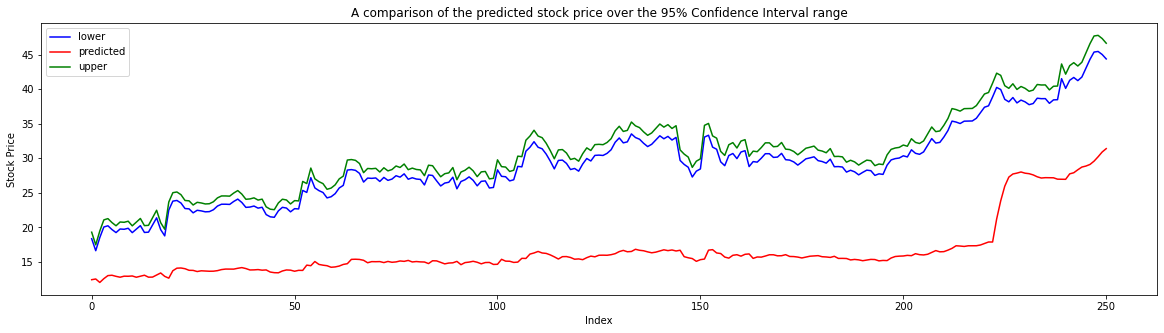

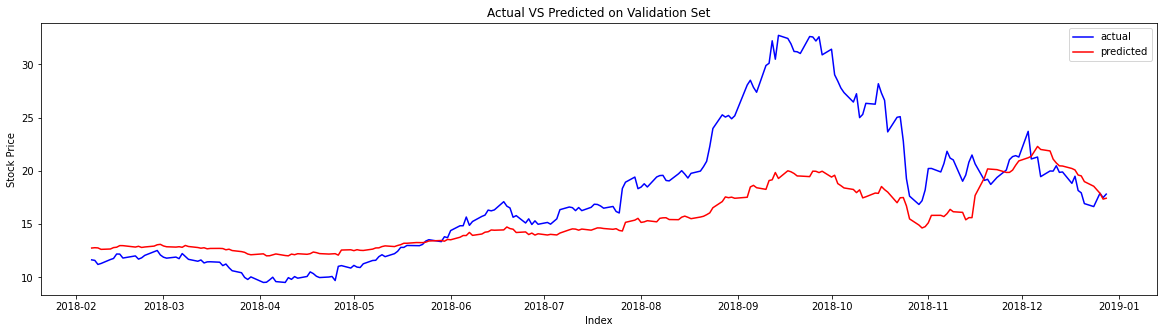

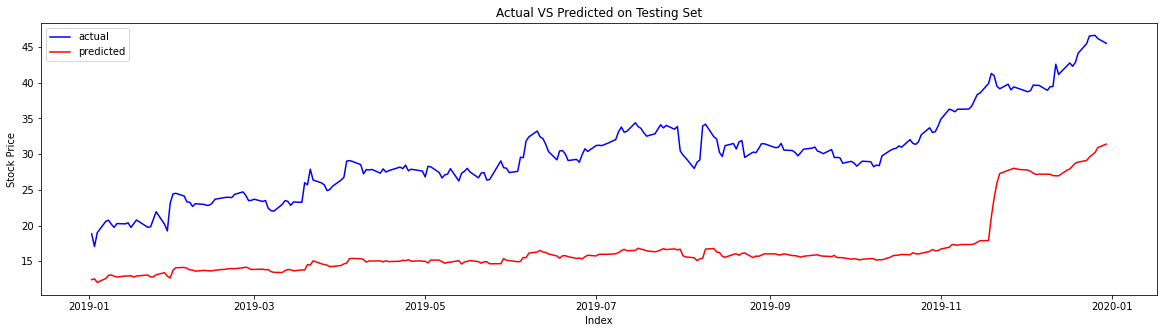

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 21
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa2491cd978> at a learning rate of 0.1
Dropout? No
Epochs = 100
Epoch 1/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0114 - mae: 0.1088
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0034 - mae: 0.0573
Epoch 3/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0014 - mae: 0.0312
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 9.8160e-04 - mae: 0.0230
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 8.9177e-04 - mae: 0.0227
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: 8.5553e-04 - mae: 0.0226
Epoch 7/100
70/70 [==============================] - 0s 5ms/step - loss: 8.2806e-04 - mae: 0.0223
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 8.0403e-04 - mae: 0.02

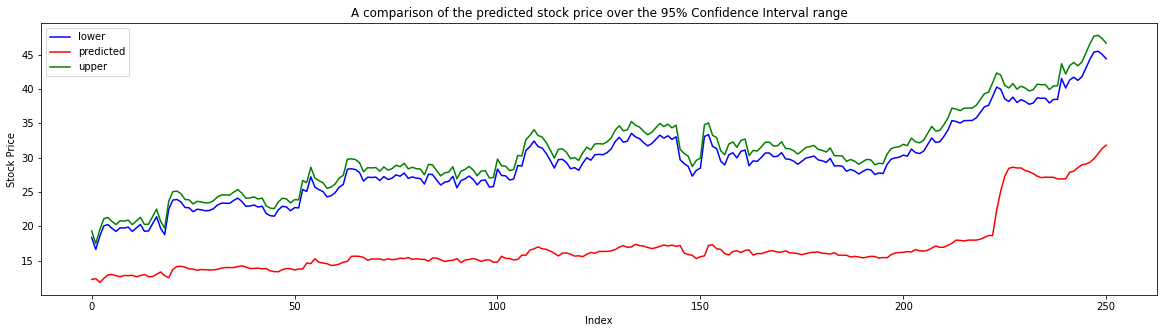

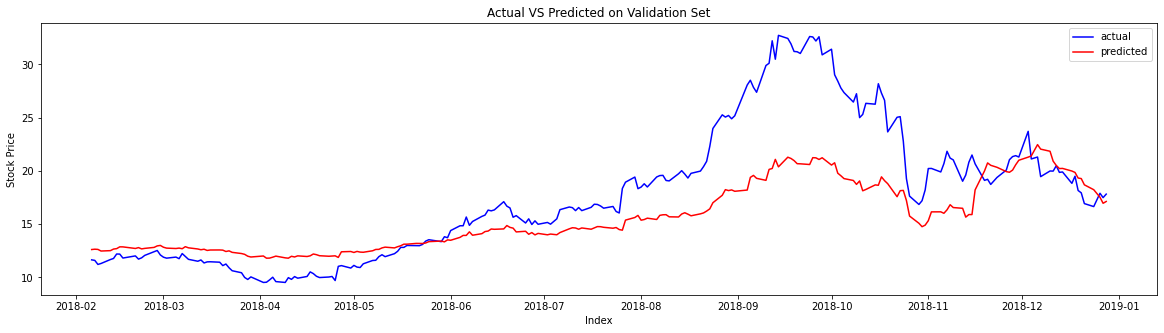

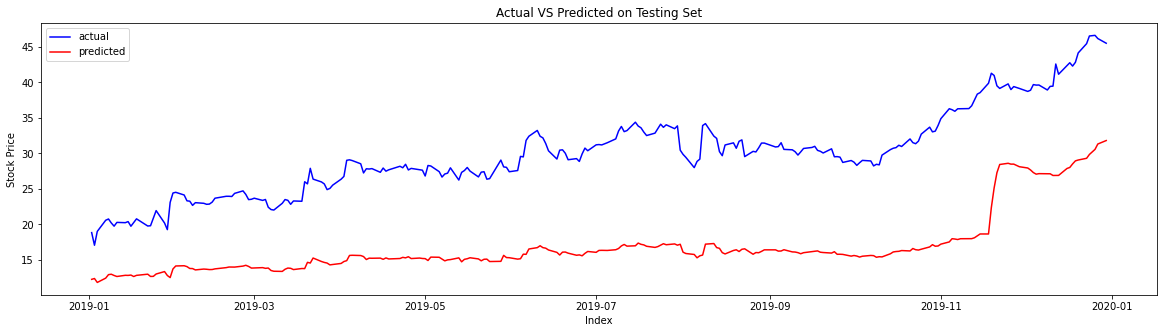

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 24
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa2f35ceb70> at a learning rate of 0.1
Dropout? No
Epochs = 100
Epoch 1/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0145 - mae: 0.1242
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0057 - mae: 0.0745
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0025 - mae: 0.0437
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0017 - mae: 0.0318
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0303
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0301
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0014 - mae: 0.0298
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0014 - mae: 0.0292
Epoch 9/100
70/70

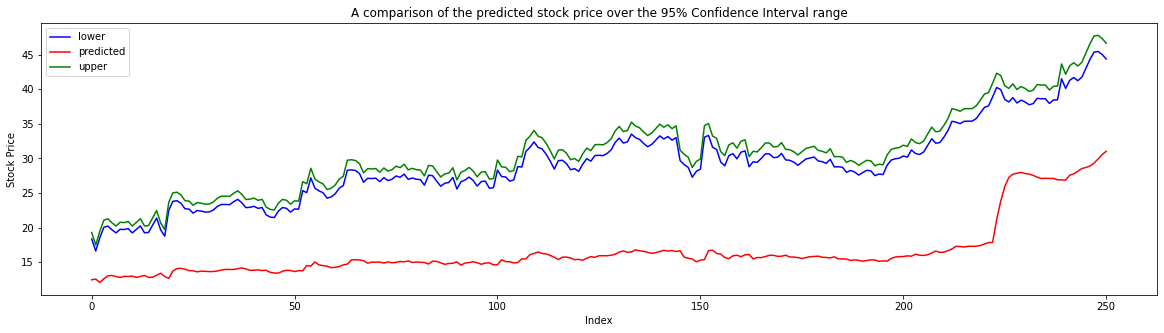

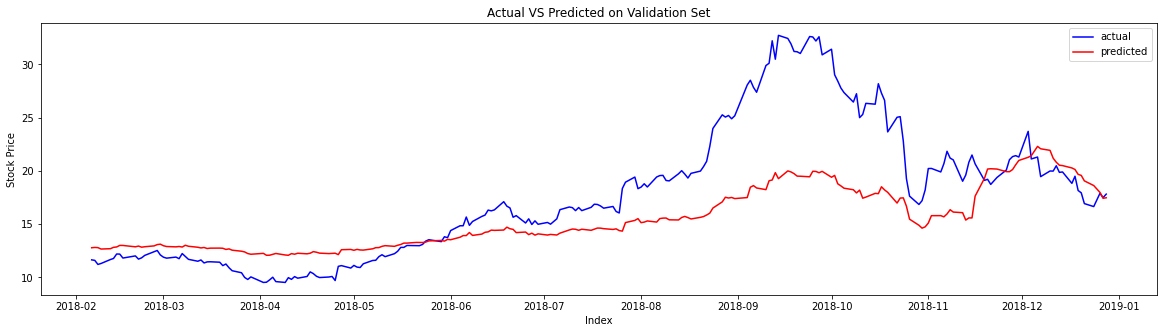

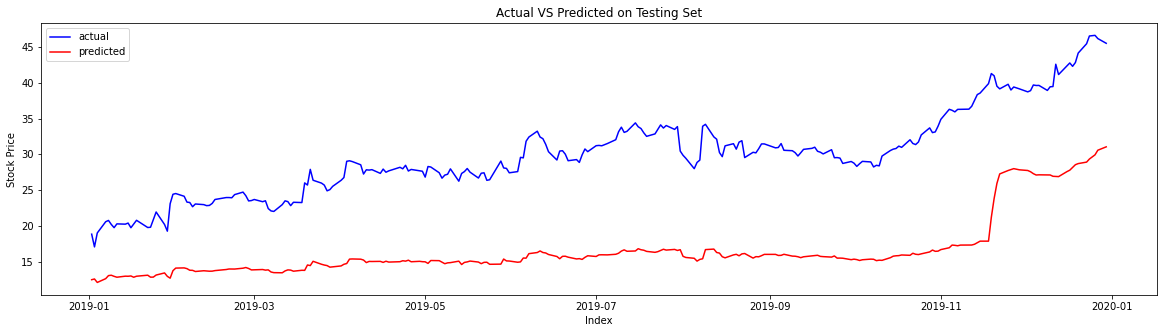

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 27
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa2220935c0> at a learning rate of 0.1
Dropout? No
Epochs = 100
Epoch 1/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0161 - mae: 0.1318
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0073 - mae: 0.0885
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0035 - mae: 0.0577
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0018 - mae: 0.0360
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0013 - mae: 0.0268
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0011 - mae: 0.0258
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0011 - mae: 0.0258
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0010 - mae: 0.0256
Epoch 9/100
70/70

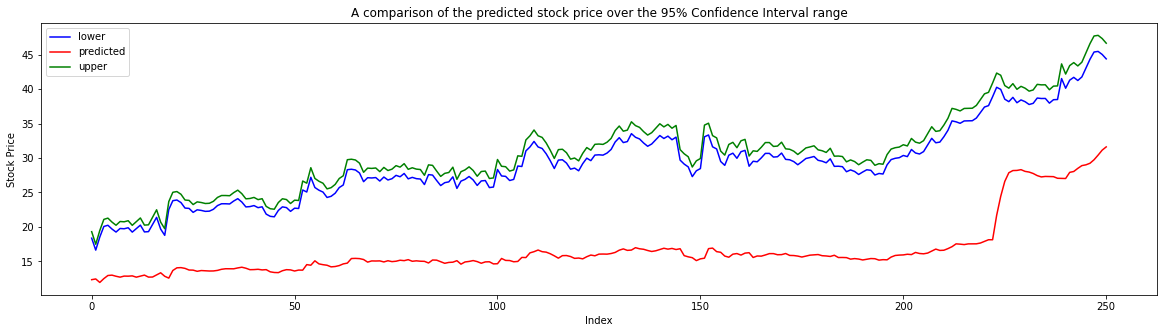

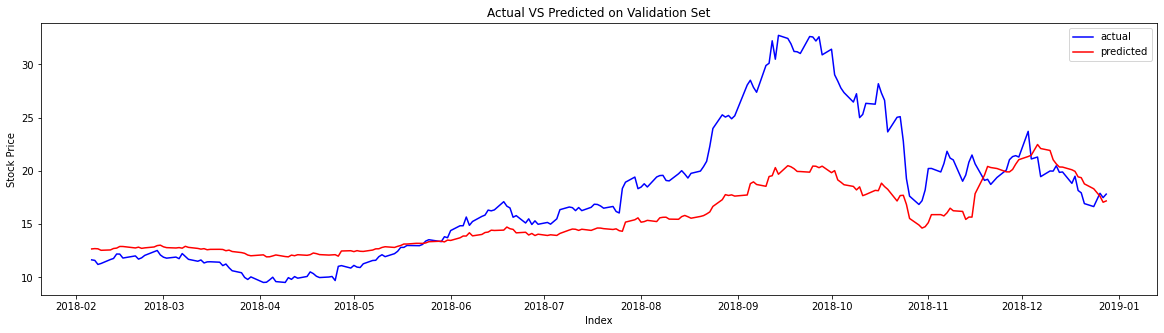

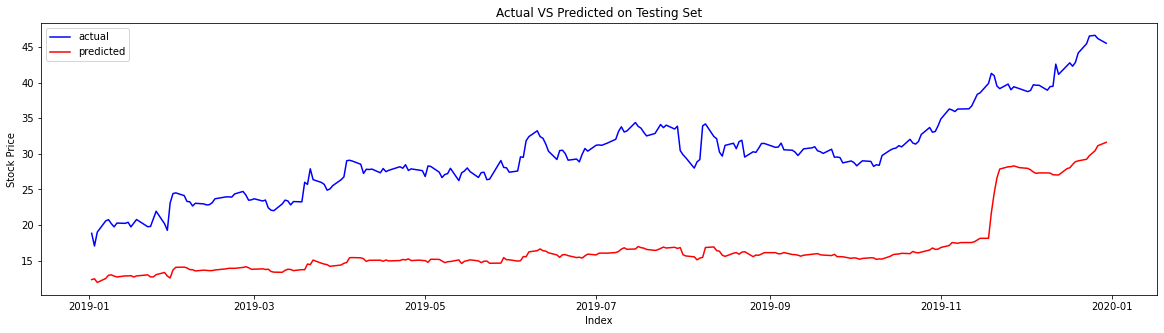

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 15
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa222134f60> at a learning rate of 0.1
Dropout? No
Epochs = 100
Epoch 1/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0097 - mae: 0.1004
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0038 - mae: 0.0595
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0018 - mae: 0.0353
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0013 - mae: 0.0267
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0012 - mae: 0.0260
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0011 - mae: 0.0261
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0011 - mae: 0.0259
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0010 - mae: 0.0256
Epoch 9/100
70/70

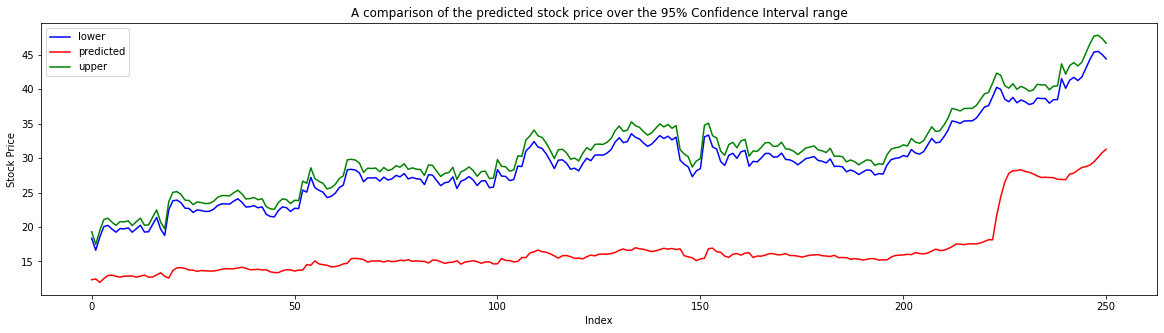

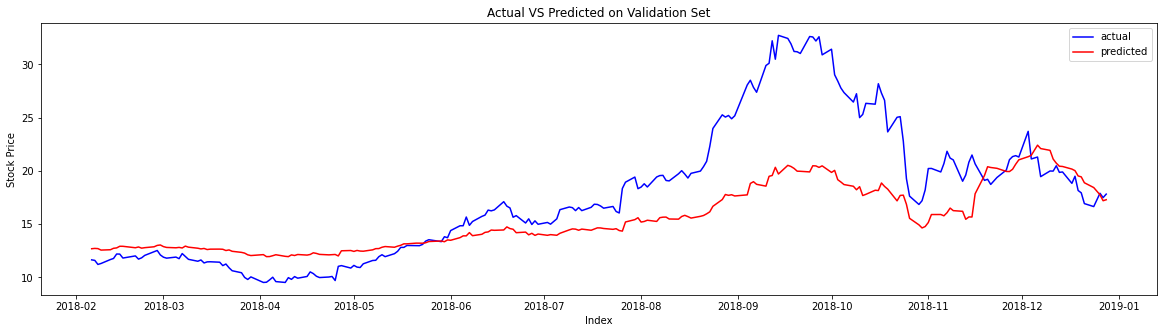

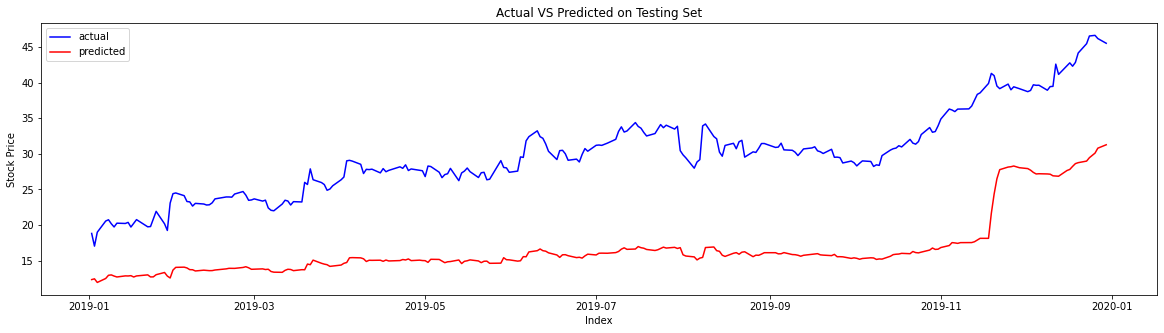

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 20
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa22532bb38> at a learning rate of 0.1
Dropout? No
Epochs = 100
Epoch 1/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0148 - mae: 0.1235
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0070 - mae: 0.0848
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0034 - mae: 0.0561
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0361
Epoch 5/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0014 - mae: 0.0268
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0012 - mae: 0.0251
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0011 - mae: 0.0252
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0011 - mae: 0.0253
Epoch 9/100
70/70

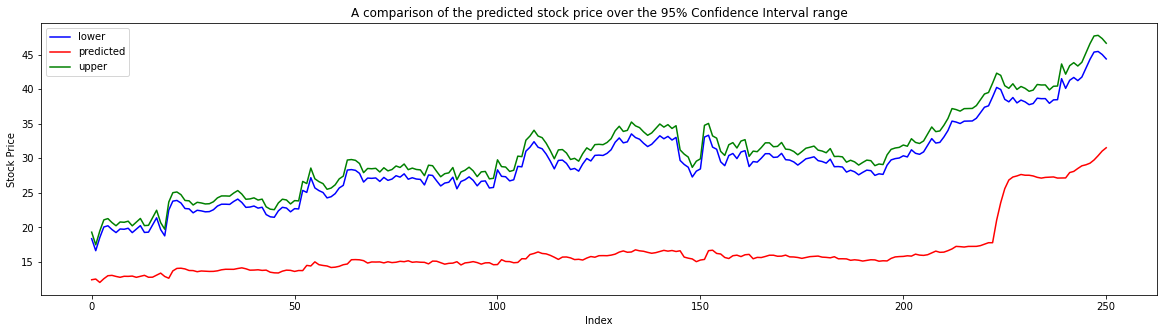

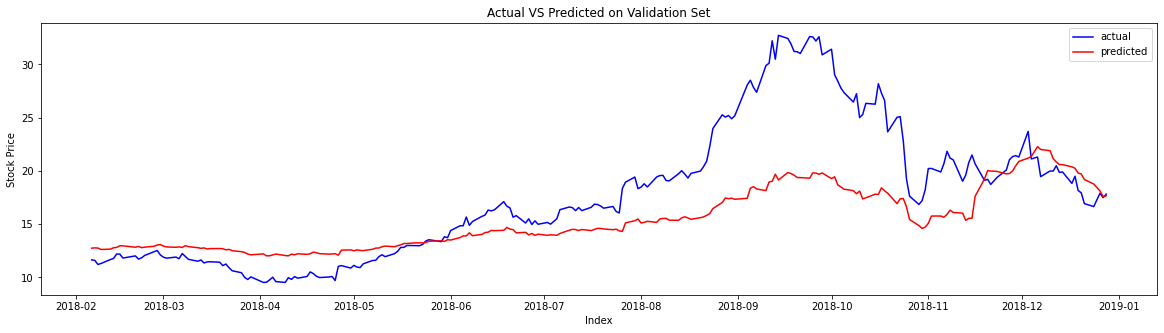

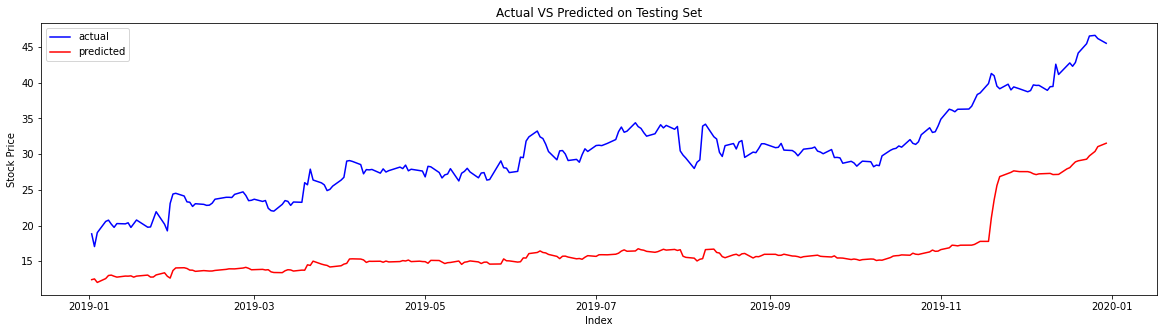

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 4
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa2253f87b8> at a learning rate of 0.1
Dropout? No
Epochs = 100
Epoch 1/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0038 - mae: 0.0531
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0021 - mae: 0.0348
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0270
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0013 - mae: 0.0260
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0012 - mae: 0.0262
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0011 - mae: 0.0260
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0011 - mae: 0.0259
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0010 - mae: 0.0257
Epoch 9/100
70/70 

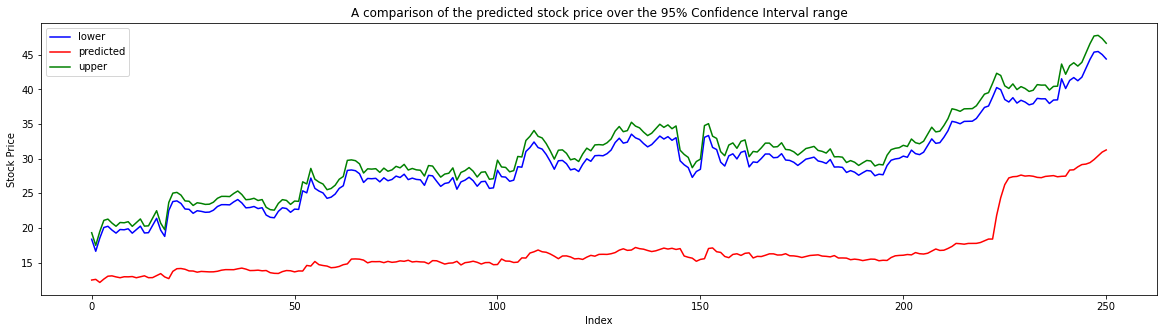

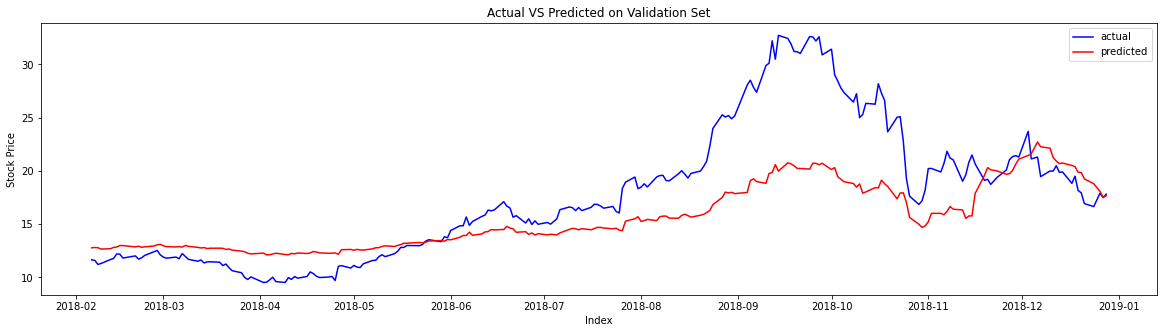

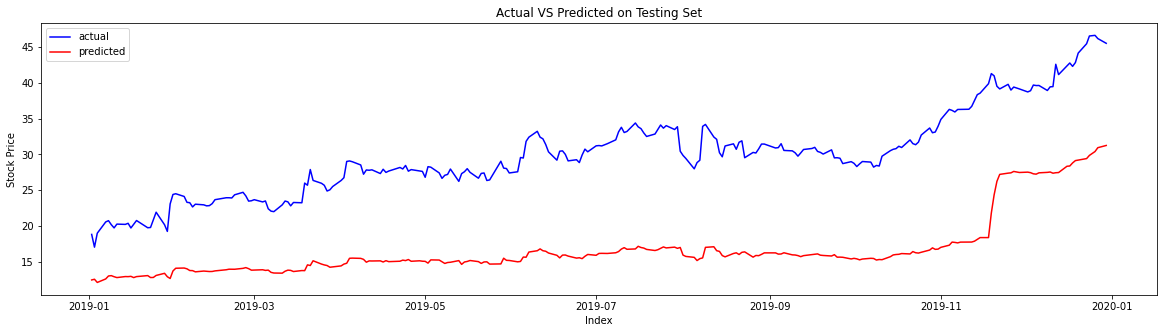

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 30
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa2532162b0> at a learning rate of 0.1
Dropout? No
Epochs = 100
Epoch 1/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0458 - mae: 0.1928
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0018 - mae: 0.0361
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 2.1485e-04 - mae: 0.0109
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 1.2754e-04 - mae: 0.0083
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 9.7956e-05 - mae: 0.0076
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 8.2117e-05 - mae: 0.0069
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 7.4819e-05 - mae: 0.0067
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 7.0729e-05 - mae: 0.0065
Epoc

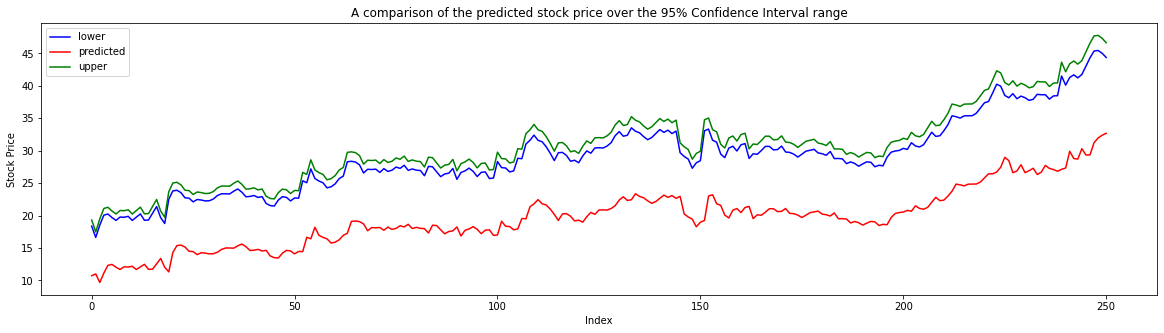

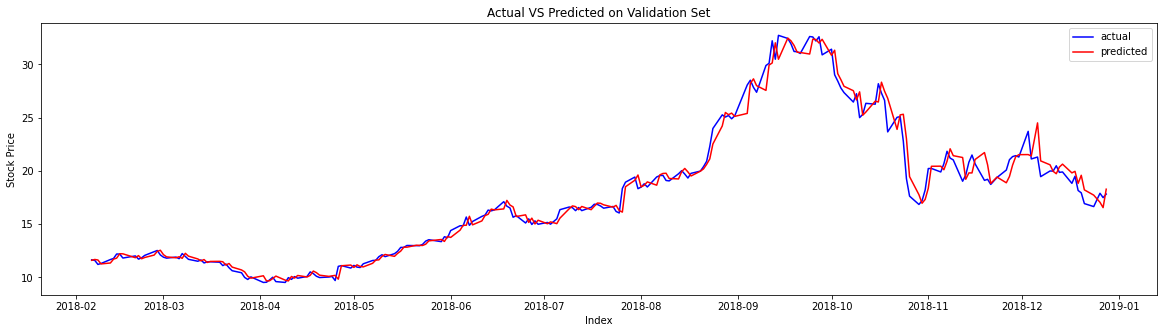

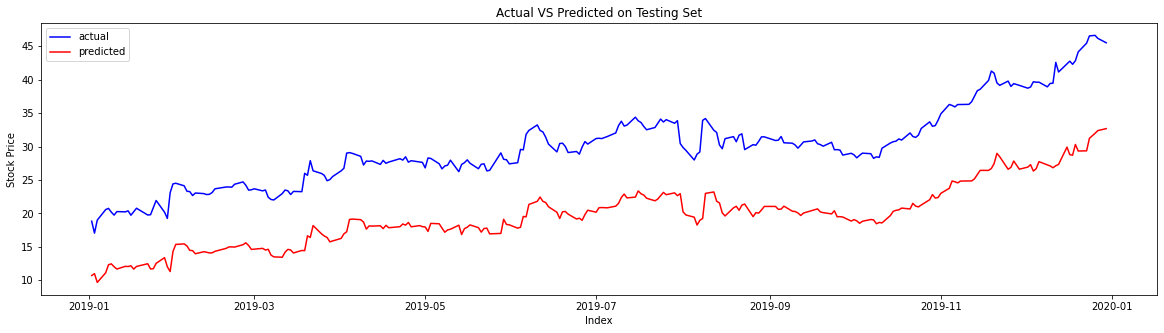

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 21
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa2228b1ba8> at a learning rate of 0.1
Dropout? No
Epochs = 100
Epoch 1/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0157 - mae: 0.0793
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 6.9701e-04 - mae: 0.0166
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 2.1428e-04 - mae: 0.0113
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 1.1008e-04 - mae: 0.0088
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 8.5157e-05 - mae: 0.0078
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 7.7547e-05 - mae: 0.0073
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 7.4055e-05 - mae: 0.0070
Epoch 8/100
70/70 [==============================] - 1s 9ms/step - loss: 7.2957e-05 - mae: 0.0071


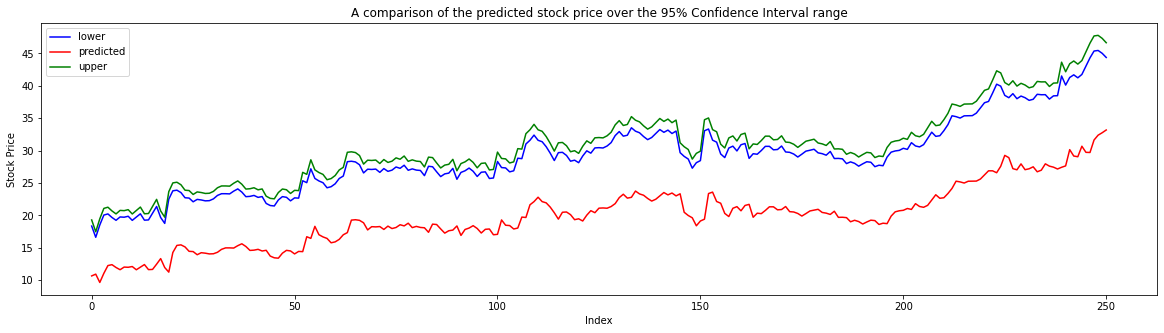

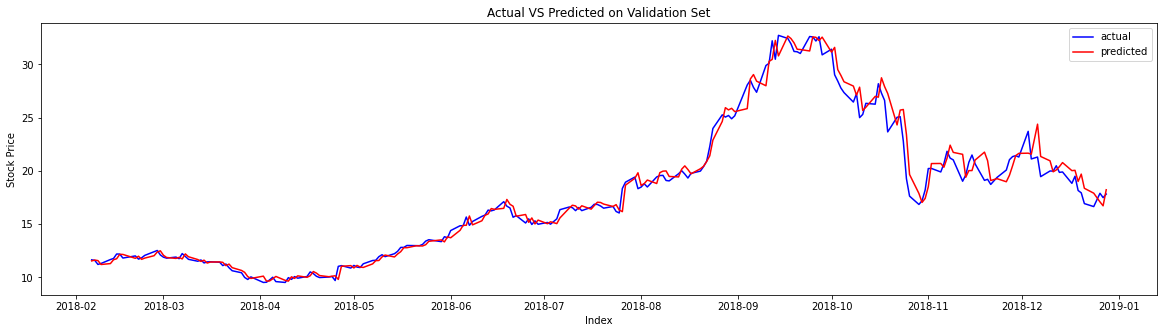

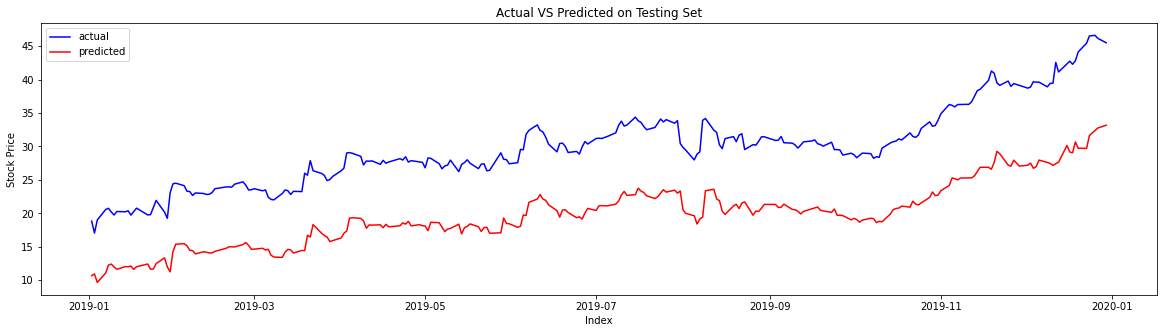

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 24
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa2255e5588> at a learning rate of 0.1
Dropout? No
Epochs = 100
Epoch 1/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0044 - mae: 0.0465
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 9.9532e-05 - mae: 0.0081
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 7.2827e-05 - mae: 0.0070
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 6.6930e-05 - mae: 0.0066
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 6.4712e-05 - mae: 0.0063
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 6.6247e-05 - mae: 0.0066
Epoch 7/100
70/70 [==============================] - 0s 5ms/step - loss: 6.4936e-05 - mae: 0.0064
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 7.3386e-05 - mae: 0.0073


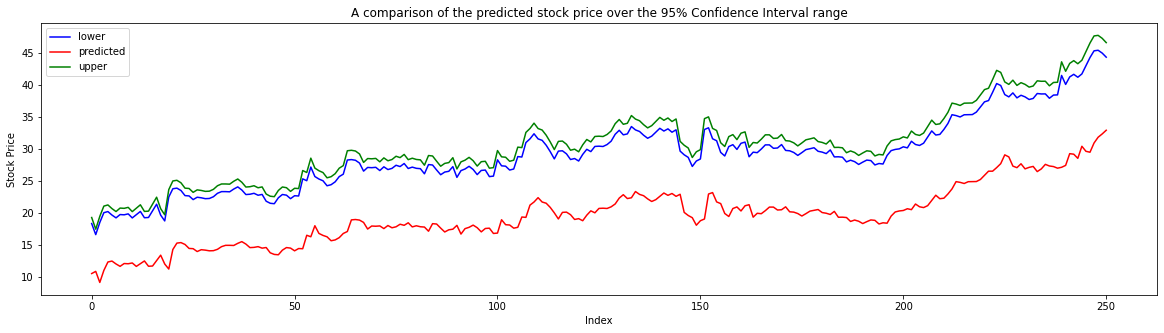

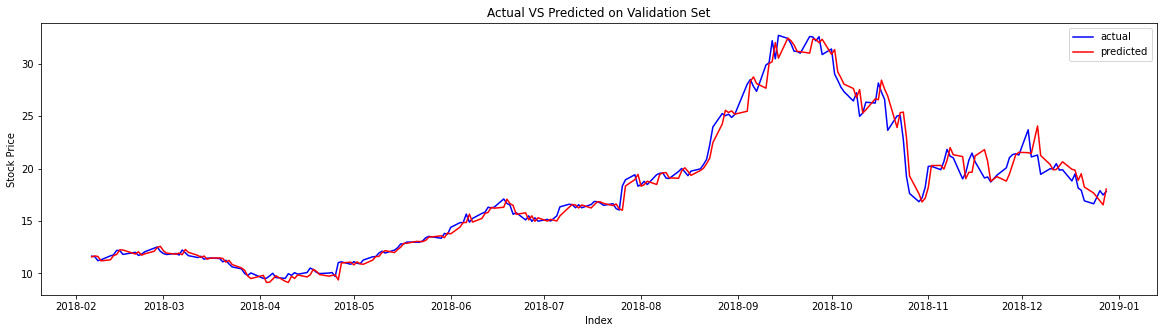

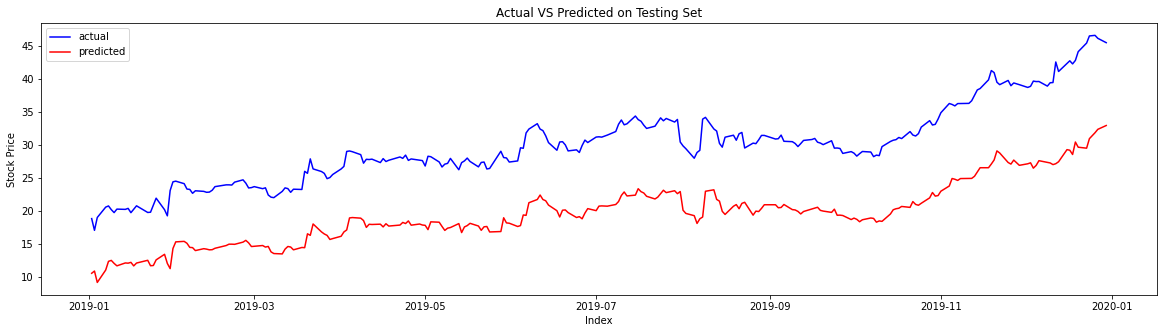

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 27
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa226923b00> at a learning rate of 0.1
Dropout? No
Epochs = 100
Epoch 1/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0173 - mae: 0.1232
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 2.8364e-04 - mae: 0.0141
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 1.1561e-04 - mae: 0.0090
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 8.4238e-05 - mae: 0.0078
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 7.4627e-05 - mae: 0.0070
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 7.2500e-05 - mae: 0.0070
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 7.1556e-05 - mae: 0.0070
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 6.9170e-05 - mae: 0.0068


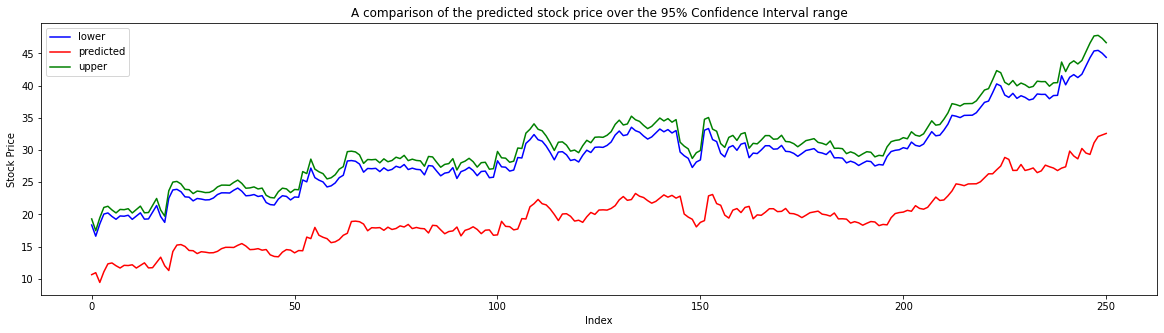

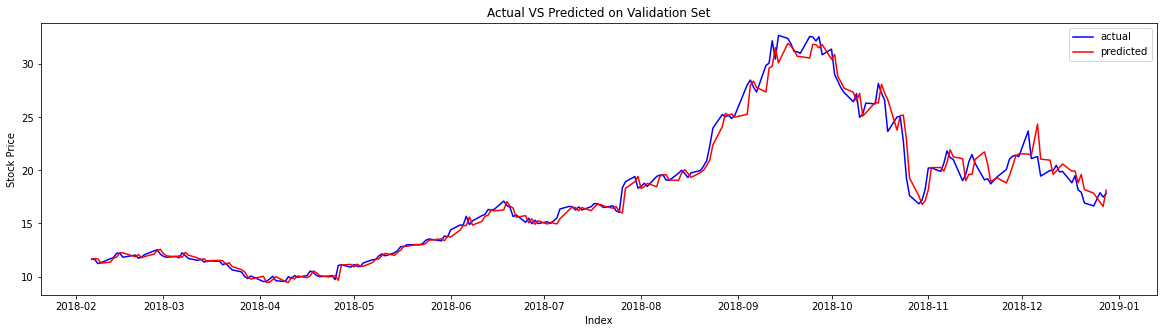

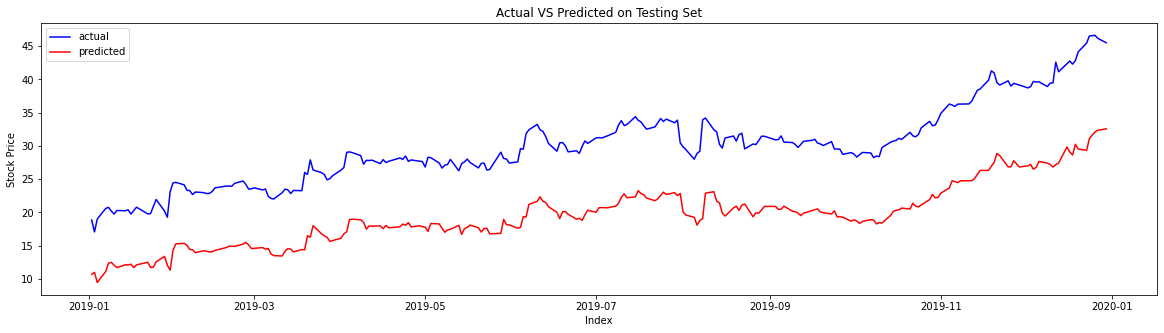

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 15
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa2226ae7f0> at a learning rate of 0.1
Dropout? No
Epochs = 100
Epoch 1/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0052 - mae: 0.0506
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 1.1684e-04 - mae: 0.0086
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 8.0774e-05 - mae: 0.0075
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 7.3534e-05 - mae: 0.0071
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 7.4725e-05 - mae: 0.0074
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 7.0791e-05 - mae: 0.0069
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 6.8015e-05 - mae: 0.0067
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 6.8618e-05 - mae: 0.0068


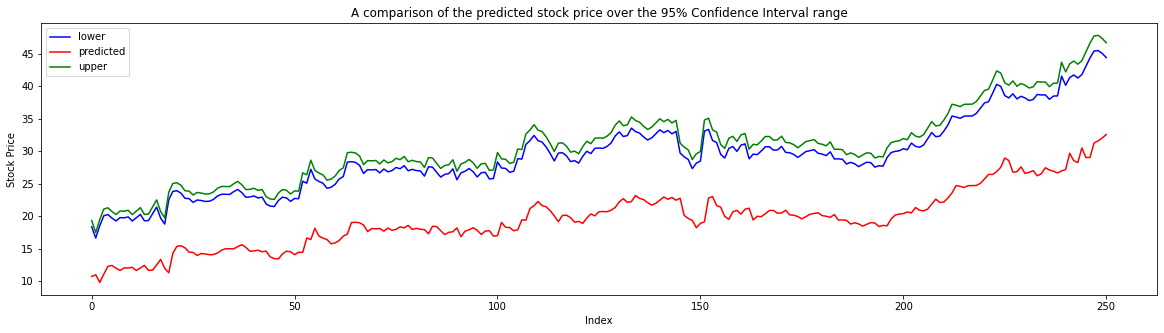

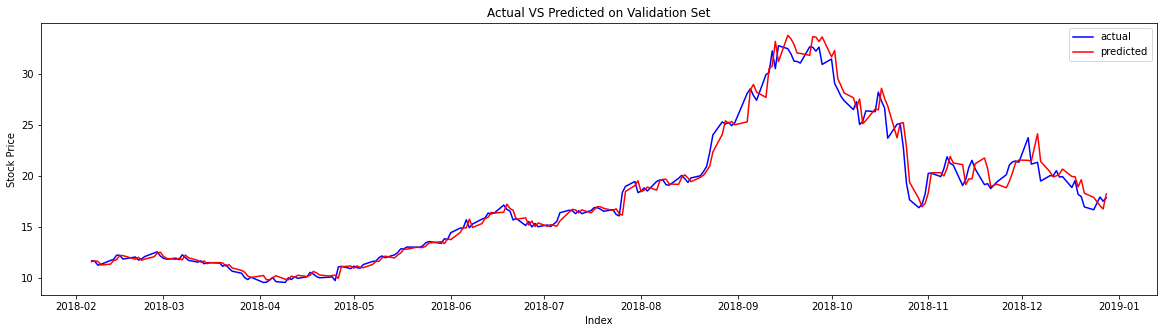

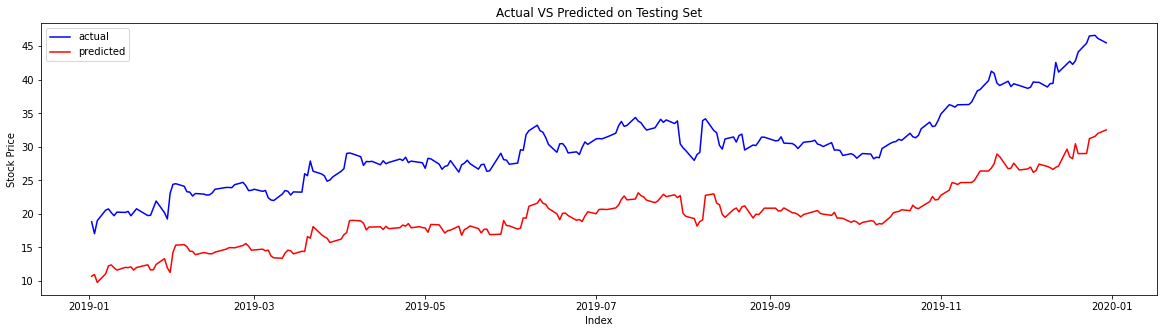

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 20
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa24921a470> at a learning rate of 0.1
Dropout? No
Epochs = 100
Epoch 1/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0135 - mae: 0.0785
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 3.5264e-04 - mae: 0.0127
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 1.5406e-04 - mae: 0.0091
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 1.0757e-04 - mae: 0.0082
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 8.7176e-05 - mae: 0.0075
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 8.0056e-05 - mae: 0.0074
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 7.4357e-05 - mae: 0.0071
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 7.1556e-05 - mae: 0.0071


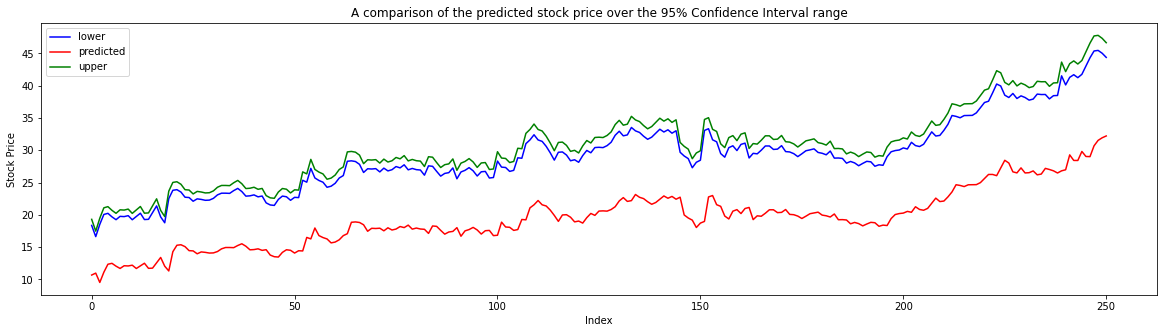

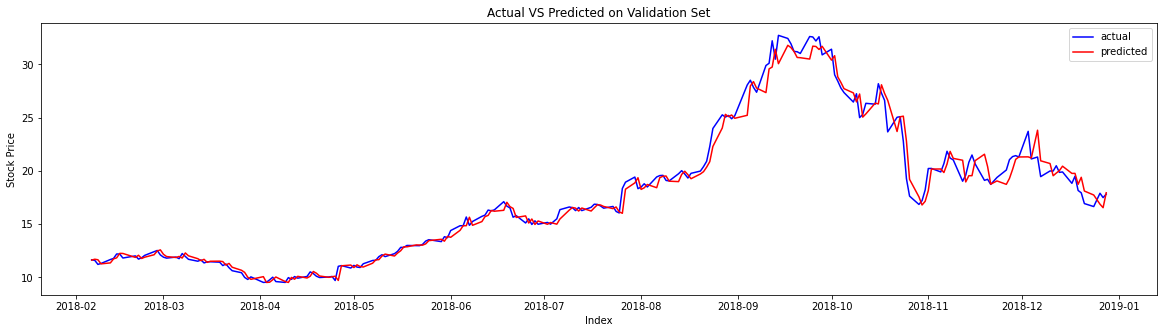

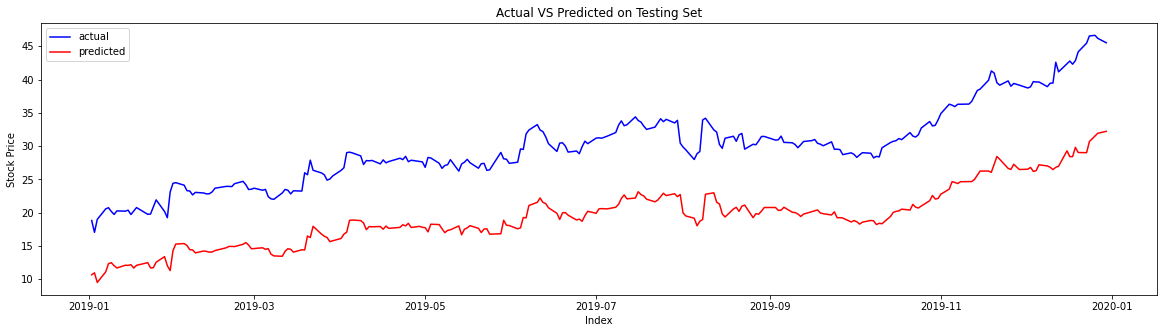

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 4
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa22530ea20> at a learning rate of 0.1
Dropout? No
Epochs = 100
Epoch 1/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0196 - mae: 0.1339
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 7.1141e-04 - mae: 0.0206
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 1.9521e-04 - mae: 0.0109
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 1.5325e-04 - mae: 0.0098
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 1.2469e-04 - mae: 0.0088
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 1.0501e-04 - mae: 0.0081
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 9.1167e-05 - mae: 0.0076
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 8.2820e-05 - mae: 0.0073
E

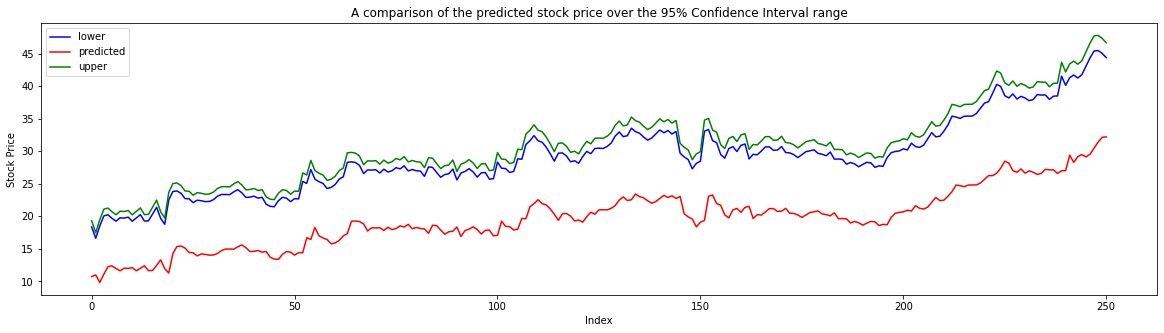

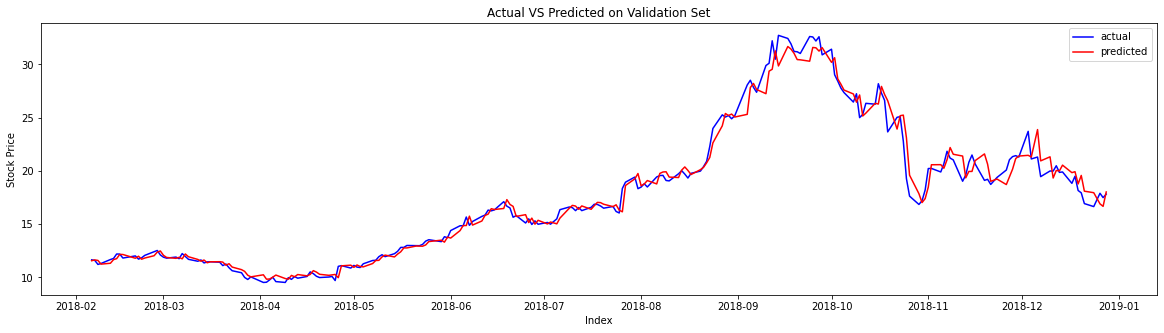

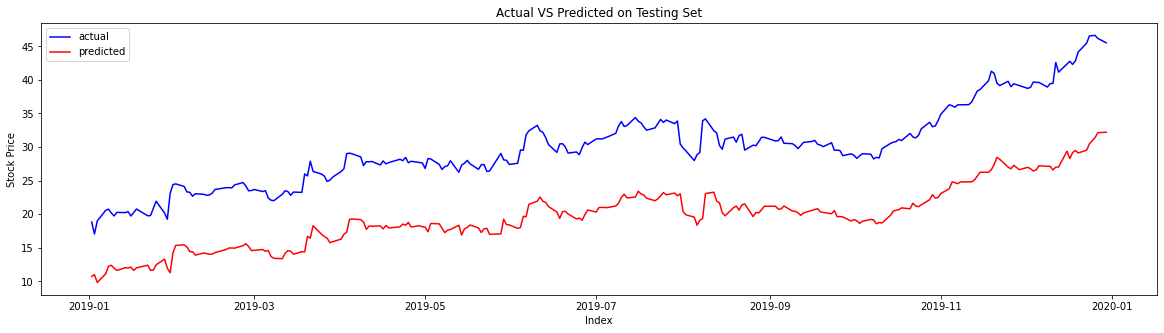

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 2
Number of hidden nodes = 30
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa253fc9e80> at a learning rate of 0.1
Dropout? No
Epochs = 200
Epoch 1/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0068 - mae: 0.0806
Epoch 2/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0490
Epoch 3/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0384
Epoch 4/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0379
Epoch 5/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0378
Epoch 6/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0372
Epoch 7/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0366
Epoch 8/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0360
Epoch 9/200
70/70

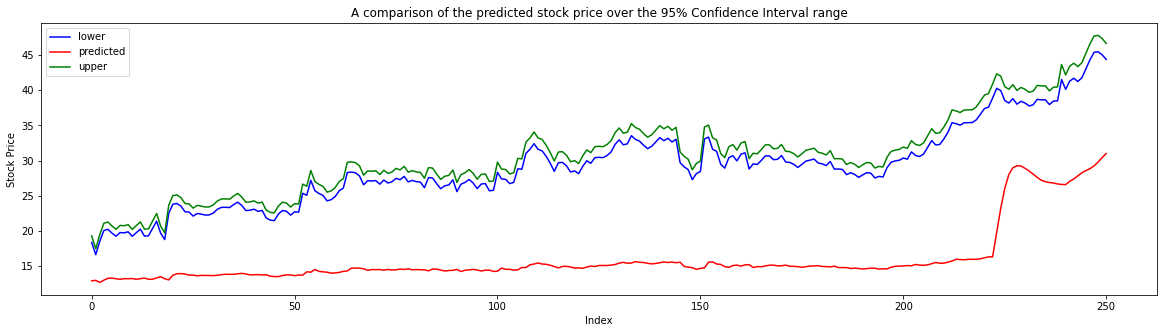

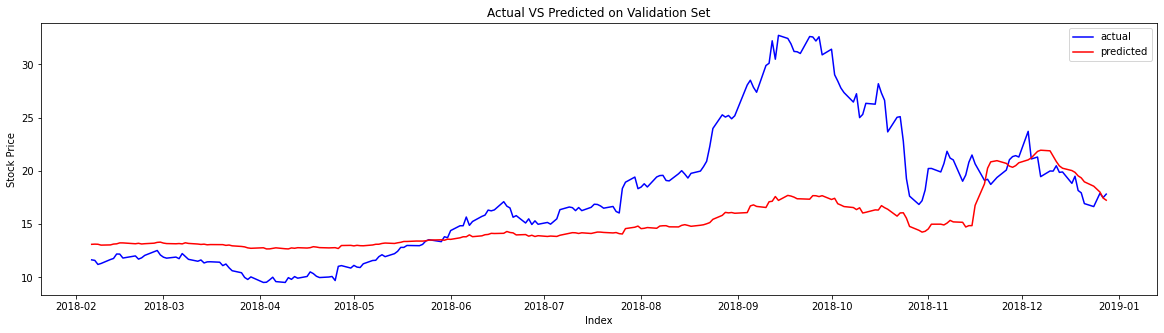

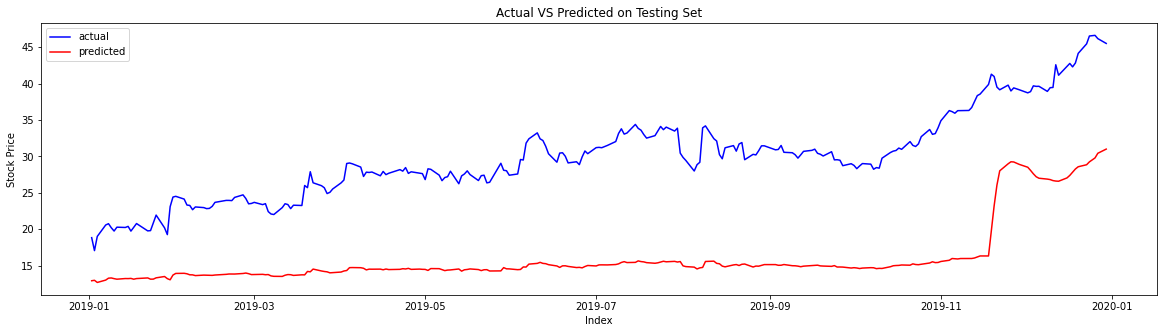

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 2
Number of hidden nodes = 21
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa2225a3f28> at a learning rate of 0.1
Dropout? No
Epochs = 200
Epoch 1/200
70/70 [==============================] - 0s 7ms/step - loss: 0.0122 - mae: 0.1126
Epoch 2/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0067 - mae: 0.0830
Epoch 3/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0036 - mae: 0.0555
Epoch 4/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0385
Epoch 5/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0343
Epoch 6/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0344
Epoch 7/200
70/70 [==============================] - 0s 7ms/step - loss: 0.0018 - mae: 0.0345
Epoch 8/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0342
Epoch 9/200
70/70

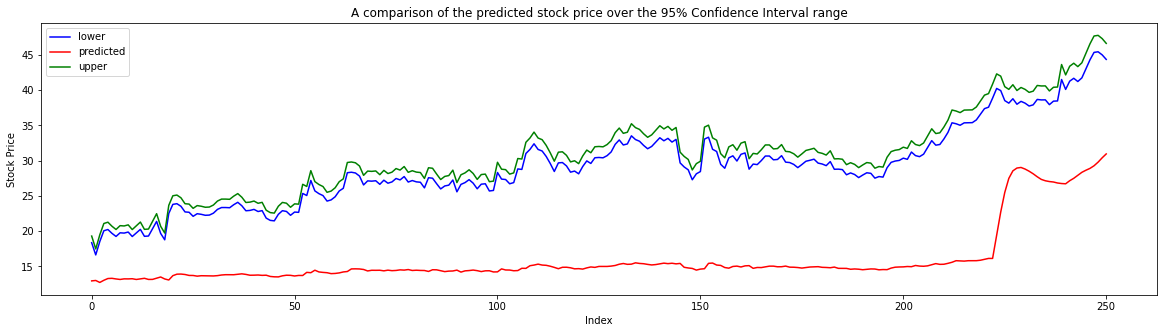

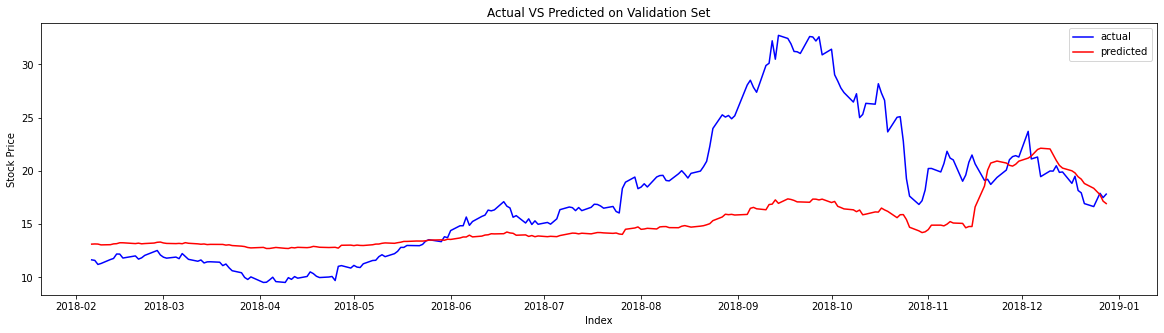

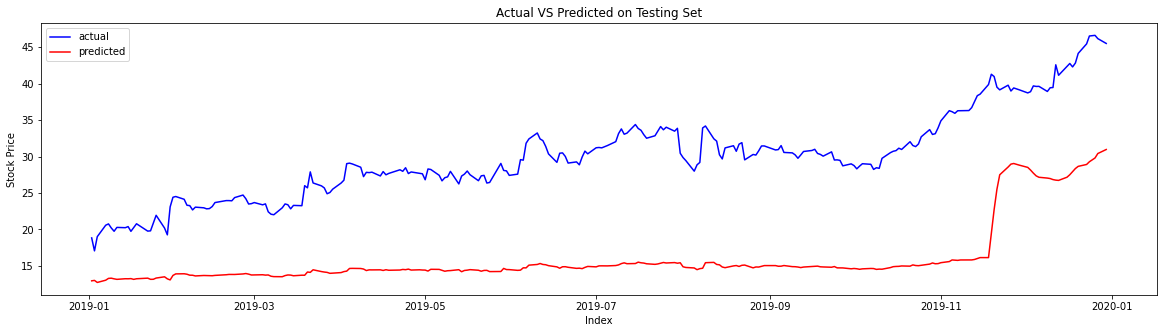

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 2
Number of hidden nodes = 24
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa2223527f0> at a learning rate of 0.1
Dropout? No
Epochs = 200
Epoch 1/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0092 - mae: 0.0956
Epoch 2/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0546
Epoch 3/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0431
Epoch 4/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0430
Epoch 5/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0425
Epoch 6/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0412
Epoch 7/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0406
Epoch 8/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0396
Epoch 9/200
70/70

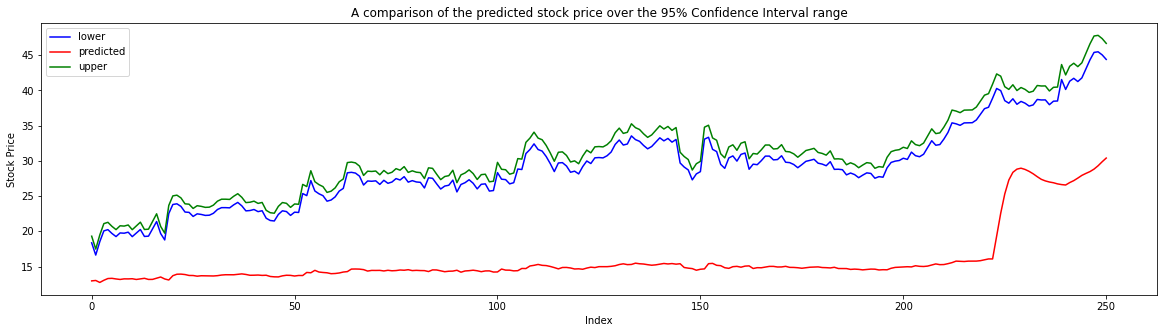

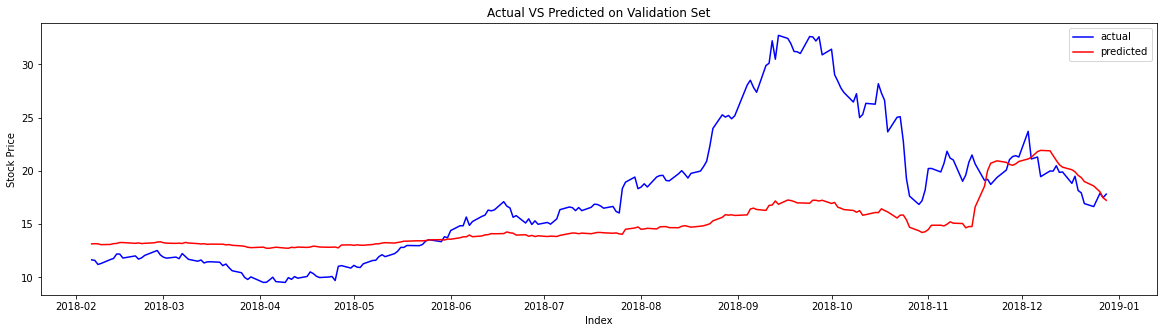

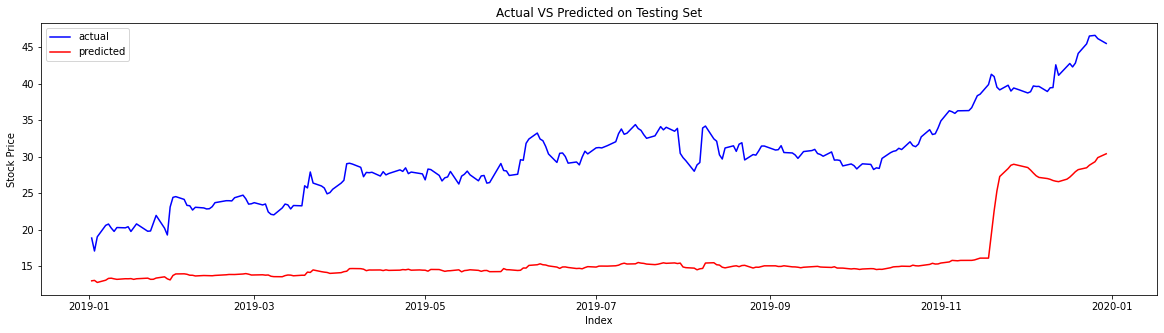

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 2
Number of hidden nodes = 27
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa223157668> at a learning rate of 0.1
Dropout? No
Epochs = 200
Epoch 1/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0091 - mae: 0.0969
Epoch 2/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0053 - mae: 0.0718
Epoch 3/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0489
Epoch 4/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0366
Epoch 5/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0349
Epoch 6/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0352
Epoch 7/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0351
Epoch 8/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0349
Epoch 9/200
70/70

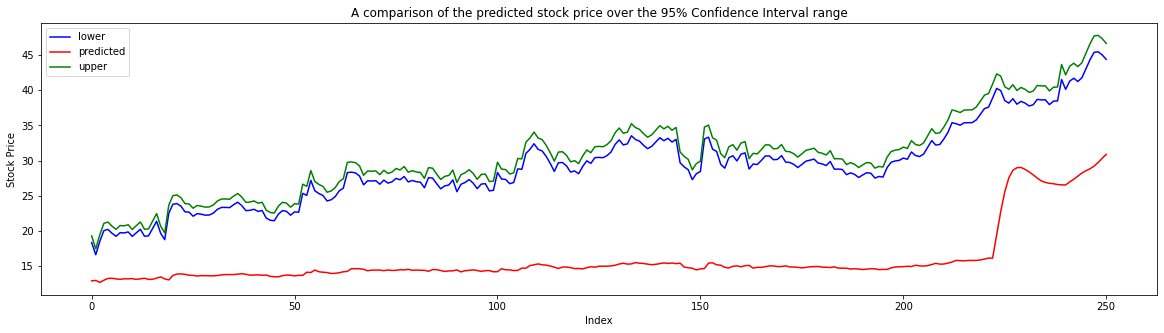

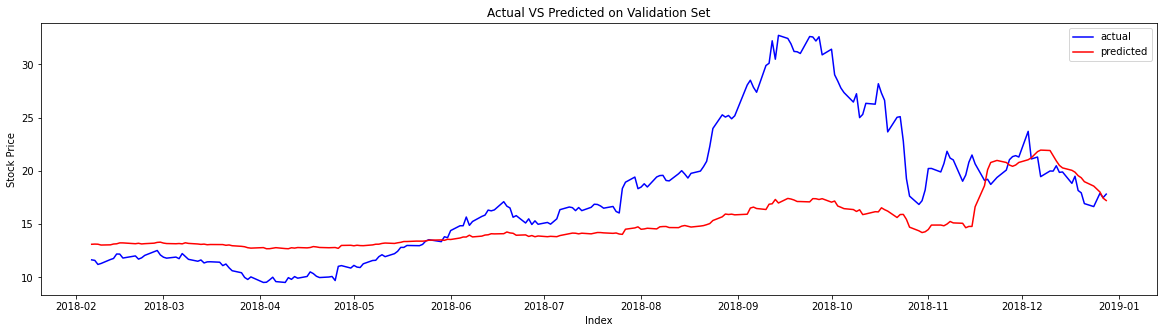

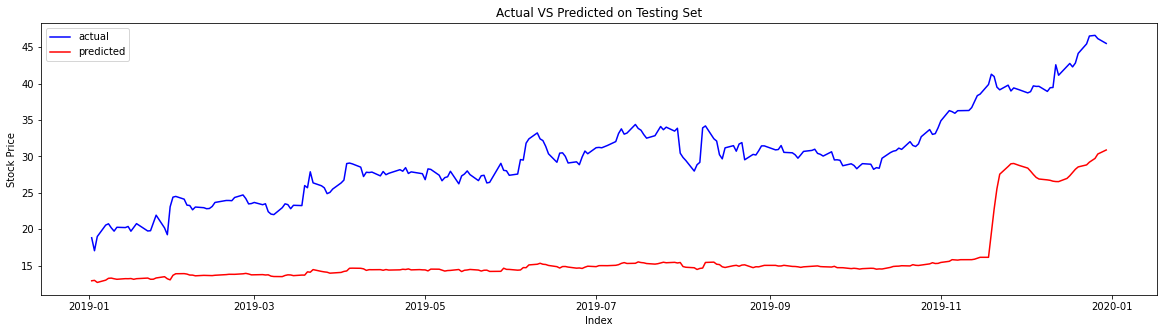

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 2
Number of hidden nodes = 15
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa2224802b0> at a learning rate of 0.1
Dropout? No
Epochs = 200
Epoch 1/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0077 - mae: 0.0852
Epoch 2/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0487
Epoch 3/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0437
Epoch 4/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0435
Epoch 5/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0428
Epoch 6/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0417
Epoch 7/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0409
Epoch 8/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0401
Epoch 9/200
70/70

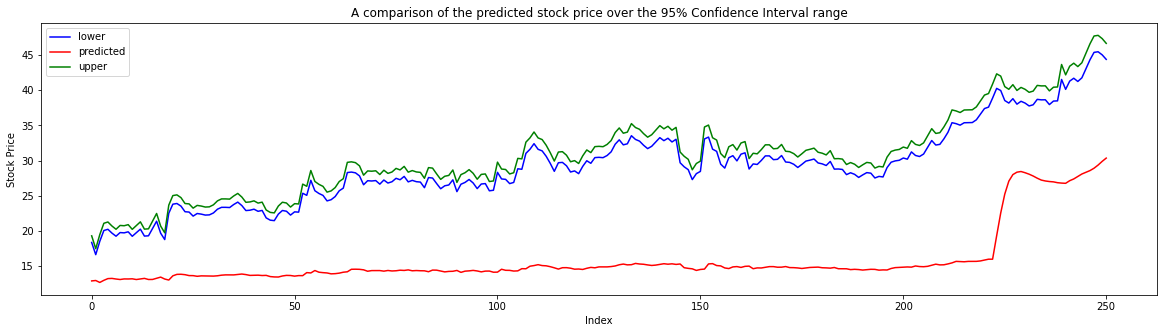

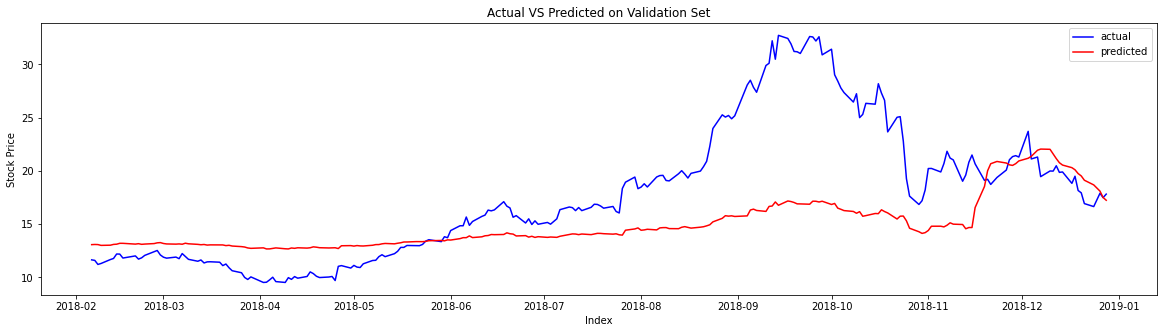

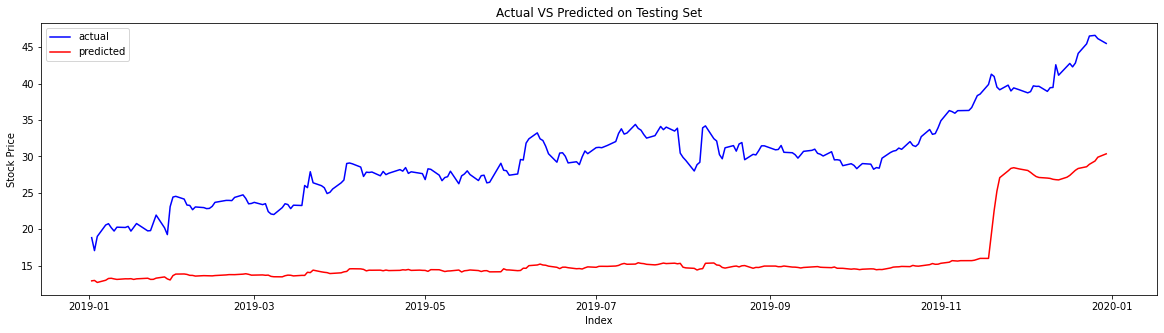

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 2
Number of hidden nodes = 20
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa22566d550> at a learning rate of 0.1
Dropout? No
Epochs = 200
Epoch 1/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0135 - mae: 0.1187
Epoch 2/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0059 - mae: 0.0736
Epoch 3/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0475
Epoch 4/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0416
Epoch 5/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0416
Epoch 6/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0412
Epoch 7/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0404
Epoch 8/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0397
Epoch 9/200
70/70

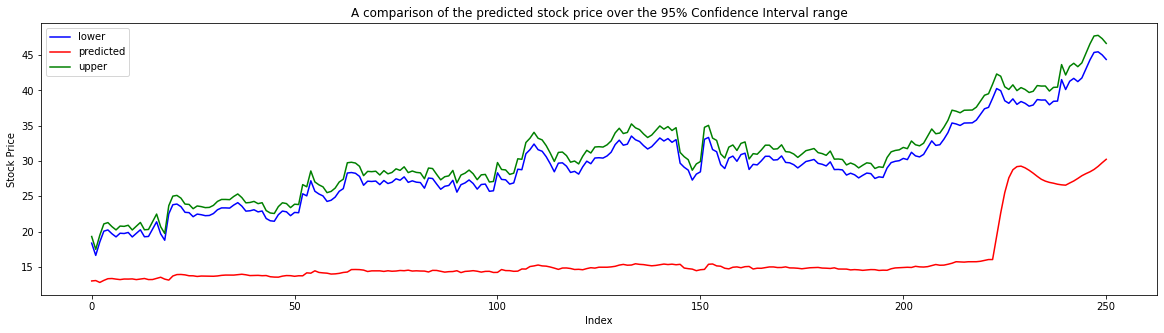

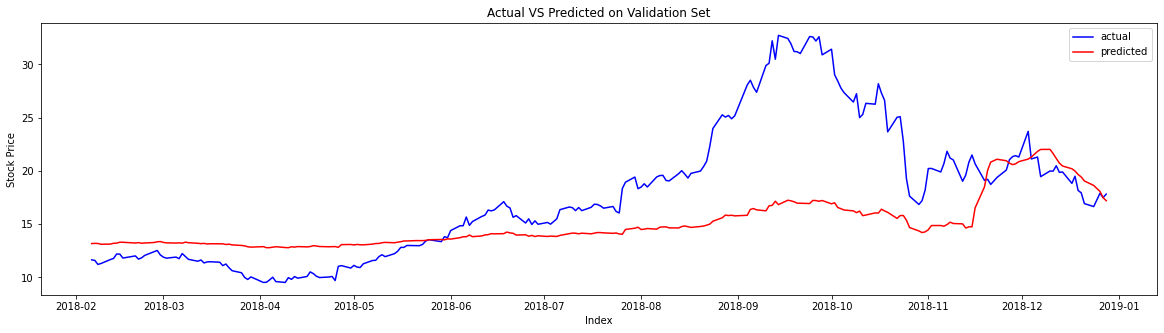

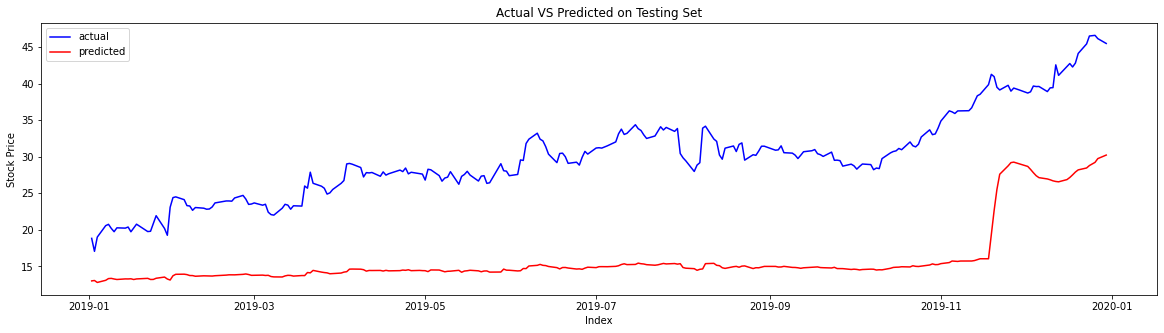

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 2
Number of hidden nodes = 4
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa22290add8> at a learning rate of 0.1
Dropout? No
Epochs = 200
Epoch 1/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0101 - mae: 0.1026
Epoch 2/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0071 - mae: 0.0862
Epoch 3/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0052 - mae: 0.0712
Epoch 4/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0038 - mae: 0.0567
Epoch 5/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0464
Epoch 6/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0411
Epoch 7/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0387
Epoch 8/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0380
Epoch 9/200
70/70 

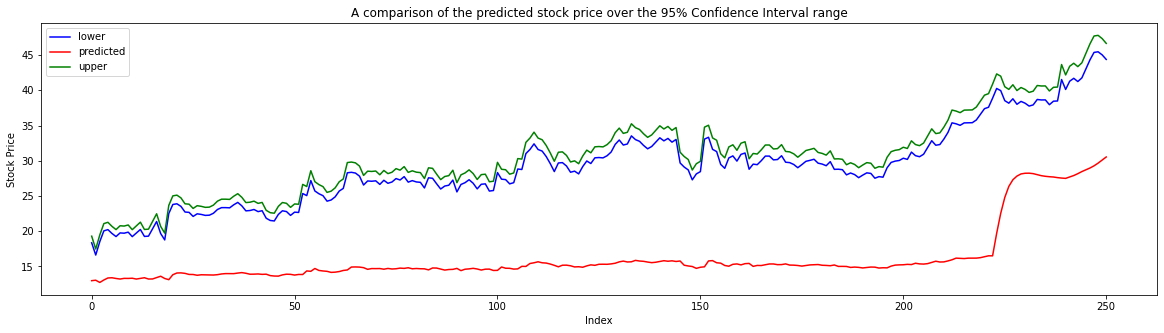

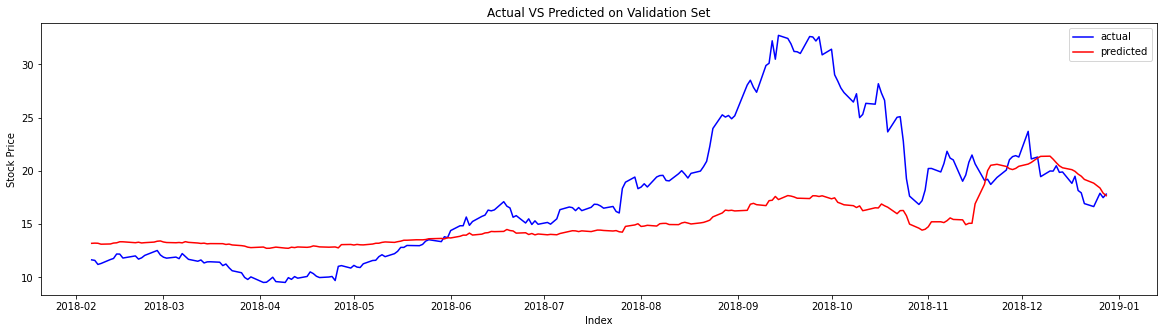

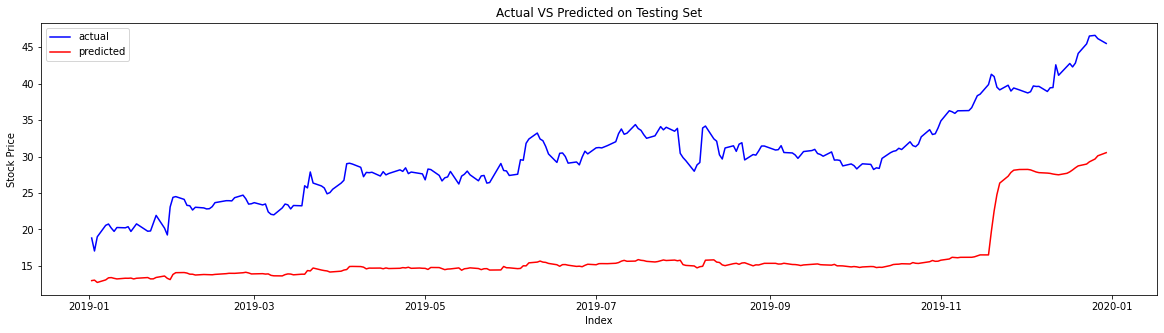

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 2
Number of hidden nodes = 30
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa2220d8390> at a learning rate of 0.1
Dropout? No
Epochs = 200
Epoch 1/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0246 - mae: 0.1458
Epoch 2/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0148 - mae: 0.1288
Epoch 3/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0208 - mae: 0.1399
Epoch 4/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0137 - mae: 0.1223
Epoch 5/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0144 - mae: 0.1261
Epoch 6/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0158 - mae: 0.1304
Epoch 7/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0153 - mae: 0.1314
Epoch 8/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0140 - mae: 0.1242
Epoch 9/200
70/70 [=========

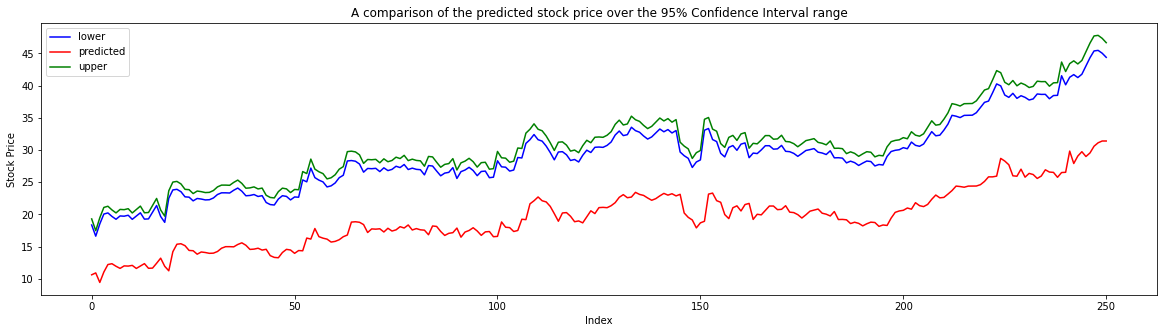

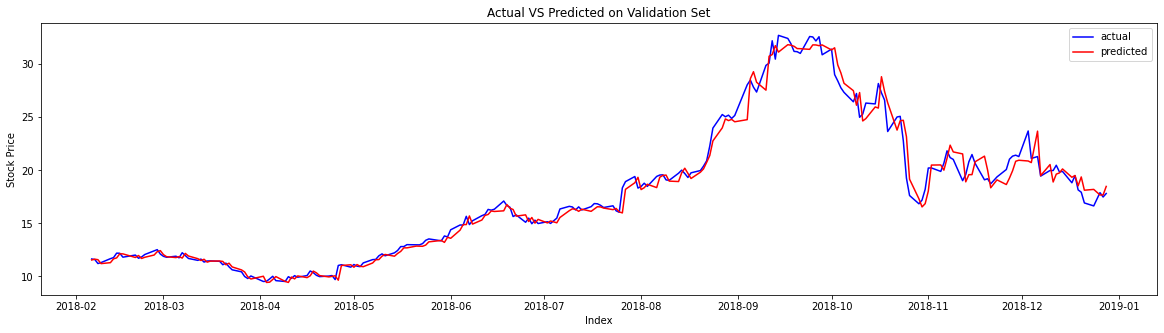

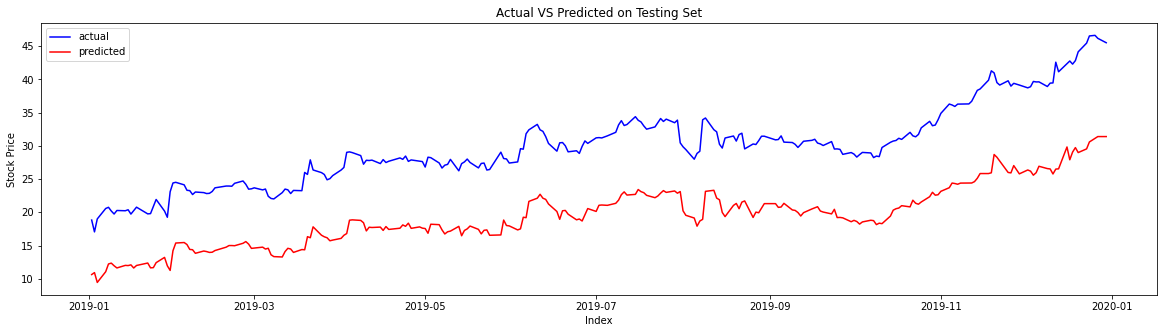

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 2
Number of hidden nodes = 21
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa252cdd9b0> at a learning rate of 0.1
Dropout? No
Epochs = 200
Epoch 1/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0067 - mae: 0.0667
Epoch 2/200
70/70 [==============================] - 0s 6ms/step - loss: 4.0075e-04 - mae: 0.0143
Epoch 3/200
70/70 [==============================] - 0s 6ms/step - loss: 1.8344e-04 - mae: 0.0101
Epoch 4/200
70/70 [==============================] - 0s 6ms/step - loss: 9.7618e-05 - mae: 0.0087
Epoch 5/200
70/70 [==============================] - 0s 6ms/step - loss: 9.2500e-05 - mae: 0.0088
Epoch 6/200
70/70 [==============================] - 0s 6ms/step - loss: 9.4282e-05 - mae: 0.0088
Epoch 7/200
70/70 [==============================] - 0s 6ms/step - loss: 7.0277e-05 - mae: 0.0070
Epoch 8/200
70/70 [==============================] - 0s 6ms/step - loss: 1.0368e-04 - mae: 0.0099


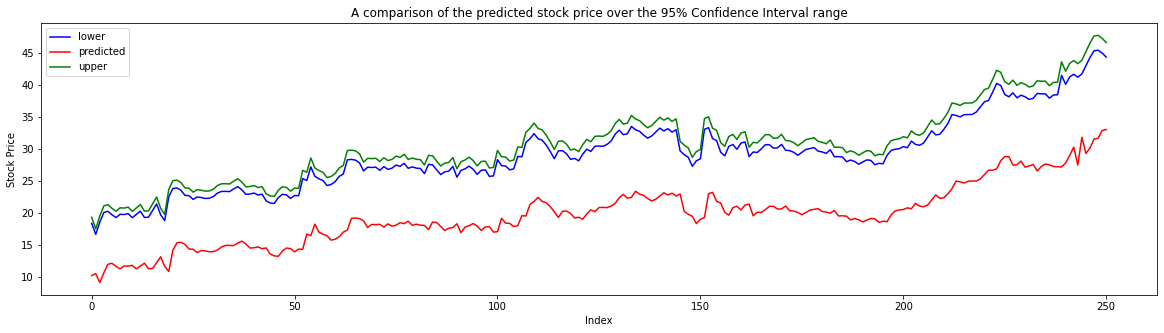

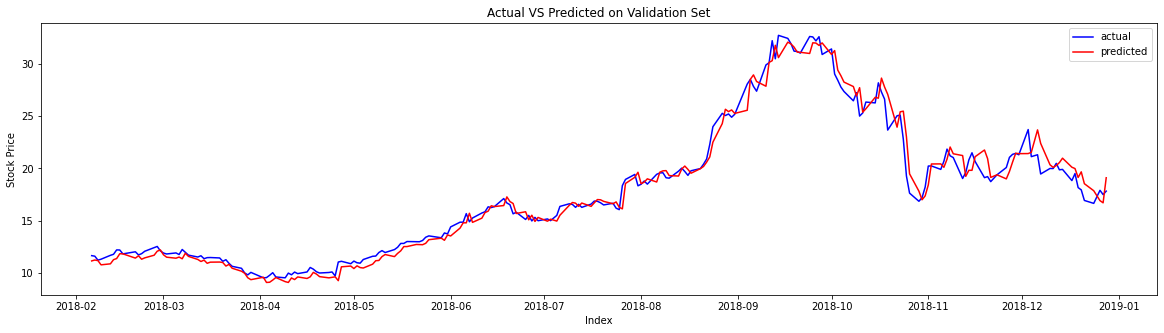

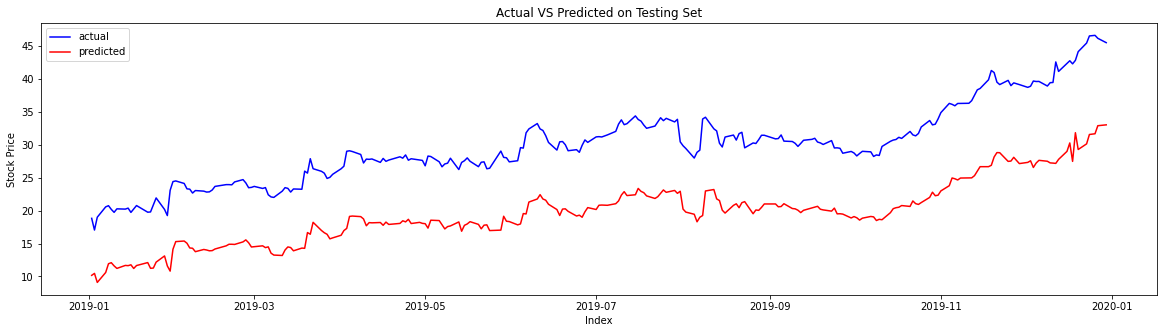

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 2
Number of hidden nodes = 24
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa2530efdd8> at a learning rate of 0.1
Dropout? No
Epochs = 200
Epoch 1/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0229 - mae: 0.1461
Epoch 2/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0141 - mae: 0.1254
Epoch 3/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0308 - mae: 0.1750
Epoch 4/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0142 - mae: 0.1257
Epoch 5/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0140 - mae: 0.1240
Epoch 6/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0139 - mae: 0.1233
Epoch 7/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0143 - mae: 0.1261
Epoch 8/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0138 - mae: 0.1238
Epoch 9/200
70/70 [=========

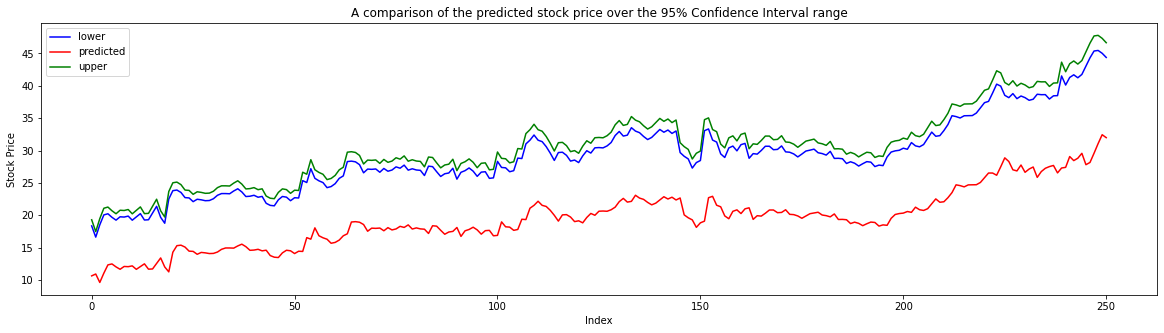

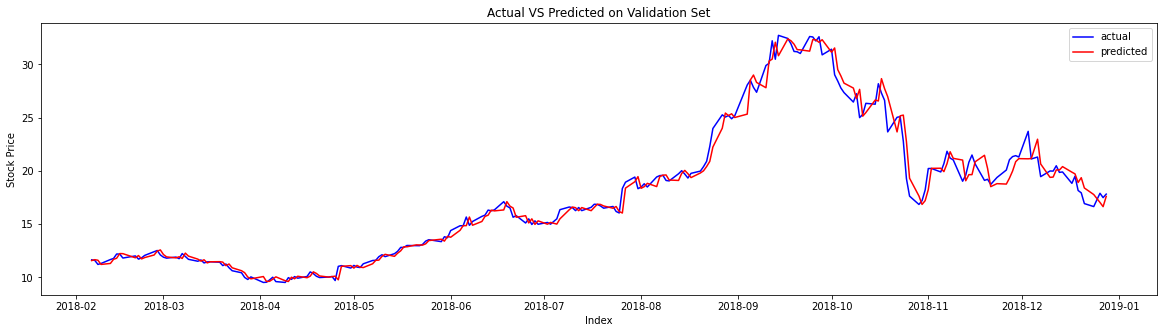

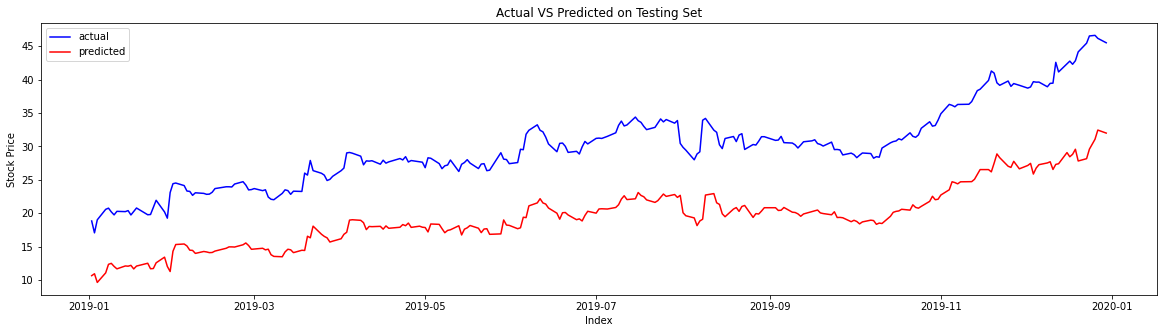

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 2
Number of hidden nodes = 27
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa2254efdd8> at a learning rate of 0.1
Dropout? No
Epochs = 200
Epoch 1/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0119 - mae: 0.0932
Epoch 2/200
70/70 [==============================] - 0s 7ms/step - loss: 3.5303e-04 - mae: 0.0139
Epoch 3/200
70/70 [==============================] - 0s 6ms/step - loss: 1.0701e-04 - mae: 0.0088
Epoch 4/200
70/70 [==============================] - 0s 6ms/step - loss: 9.5582e-05 - mae: 0.0089
Epoch 5/200
70/70 [==============================] - 0s 6ms/step - loss: 8.6291e-05 - mae: 0.0082
Epoch 6/200
70/70 [==============================] - 0s 6ms/step - loss: 8.2689e-05 - mae: 0.0081
Epoch 7/200
70/70 [==============================] - 0s 6ms/step - loss: 7.8777e-05 - mae: 0.0078
Epoch 8/200
70/70 [==============================] - 0s 6ms/step - loss: 7.6733e-05 - mae: 0.0075


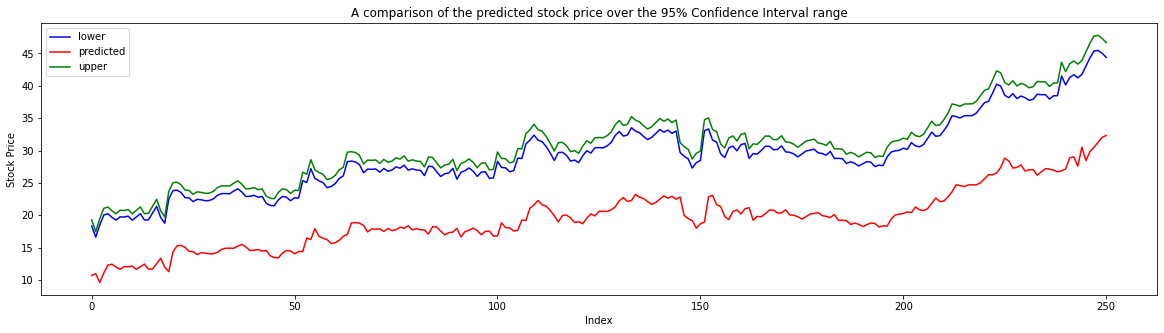

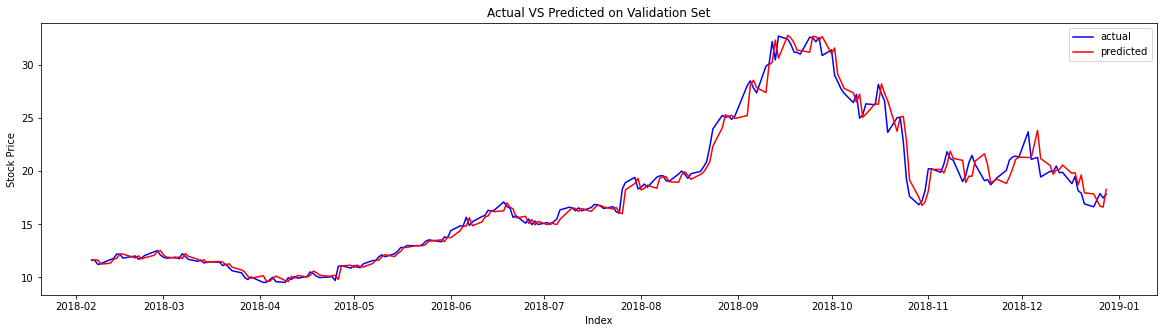

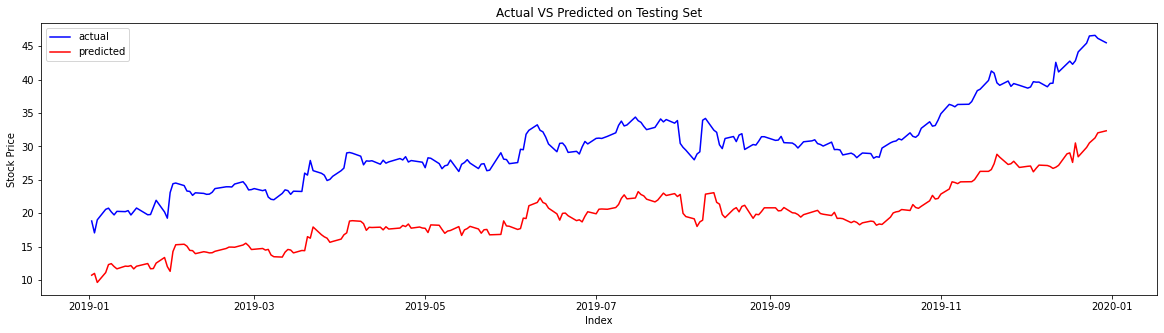

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 2
Number of hidden nodes = 15
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa22693a518> at a learning rate of 0.1
Dropout? No
Epochs = 200
Epoch 1/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0194 - mae: 0.1047
Epoch 2/200
70/70 [==============================] - 0s 6ms/step - loss: 4.1406e-04 - mae: 0.0151
Epoch 3/200
70/70 [==============================] - 0s 6ms/step - loss: 1.9341e-04 - mae: 0.0112
Epoch 4/200
70/70 [==============================] - 0s 6ms/step - loss: 1.1424e-04 - mae: 0.0091
Epoch 5/200
70/70 [==============================] - 0s 6ms/step - loss: 9.5460e-05 - mae: 0.0086
Epoch 6/200
70/70 [==============================] - 0s 6ms/step - loss: 1.0802e-04 - mae: 0.0099
Epoch 7/200
70/70 [==============================] - 0s 6ms/step - loss: 9.5175e-05 - mae: 0.0090
Epoch 8/200
70/70 [==============================] - 0s 6ms/step - loss: 8.6290e-05 - mae: 0.0083


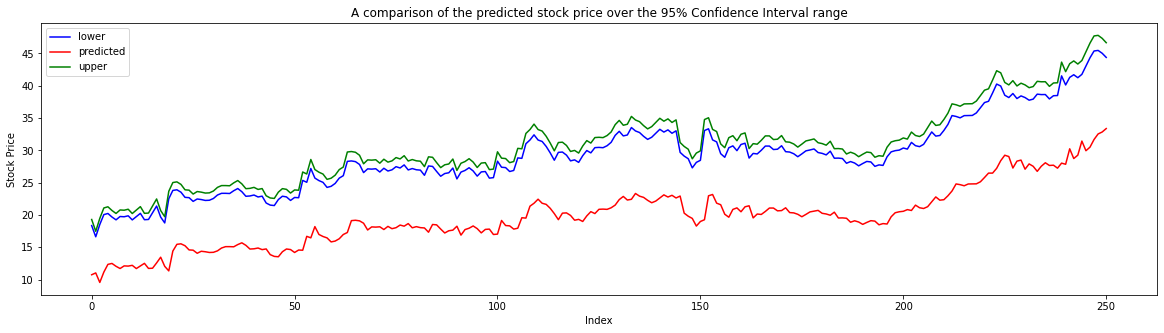

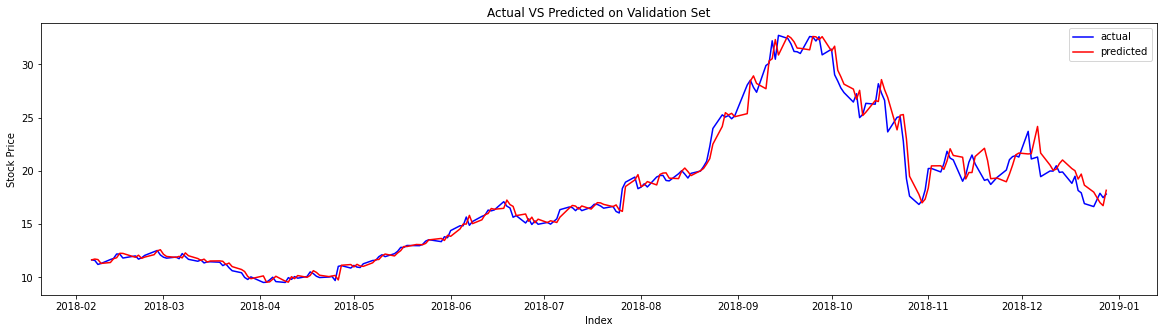

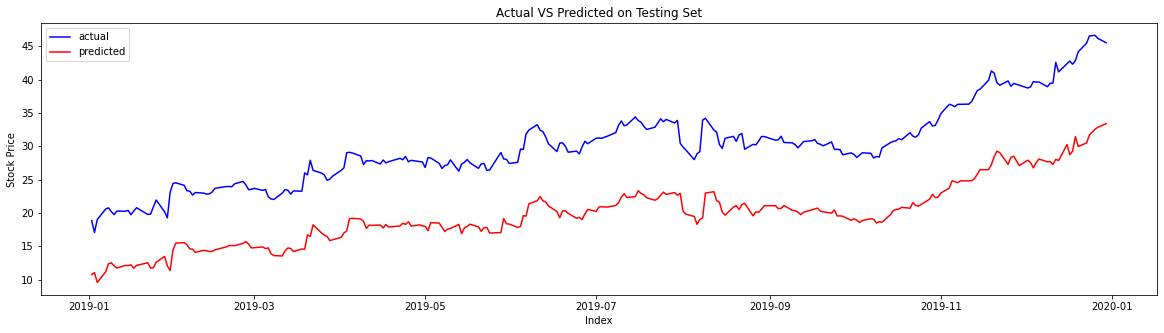

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 2
Number of hidden nodes = 20
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa25336e0f0> at a learning rate of 0.1
Dropout? No
Epochs = 200
Epoch 1/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0078 - mae: 0.0512
Epoch 2/200
70/70 [==============================] - 0s 6ms/step - loss: 2.1055e-04 - mae: 0.0108
Epoch 3/200
70/70 [==============================] - 0s 6ms/step - loss: 1.2809e-04 - mae: 0.0092
Epoch 4/200
70/70 [==============================] - 0s 6ms/step - loss: 9.7537e-05 - mae: 0.0089
Epoch 5/200
70/70 [==============================] - 0s 6ms/step - loss: 8.8070e-05 - mae: 0.0086
Epoch 6/200
70/70 [==============================] - 0s 6ms/step - loss: 2.7183e-04 - mae: 0.0154
Epoch 7/200
70/70 [==============================] - 0s 6ms/step - loss: 6.6611e-05 - mae: 0.0067
Epoch 8/200
70/70 [==============================] - 0s 6ms/step - loss: 6.8299e-05 - mae: 0.0069


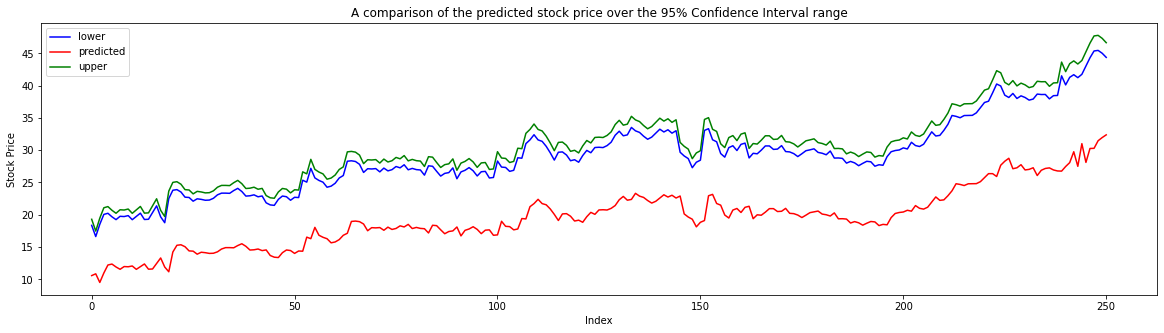

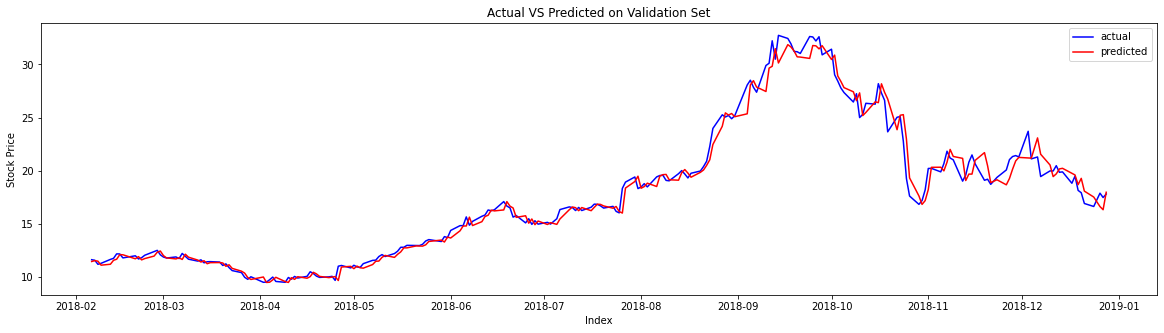

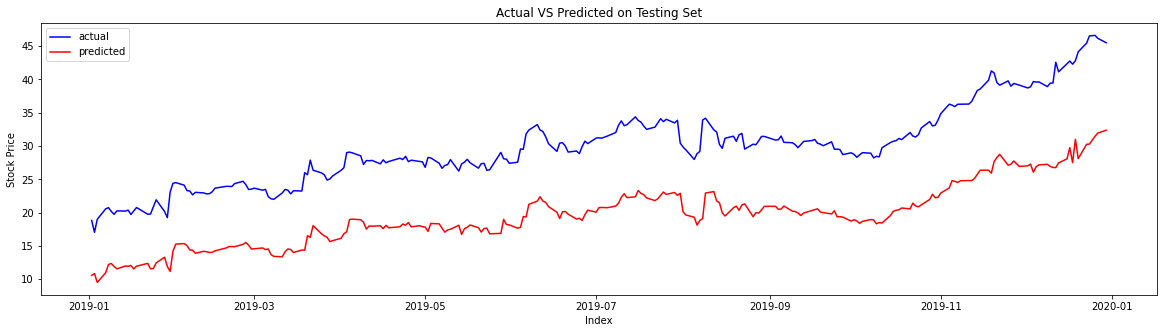

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 2
Number of hidden nodes = 4
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa221bb0eb8> at a learning rate of 0.1
Dropout? No
Epochs = 200
Epoch 1/200
70/70 [==============================] - 0s 6ms/step - loss: 0.0047 - mae: 0.0608
Epoch 2/200
70/70 [==============================] - 0s 6ms/step - loss: 1.1898e-04 - mae: 0.0096
Epoch 3/200
70/70 [==============================] - 0s 6ms/step - loss: 1.0259e-04 - mae: 0.0091
Epoch 4/200
70/70 [==============================] - 0s 6ms/step - loss: 8.4123e-05 - mae: 0.0079
Epoch 5/200
70/70 [==============================] - 0s 6ms/step - loss: 7.4713e-05 - mae: 0.0071
Epoch 6/200
70/70 [==============================] - 0s 6ms/step - loss: 7.6684e-05 - mae: 0.0075
Epoch 7/200
70/70 [==============================] - 0s 6ms/step - loss: 7.7452e-05 - mae: 0.0077
Epoch 8/200
70/70 [==============================] - 0s 6ms/step - loss: 9.3673e-05 - mae: 0.0091
E

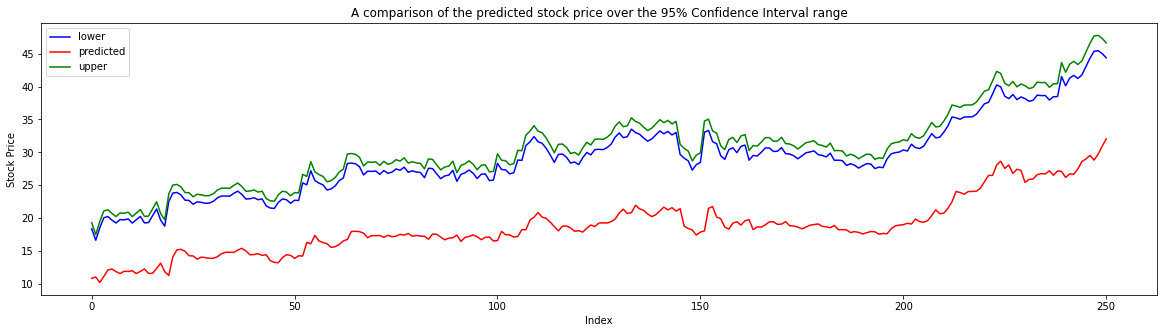

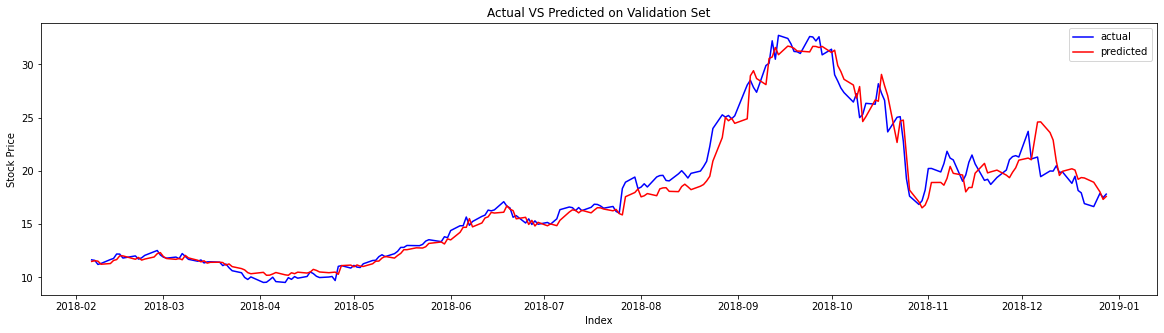

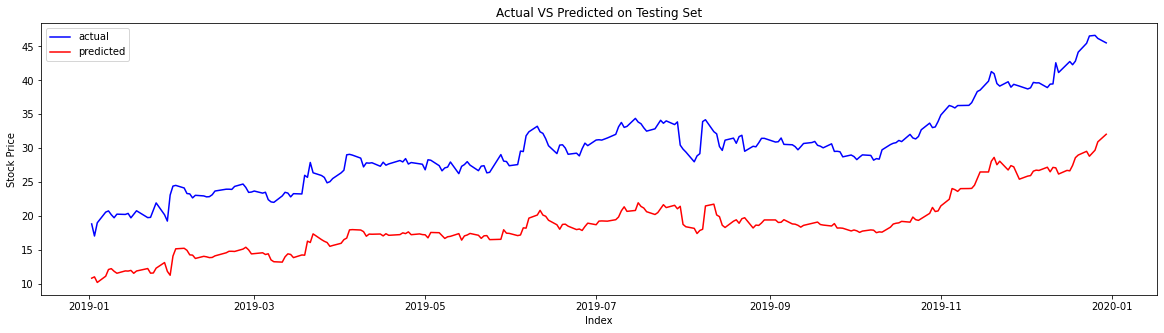

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 3
Number of hidden nodes = 30
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa252090f28> at a learning rate of 0.1
Dropout? No
Epochs = 300
Epoch 1/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0118 - mae: 0.1115
Epoch 2/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0086 - mae: 0.0949
Epoch 3/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0058 - mae: 0.0734
Epoch 4/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0039 - mae: 0.0544
Epoch 5/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0033 - mae: 0.0480
Epoch 6/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0032 - mae: 0.0481
Epoch 7/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0031 - mae: 0.0478
Epoch 8/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0031 - mae: 0.0474
Epoch 9/300
70/70

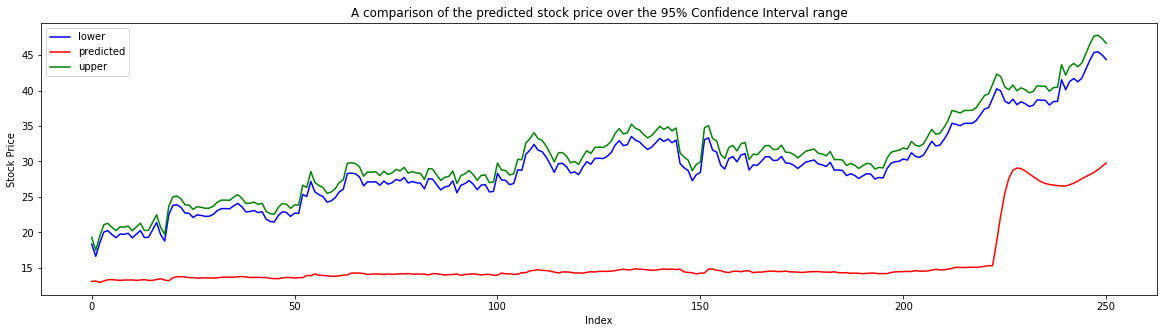

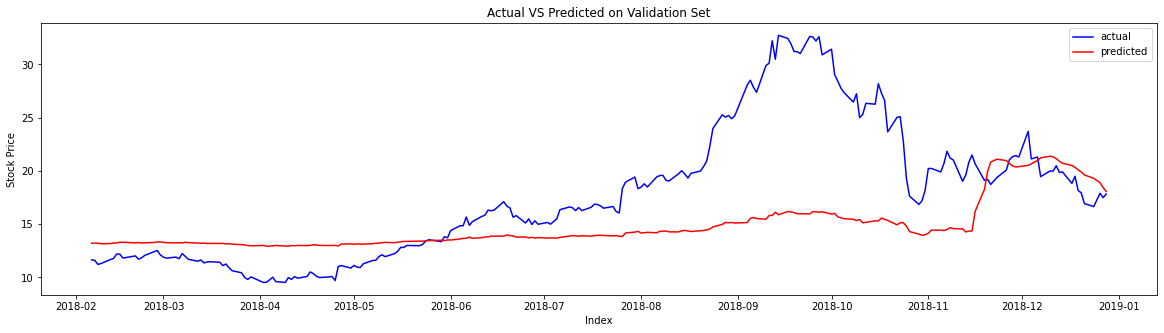

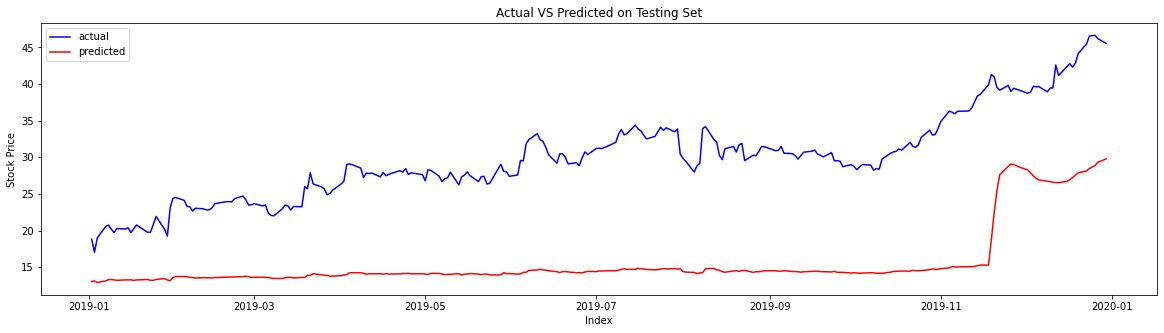

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 3
Number of hidden nodes = 21
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa2208076a0> at a learning rate of 0.1
Dropout? No
Epochs = 300
Epoch 1/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0072 - mae: 0.0771
Epoch 2/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0046 - mae: 0.0609
Epoch 3/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0042 - mae: 0.0587
Epoch 4/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0040 - mae: 0.0564
Epoch 5/300
70/70 [==============================] - 1s 9ms/step - loss: 0.0038 - mae: 0.0547
Epoch 6/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0036 - mae: 0.0531
Epoch 7/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0035 - mae: 0.0515
Epoch 8/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0034 - mae: 0.0501
Epoch 9/300
70/70

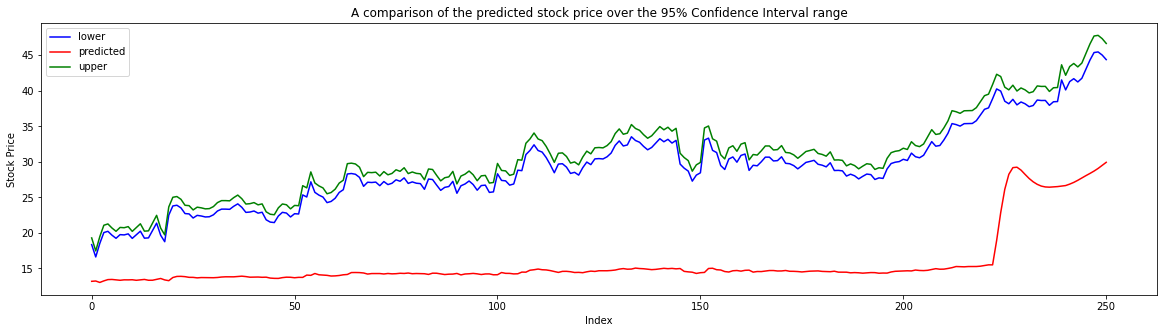

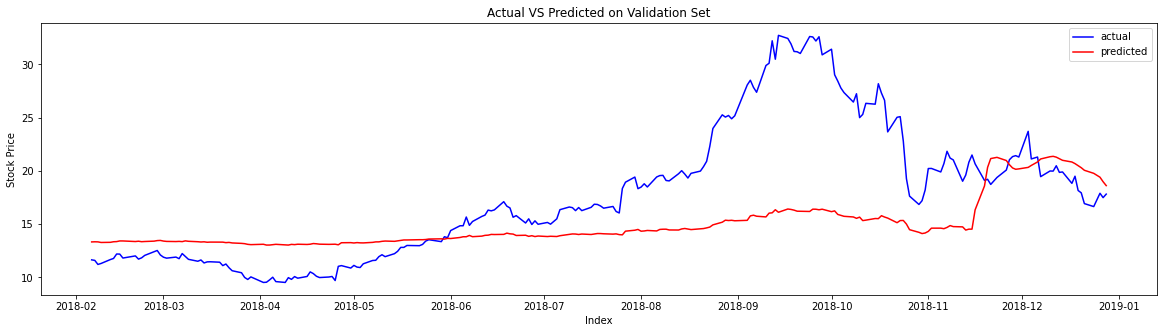

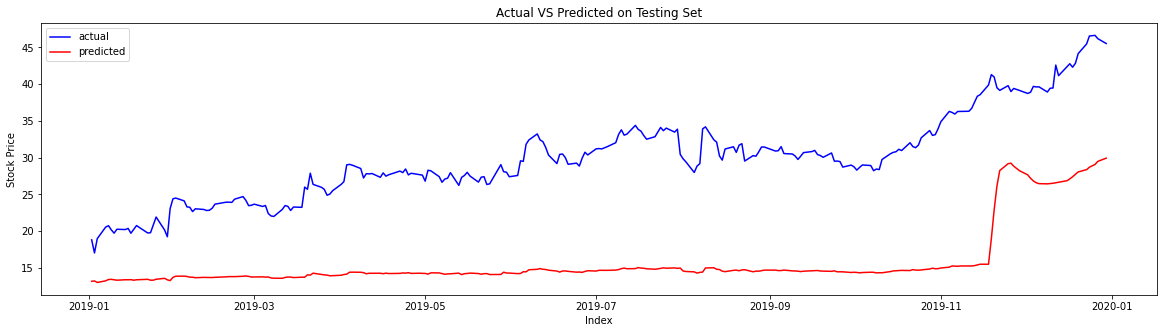

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 3
Number of hidden nodes = 24
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa222387320> at a learning rate of 0.1
Dropout? No
Epochs = 300
Epoch 1/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0129 - mae: 0.1160
Epoch 2/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0093 - mae: 0.0990
Epoch 3/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0064 - mae: 0.0781
Epoch 4/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0044 - mae: 0.0589
Epoch 5/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0038 - mae: 0.0533
Epoch 6/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0037 - mae: 0.0531
Epoch 7/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0036 - mae: 0.0523
Epoch 8/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0035 - mae: 0.0516
Epoch 9/300
70/70

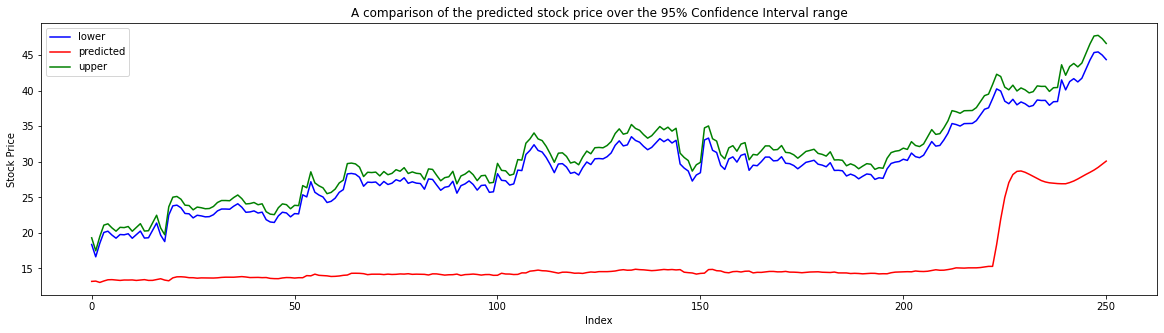

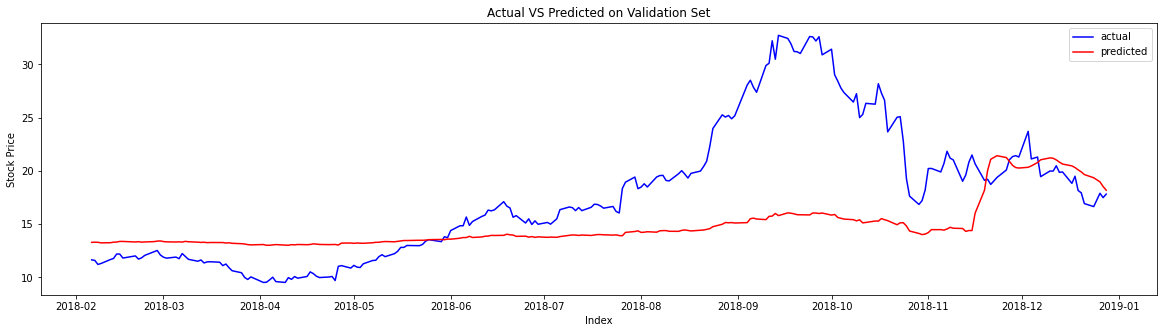

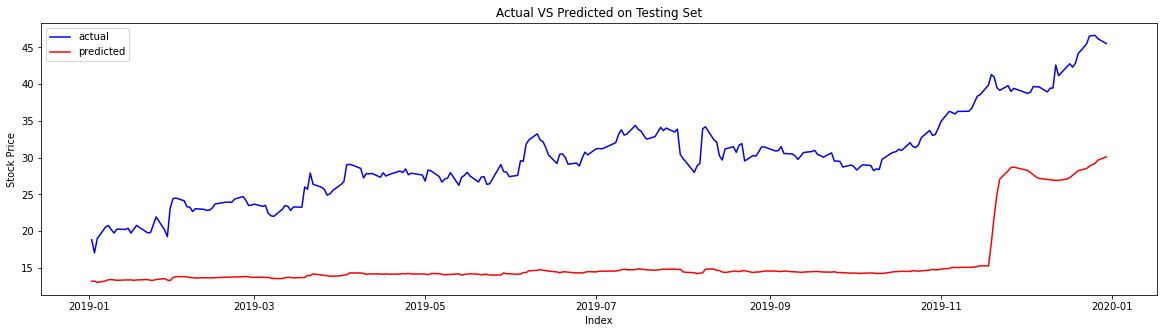

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 3
Number of hidden nodes = 27
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa21faf2780> at a learning rate of 0.1
Dropout? No
Epochs = 300
Epoch 1/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0130 - mae: 0.1167
Epoch 2/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0103 - mae: 0.1057
Epoch 3/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0079 - mae: 0.0904
Epoch 4/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0055 - mae: 0.0706
Epoch 5/300
70/70 [==============================] - 1s 9ms/step - loss: 0.0041 - mae: 0.0552
Epoch 6/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0036 - mae: 0.0513
Epoch 7/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0035 - mae: 0.0512
Epoch 8/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0034 - mae: 0.0509
Epoch 9/300
70/70

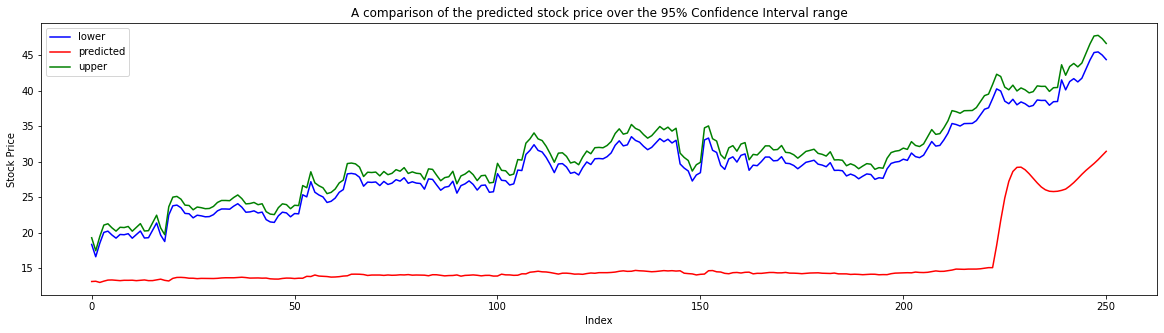

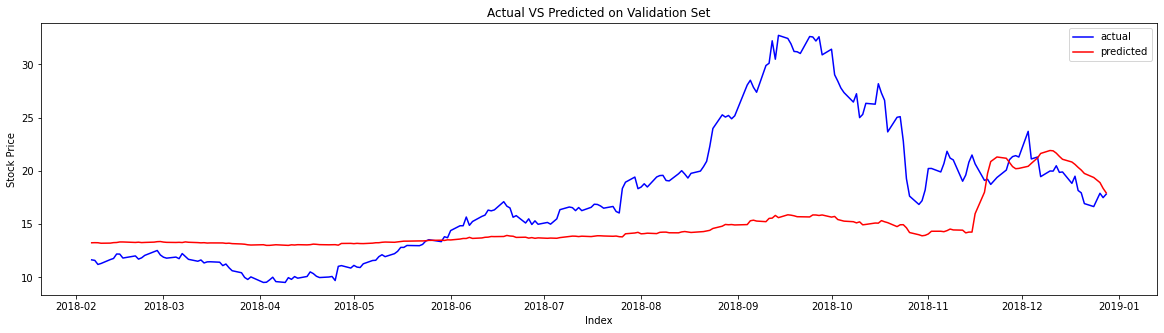

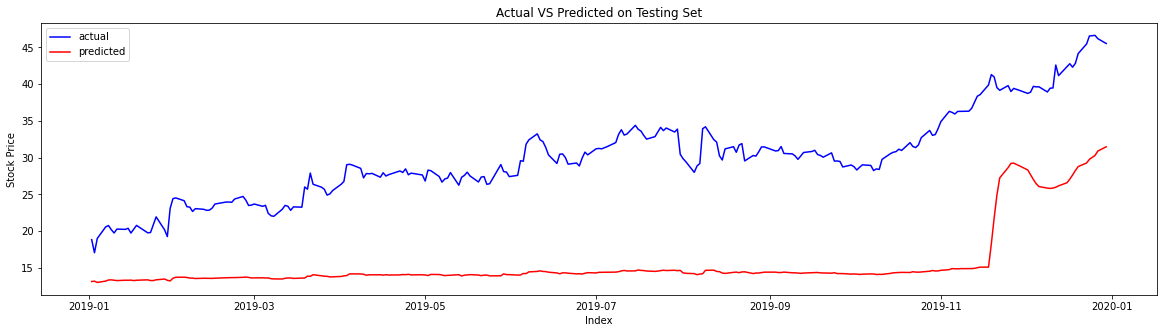

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 3
Number of hidden nodes = 15
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa21fd9e588> at a learning rate of 0.1
Dropout? No
Epochs = 300
Epoch 1/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0105 - mae: 0.1033
Epoch 2/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0063 - mae: 0.0773
Epoch 3/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0044 - mae: 0.0588
Epoch 4/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0039 - mae: 0.0557
Epoch 5/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0038 - mae: 0.0547
Epoch 6/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0037 - mae: 0.0540
Epoch 7/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0036 - mae: 0.0534
Epoch 8/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0035 - mae: 0.0526
Epoch 9/300
70/70

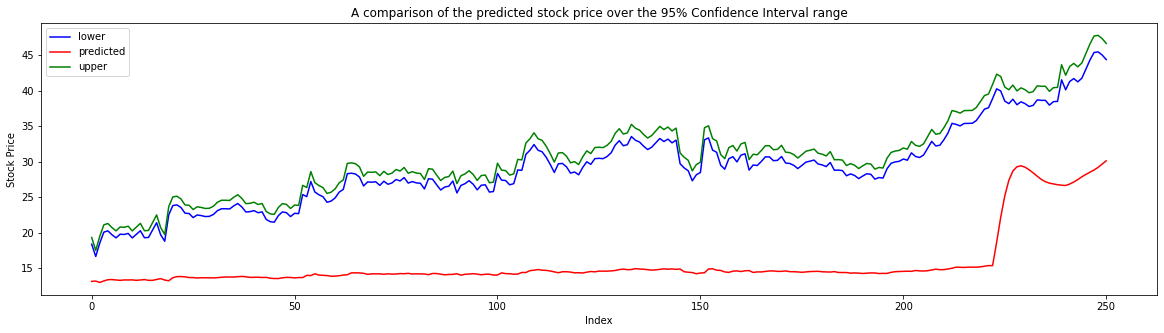

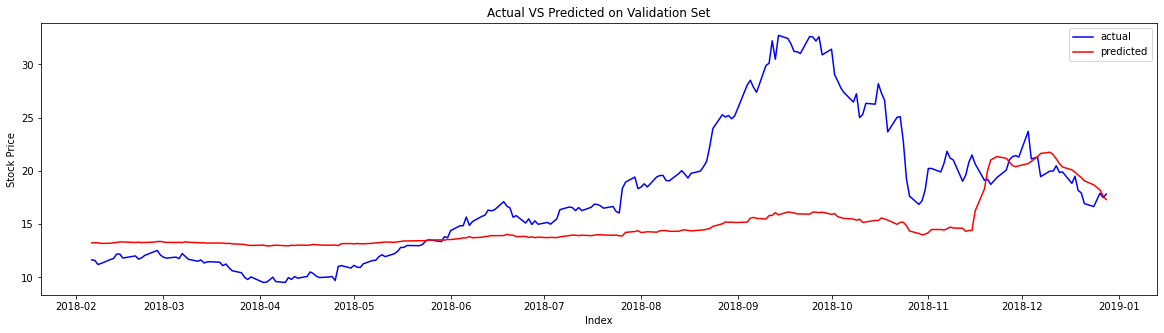

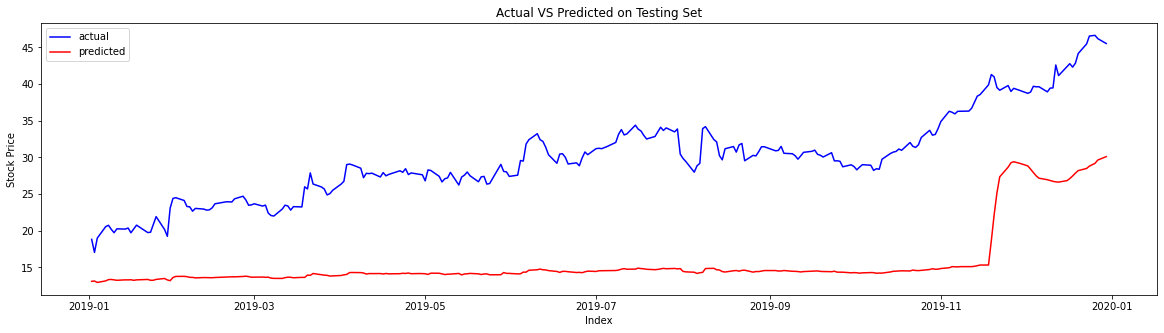

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 3
Number of hidden nodes = 20
Optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fa25335eba8> at a learning rate of 0.1
Dropout? No
Epochs = 300
Epoch 1/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0142 - mae: 0.1224
Epoch 2/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0112 - mae: 0.1097
Epoch 3/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0086 - mae: 0.0941
Epoch 4/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0060 - mae: 0.0729
Epoch 5/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0043 - mae: 0.0559
Epoch 6/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0038 - mae: 0.0520
Epoch 7/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0036 - mae: 0.0522
Epoch 8/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0035 - mae: 0.0510
Epoch 9/300
70/70

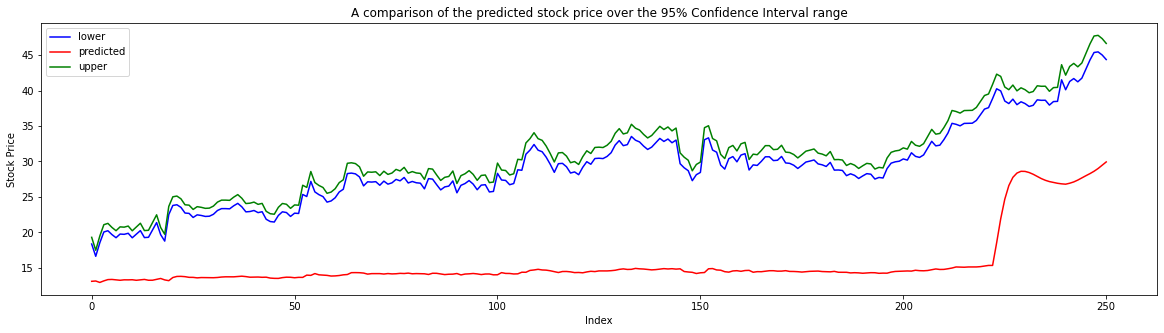

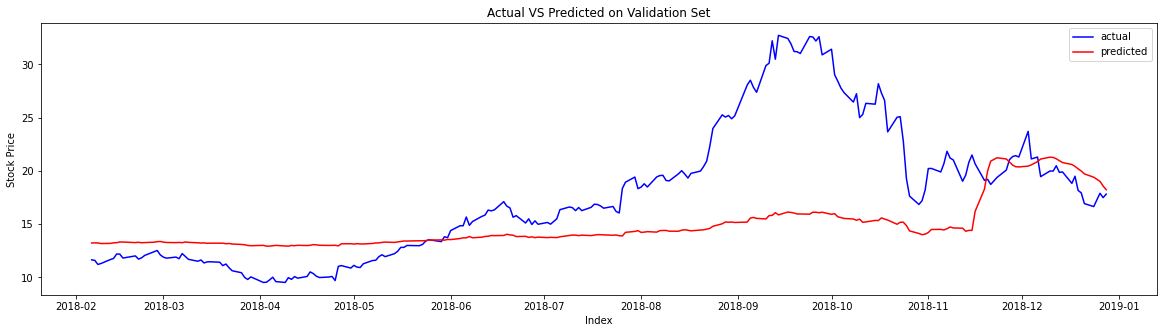

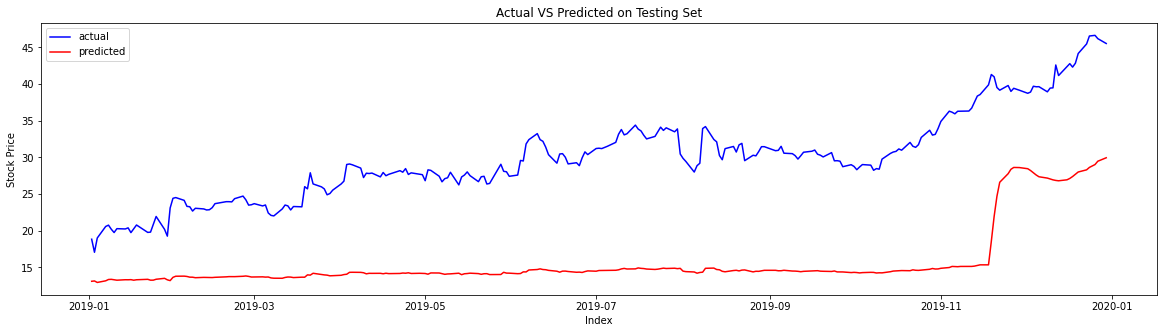

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 3
Number of hidden nodes = 30
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa2531f9748> at a learning rate of 0.1
Dropout? No
Epochs = 300
Epoch 1/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0177 - mae: 0.1352
Epoch 2/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0141 - mae: 0.1246
Epoch 3/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0139 - mae: 0.1238
Epoch 4/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0139 - mae: 0.1233
Epoch 5/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0136 - mae: 0.1225
Epoch 6/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0138 - mae: 0.1238
Epoch 7/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0136 - mae: 0.1221
Epoch 8/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0141 - mae: 0.1253
Epoch 9/300
70/70 [=========

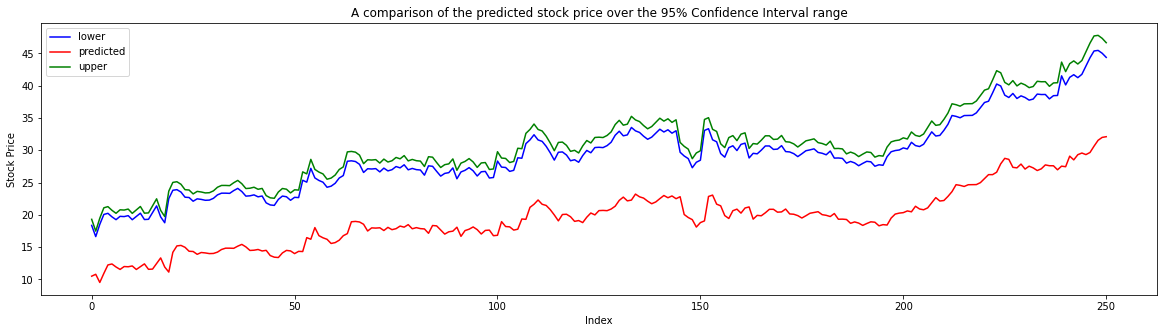

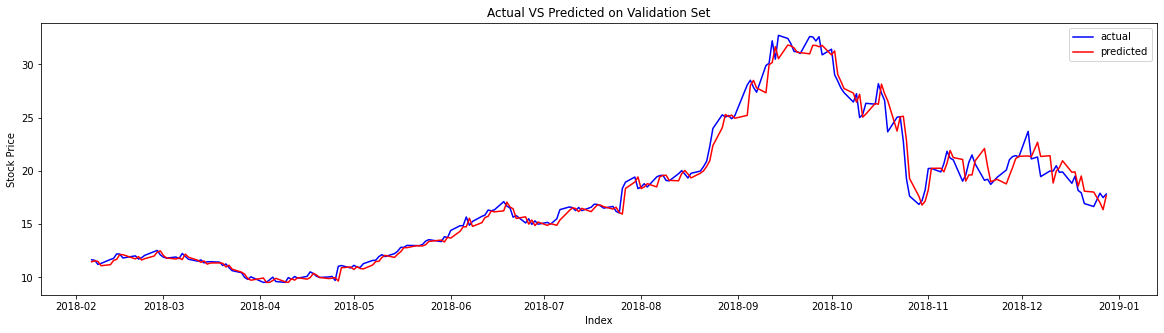

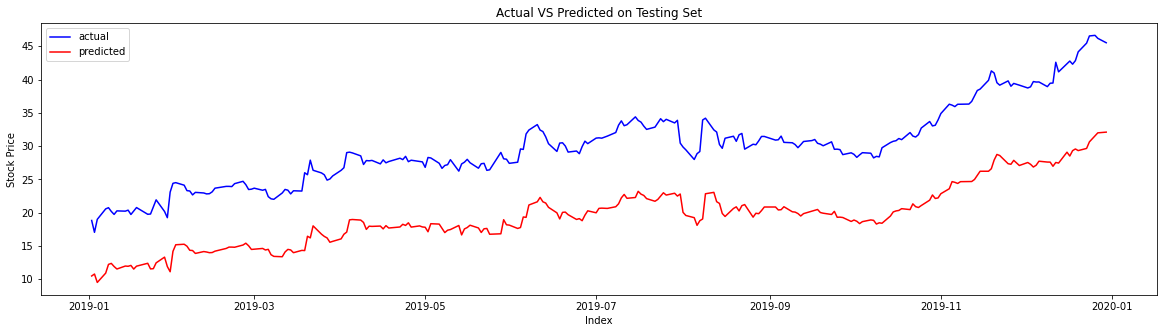

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 3
Number of hidden nodes = 21
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa21e5afc18> at a learning rate of 0.1
Dropout? No
Epochs = 300
Epoch 1/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0102 - mae: 0.0814
Epoch 2/300
70/70 [==============================] - 1s 8ms/step - loss: 6.7070e-04 - mae: 0.0199
Epoch 3/300
70/70 [==============================] - 1s 8ms/step - loss: 2.7481e-04 - mae: 0.0145
Epoch 4/300
70/70 [==============================] - 1s 8ms/step - loss: 1.8232e-04 - mae: 0.0129
Epoch 5/300
70/70 [==============================] - 1s 8ms/step - loss: 1.4076e-04 - mae: 0.0109
Epoch 6/300
70/70 [==============================] - 1s 8ms/step - loss: 2.2317e-04 - mae: 0.0146
Epoch 7/300
70/70 [==============================] - 1s 8ms/step - loss: 9.3107e-05 - mae: 0.0077
Epoch 8/300
70/70 [==============================] - 1s 8ms/step - loss: 1.0532e-04 - mae: 0.0095


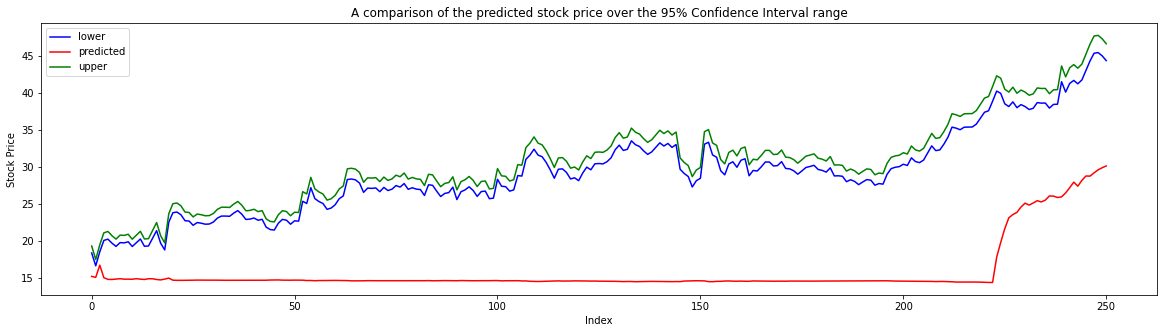

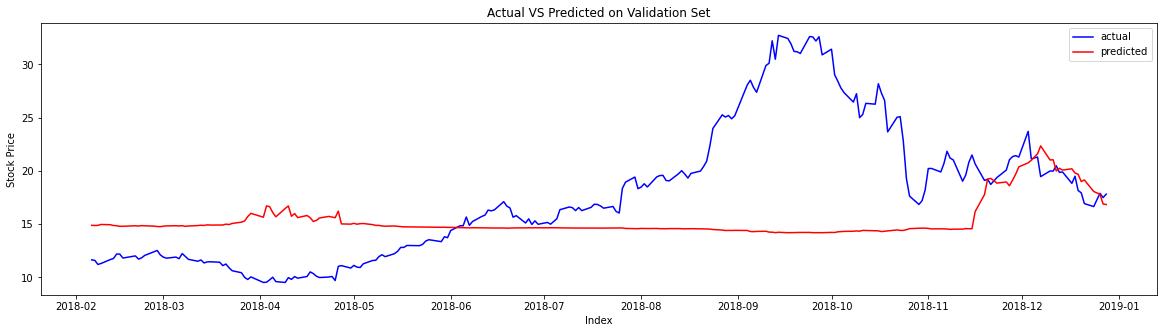

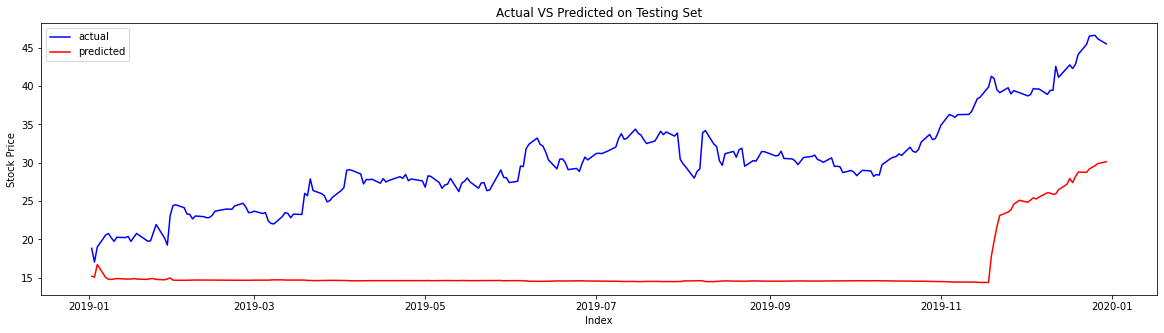

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 3
Number of hidden nodes = 24
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa220e1b710> at a learning rate of 0.1
Dropout? No
Epochs = 300
Epoch 1/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0305 - mae: 0.1586
Epoch 2/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0111 - mae: 0.1119
Epoch 3/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0032 - mae: 0.0526
Epoch 4/300
70/70 [==============================] - 1s 8ms/step - loss: 3.1240e-04 - mae: 0.0154
Epoch 5/300
70/70 [==============================] - 1s 8ms/step - loss: 3.1214e-04 - mae: 0.0163
Epoch 6/300
70/70 [==============================] - 1s 8ms/step - loss: 1.8201e-04 - mae: 0.0118
Epoch 7/300
70/70 [==============================] - 1s 8ms/step - loss: 1.0102e-04 - mae: 0.0080
Epoch 8/300
70/70 [==============================] - 1s 8ms/step - loss: 9.1852e-05 - mae: 0.0077
Epoch 9/

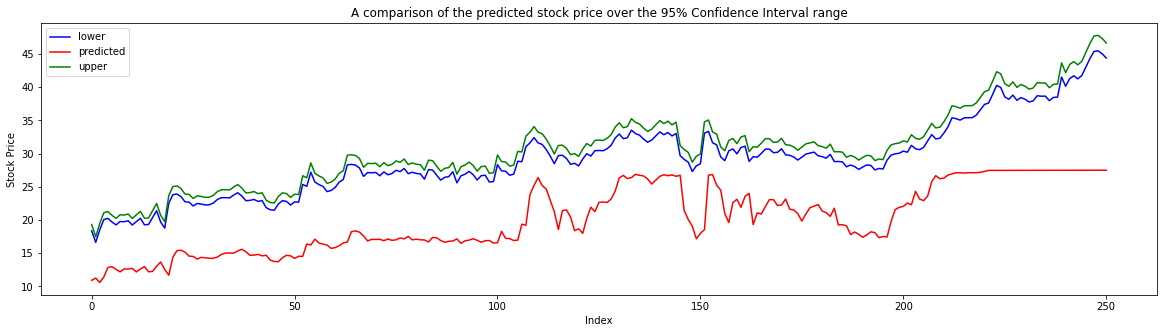

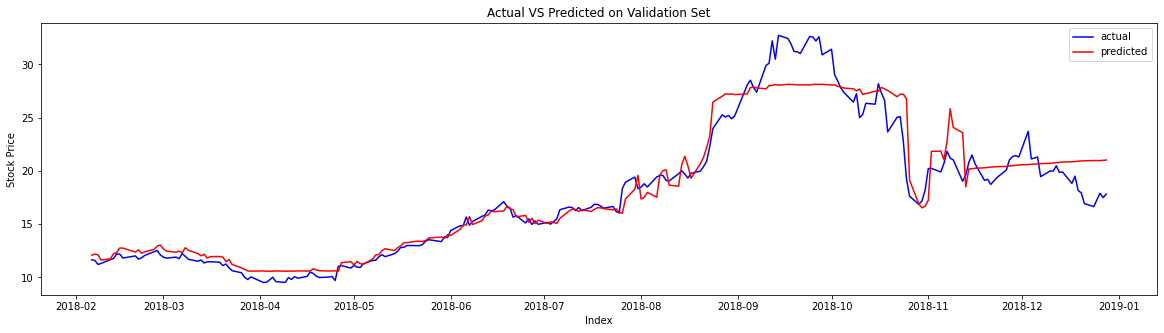

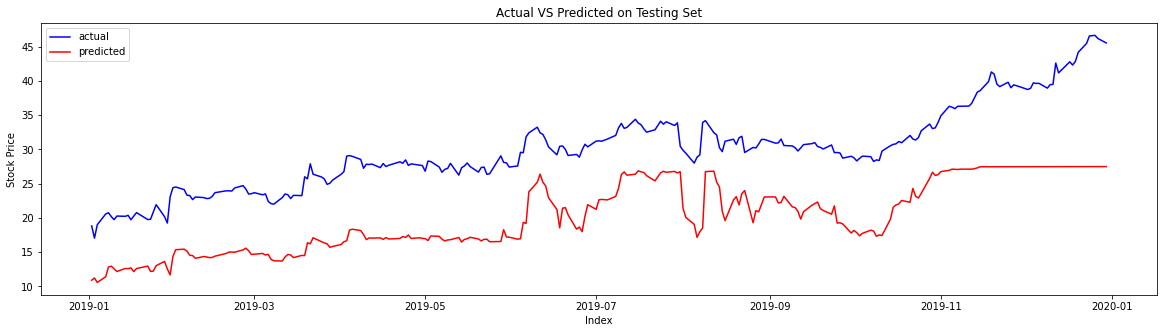

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 3
Number of hidden nodes = 27
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa222017588> at a learning rate of 0.1
Dropout? No
Epochs = 300
Epoch 1/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0058 - mae: 0.0624
Epoch 2/300
70/70 [==============================] - 1s 8ms/step - loss: 1.6431e-04 - mae: 0.0105
Epoch 3/300
70/70 [==============================] - 1s 8ms/step - loss: 1.2251e-04 - mae: 0.0101
Epoch 4/300
70/70 [==============================] - 1s 8ms/step - loss: 1.0719e-04 - mae: 0.0094
Epoch 5/300
70/70 [==============================] - 1s 8ms/step - loss: 1.2898e-04 - mae: 0.0109
Epoch 6/300
70/70 [==============================] - 1s 8ms/step - loss: 1.7206e-04 - mae: 0.0128
Epoch 7/300
70/70 [==============================] - 1s 8ms/step - loss: 1.6644e-04 - mae: 0.0115
Epoch 8/300
70/70 [==============================] - 1s 8ms/step - loss: 2.7151e-04 - mae: 0.0173


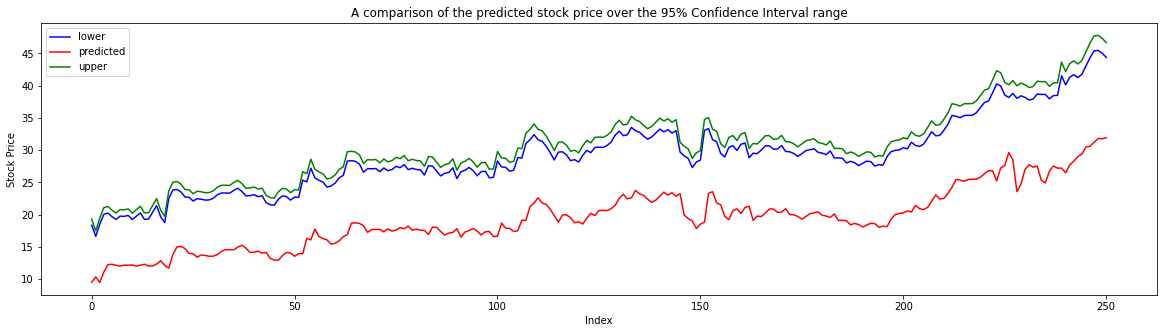

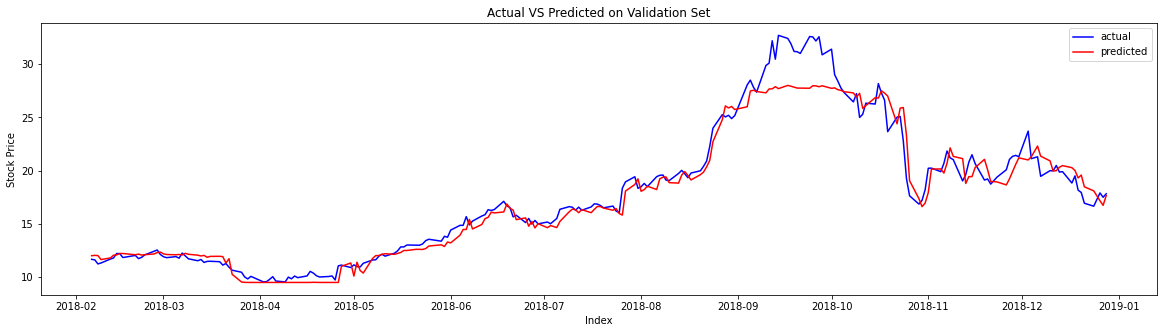

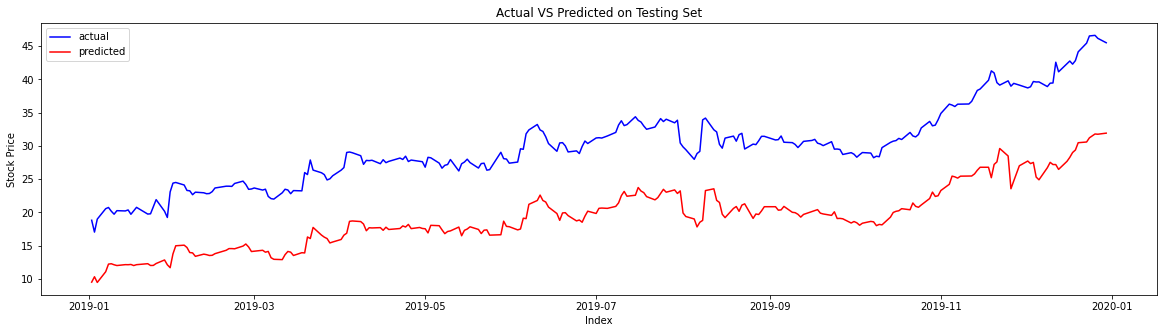

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 3
Number of hidden nodes = 15
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa2248adb00> at a learning rate of 0.1
Dropout? No
Epochs = 300
Epoch 1/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0101 - mae: 0.1040
Epoch 2/300
70/70 [==============================] - 1s 8ms/step - loss: 0.0026 - mae: 0.0458
Epoch 3/300
70/70 [==============================] - 1s 8ms/step - loss: 1.8185e-04 - mae: 0.0133
Epoch 4/300
70/70 [==============================] - 1s 8ms/step - loss: 1.6610e-04 - mae: 0.0129
Epoch 5/300
70/70 [==============================] - 1s 8ms/step - loss: 1.2221e-04 - mae: 0.0105
Epoch 6/300
70/70 [==============================] - 1s 8ms/step - loss: 1.0357e-04 - mae: 0.0094
Epoch 7/300
70/70 [==============================] - 1s 8ms/step - loss: 2.3807e-04 - mae: 0.0148
Epoch 8/300
70/70 [==============================] - 1s 8ms/step - loss: 1.7481e-04 - mae: 0.0127
Epoc

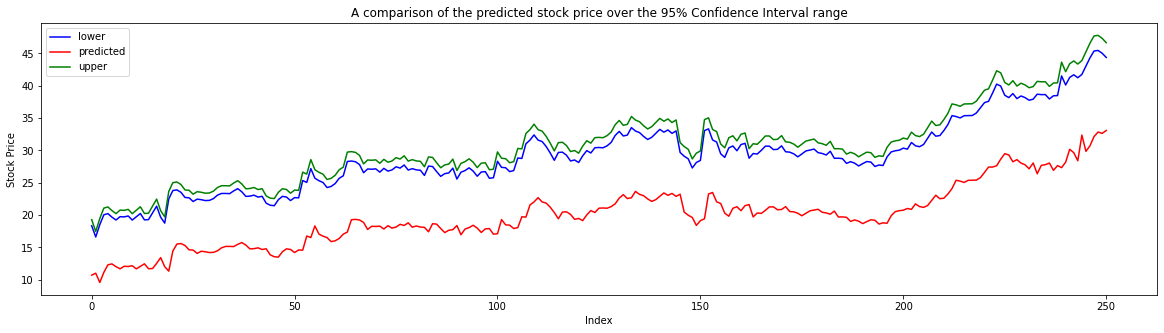

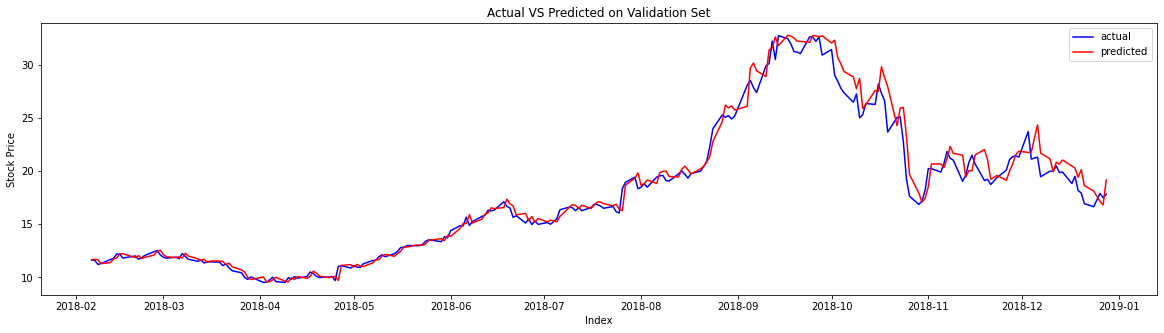

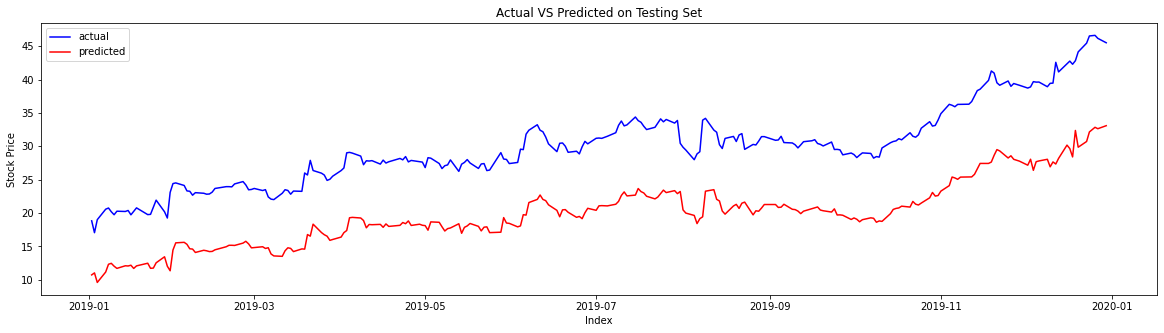

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 3
Number of hidden nodes = 20
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa221bab438> at a learning rate of 0.1
Dropout? No
Epochs = 300
Epoch 1/300
70/70 [==============================] - 1s 9ms/step - loss: 0.0207 - mae: 0.1387
Epoch 2/300
70/70 [==============================] - 1s 9ms/step - loss: 0.0050 - mae: 0.0692
Epoch 3/300
70/70 [==============================] - 1s 9ms/step - loss: 3.2255e-04 - mae: 0.0163
Epoch 4/300
70/70 [==============================] - 1s 9ms/step - loss: 2.0746e-04 - mae: 0.0135
Epoch 5/300
70/70 [==============================] - 1s 9ms/step - loss: 1.9071e-04 - mae: 0.0128
Epoch 6/300
70/70 [==============================] - 1s 9ms/step - loss: 1.7234e-04 - mae: 0.0127
Epoch 7/300
70/70 [==============================] - 1s 9ms/step - loss: 1.1042e-04 - mae: 0.0091
Epoch 8/300
70/70 [==============================] - 1s 9ms/step - loss: 1.9419e-04 - mae: 0.0135
Epoc

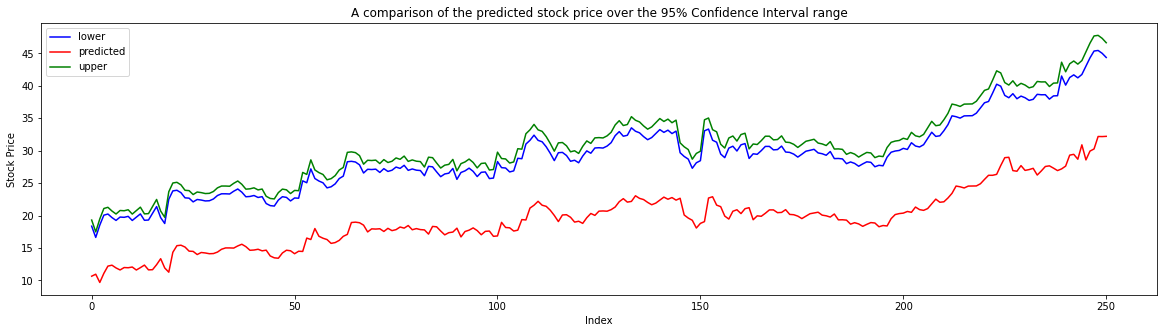

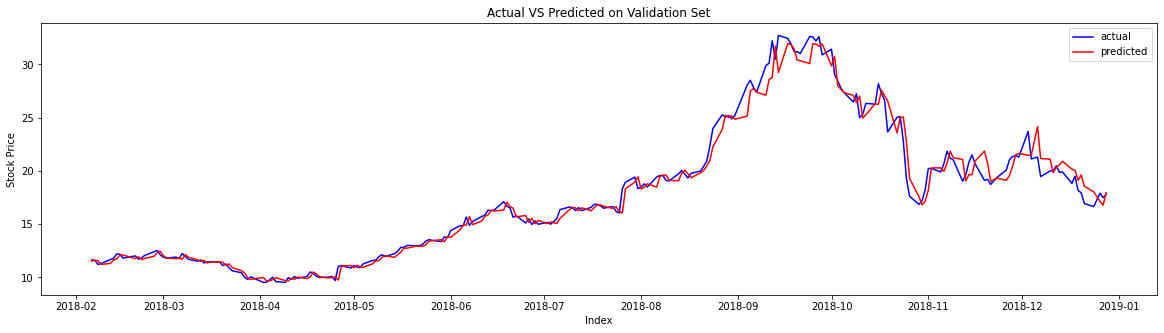

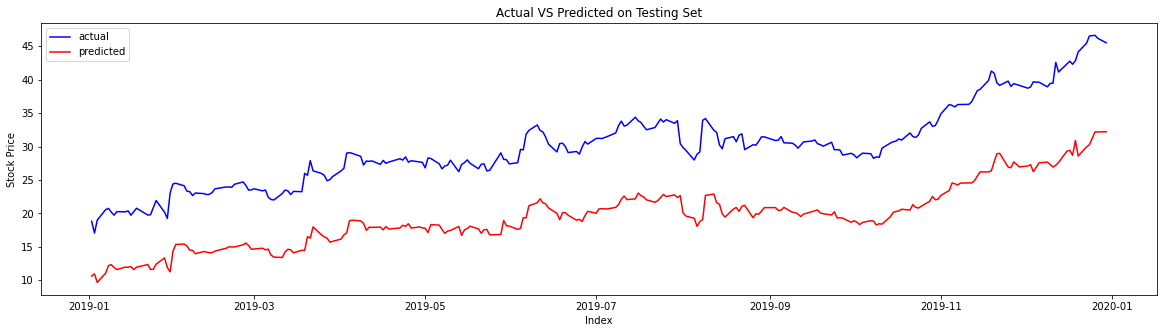

In [ ]:
# To test the validation set on different hidden nodes, hidden layers and optimiser
# Hidden layer - 1 to 3
# Hidden nodes - 30,21,24,27,15,20,4
# Optimiser - Adam or SGD
# Epochs - 100,200,300

# 1 hidden layer - SGD
metrics_result = pd.DataFrame(columns = ['MAE','MSE','RMSE','MAPE','R2','CI','Trend'])

test_no = 0

array_hidden_nodes = np.array([30,21,24,27,15,20,4])
combined = pd.DataFrame({"a": array_hidden_nodes})

for a in combined['a']:
  fitted_model, train_predict, test_predict, result = build_model(X_train_validation_30, y_train_validation_30, X_test_30, X_validation_30, train_validation, test, validation, 
                                                                  hidden_node=a, 
                                                                  sliding_window=30, 
                                                                  timesteps=1, 
                                                                  epochs=100, 
                                                                  optimizer='SGD', # change
                                                                  learning_rate=1e-1, 
                                                                  dropout=0.2,
                                                                  layer1_dropout = '0',
                                                                  layer2 = 0,
                                                                  layer2_dropout = '0', 
                                                                  layer3 = 0,
                                                                  layer3_dropout = '0')
  metrics_result = metrics_result.append(result)
  test_no = test_no + 1

# 1 hidden layer - Adam
array_hidden_nodes = np.array([30,21,24,27,15,20,4])
combined = pd.DataFrame({"a": array_hidden_nodes})

for a in combined['a']:
  fitted_model, train_predict, test_predict, result = build_model(X_train_validation_30, y_train_validation_30, X_test_30,  X_validation_30, train_validation, test, validation, 
                                                                  hidden_node=a, 
                                                                  sliding_window=30, 
                                                                  timesteps=1, 
                                                                  epochs=100, 
                                                                  optimizer='ADAM', # change
                                                                  learning_rate=1e-1, 
                                                                  dropout=0.2,
                                                                  layer1_dropout = '0',
                                                                  layer2 = 0,
                                                                  layer2_dropout = '0', 
                                                                  layer3 = 0,
                                                                  layer3_dropout = '0')
  metrics_result = metrics_result.append(result)
  test_no = test_no + 1

# 2 hidden layer - SGD
array_hidden_nodes = np.array([30,21,24,27,15,20,4])
combined = pd.DataFrame({"a": array_hidden_nodes})

for a in combined['a']:
  fitted_model, train_predict, test_predict, result = build_model(X_train_validation_30, y_train_validation_30, X_test_30,  X_validation_30, train_validation, test, validation, 
                                                                  hidden_node=a, 
                                                                  sliding_window=30, 
                                                                  timesteps=1, 
                                                                  epochs=200, 
                                                                  optimizer='SGD', # change
                                                                  learning_rate=1e-1, 
                                                                  dropout=0.2,
                                                                  layer1_dropout = '0',
                                                                  layer2 = 2,
                                                                  layer2_dropout = '0', 
                                                                  layer3 = 0,
                                                                  layer3_dropout = '0')
  metrics_result = metrics_result.append(result)
  test_no = test_no + 1

# 2 hidden layer - ADAM
array_hidden_nodes = np.array([30,21,24,27,15,20,4])
combined = pd.DataFrame({"a": array_hidden_nodes})

for a in combined['a']:
  fitted_model, train_predict, test_predict, result = build_model(X_train_validation_30, y_train_validation_30, X_test_30,  X_validation_30, train_validation, test, validation, 
                                                                  hidden_node=a, 
                                                                  sliding_window=30, 
                                                                  timesteps=1, 
                                                                  epochs=200, 
                                                                  optimizer='ADAM', # change
                                                                  learning_rate=1e-1, 
                                                                  dropout=0.2,
                                                                  layer1_dropout = '0',
                                                                  layer2 = 2,
                                                                  layer2_dropout = '0', 
                                                                  layer3 = 0,
                                                                  layer3_dropout = '0')
  metrics_result = metrics_result.append(result)
  test_no = test_no + 1

# 3 hidden layer - SGD
array_hidden_nodes = np.array([30,21,24,27,15,20])
combined = pd.DataFrame({"a": array_hidden_nodes})

for a in combined['a']:
  fitted_model, train_predict, test_predict, result = build_model(X_train_validation_30, y_train_validation_30, X_test_30,  X_validation_30, train_validation, test, validation, 
                                                                  hidden_node=a, 
                                                                  sliding_window=30, 
                                                                  timesteps=1, 
                                                                  epochs=300, 
                                                                  optimizer='SGD', # change
                                                                  learning_rate=1e-1, 
                                                                  dropout=0.2,
                                                                  layer1_dropout = '0',
                                                                  layer2 = 2,
                                                                  layer2_dropout = '0', 
                                                                  layer3 = 3,
                                                                  layer3_dropout = '0')
  metrics_result = metrics_result.append(result)
  test_no = test_no + 1

# 3 hidden layer - Adam
array_hidden_nodes = np.array([30,21,24,27,15,20])
combined = pd.DataFrame({"a": array_hidden_nodes})

for a in combined['a']:
  fitted_model, train_predict, test_predict, result = build_model(X_train_validation_30, y_train_validation_30, X_test_30,  X_validation_30, train_validation, test, validation, 
                                                                  hidden_node=a, 
                                                                  sliding_window=30, 
                                                                  timesteps=1, 
                                                                  epochs=300, 
                                                                  optimizer='ADAM', # change
                                                                  learning_rate=1e-1, 
                                                                  dropout=0.2,
                                                                  layer1_dropout = '0',
                                                                  layer2 = 2,
                                                                  layer2_dropout = '0', 
                                                                  layer3 = 3,
                                                                  layer3_dropout = '0')
  metrics_result = metrics_result.append(result)
  test_no = test_no + 1

In [ ]:
print(metrics_result)
metrics_result.to_csv(r'../content/drive/My Drive/Dataset/2-AMD-val-set.csv', index = True)

    MAE    MSE  RMSE   MAPE     R2     CI  Trend
0  3.38  23.09  4.81  16.52   0.42   7.52  50.67
0   3.1  19.16  4.38  15.14   0.51   7.96  50.67
0   3.4  23.25  4.82  16.67   0.41   7.52  49.78
0  3.29  21.72  4.66  16.04   0.45   7.96  50.22
0  3.29  21.65  4.65  16.07   0.45   7.08  50.22
0  3.42  23.68  4.87  16.69    0.4   7.52  51.11
0  3.27  20.78  4.56  16.16   0.47   7.52  51.11
0  0.57   0.76  0.87   3.04   0.98  53.54  51.11
0  0.61   0.84  0.92    3.2   0.98  52.65  51.56
0  0.59   0.78  0.89   3.15   0.98  53.10  50.67
0  0.59   0.78  0.88   3.09   0.98  54.42  51.11
0  0.62   0.86  0.93   3.22   0.98  52.21  50.67
0  0.58   0.77  0.87   3.05   0.98  56.19  51.56
0  0.59   0.79  0.89   3.12   0.98  54.42  52.44
0  4.02  32.32  5.69  19.83   0.18   6.19  48.89
0  4.09  33.58  5.79  20.16   0.15   5.75  48.89
0  4.11  33.93  5.83  20.25   0.14   6.19  48.89
0  4.08  33.42  5.78  20.09   0.15   6.64  48.89
0  4.14  34.49  5.87  20.33   0.13   4.42  48.89
0  4.14  34.19  5.85

In [ ]:
# To run over different dropout rates

metrics_result = pd.DataFrame(columns = ['MAE','MSE','RMSE','MAPE','R2','CI','Trend'])

array_dropout = np.array([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
combined = pd.DataFrame({"a": array_dropout})
test_no = 0

for a in combined['a']:
  print('\n\n\nTest ' + str(test_no) + '\n\n\n')
  fitted_model, train_predict, test_predict, result = build_model(X_train_validation_30, y_train_validation_30, X_test_30, X_validation_30, train_validation, test, validation, 
                                                                  hidden_node=30, 
                                                                  sliding_window=30, 
                                                                  timesteps=1, 
                                                                  epochs=100, 
                                                                  optimizer='ADAM', # change
                                                                  learning_rate=0.1, 
                                                                  dropout=a,
                                                                  layer1_dropout = '1dp',
                                                                  #1 layer only no need for layer 2 and 3 dropouts
                                                                  layer2 = 0,
                                                                  layer2_dropout = '0', 

                                                                  layer3 = 0,
                                                                  layer3_dropout = '0')
  # change
  metrics_result = metrics_result.append(result)
  test_no = test_no + 1

In [ ]:
print(metrics_result)
metrics_result.to_csv(r'../content/drive/My Drive/Dataset/LSTM-Result-AMD-dropout.csv', index = True)

    MAE   MSE  RMSE  MAPE    R2     CI  Trend
0  0.58  0.78  0.88  3.05  0.98  57.96  50.22
0  0.58  0.77  0.88  3.06  0.98  56.19  51.11
0  0.62   0.9  0.95  3.21  0.98  53.10  50.67
0  0.66  0.89  0.95  3.54  0.98  43.81  49.78
0  0.58  0.76  0.87  3.14  0.98  53.10  52.00
0  0.74  1.21   1.1  3.81  0.97  42.92  52.44
0  0.65  0.93  0.97  3.51  0.98  50.00  52.00
0  0.74  1.22   1.1  3.69  0.97  42.04  51.56
0  0.62  0.86  0.93  3.26  0.98  50.44  52.44
0  1.02  1.44   1.2   6.7  0.96  24.34  52.44
0  1.22  2.55   1.6  6.99  0.94  19.47  52.44


Remove validation_split = 0.1 as testing now and no longer validating

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 30
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa22078a940> at a learning rate of 0.1
Dropout? Yes 1 layer
Epochs = 100
Epoch 1/100
7/7 [==============================] - 0s 4ms/step - loss: 0.1947 - mae: 0.4940
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0284 - mae: 0.1903
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0178 - mae: 0.1467
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0119 - mae: 0.1158
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0099 - mae: 0.1033
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0084 - mae: 0.0947
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0076 - mae: 0.0891
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0069 - mae: 0.0837
Epoch 9/100
7/7 [==================

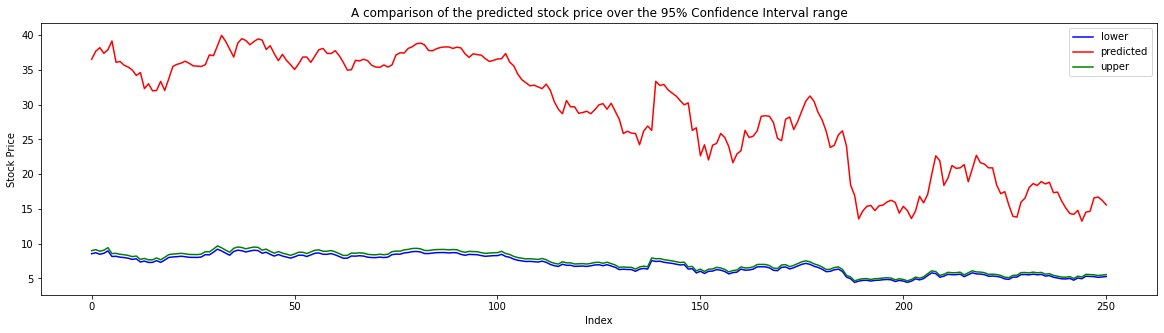

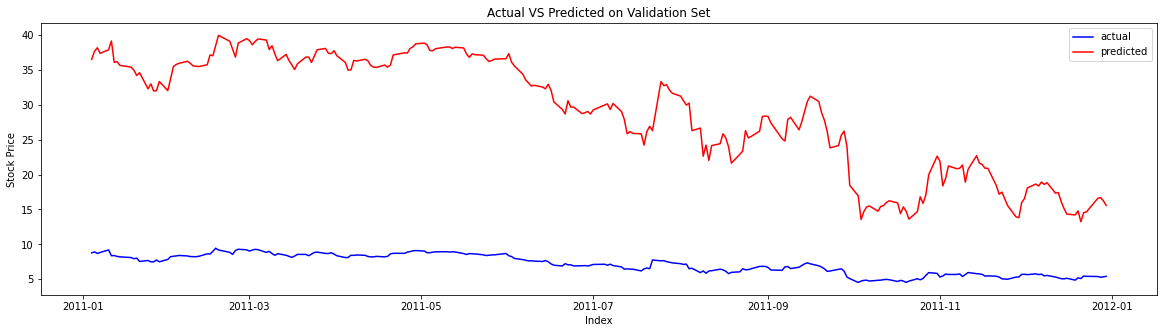

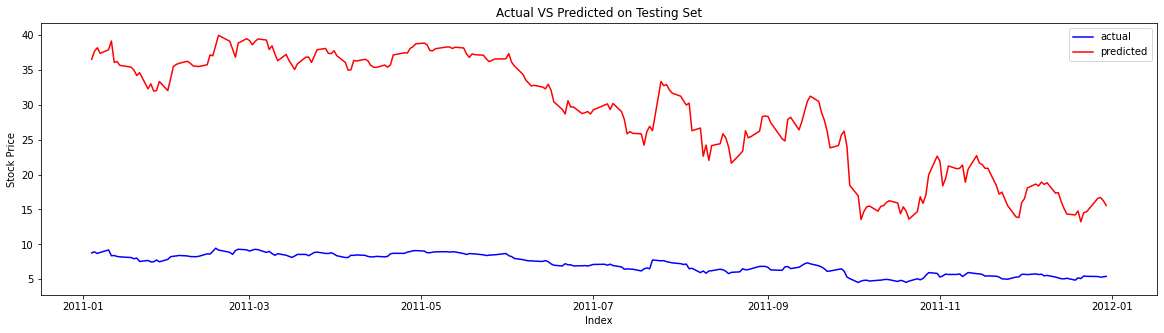

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 30
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa220ace080> at a learning rate of 0.1
Dropout? Yes 1 layer
Epochs = 100
Epoch 1/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1114 - mae: 0.3449
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0125 - mae: 0.1241
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0066 - mae: 0.0873
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0049 - mae: 0.0736
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0041 - mae: 0.0672
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0035 - mae: 0.0626
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0031 - mae: 0.0597
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0029 - mae: 0.0574
Epoch 9/100
15/15 [

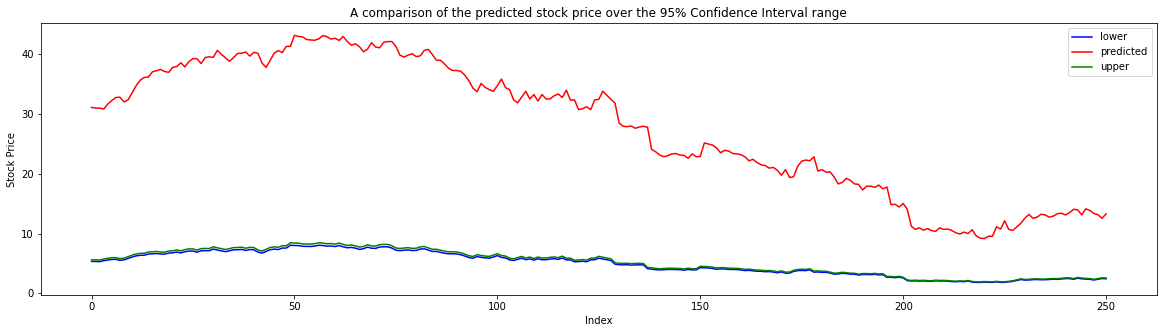

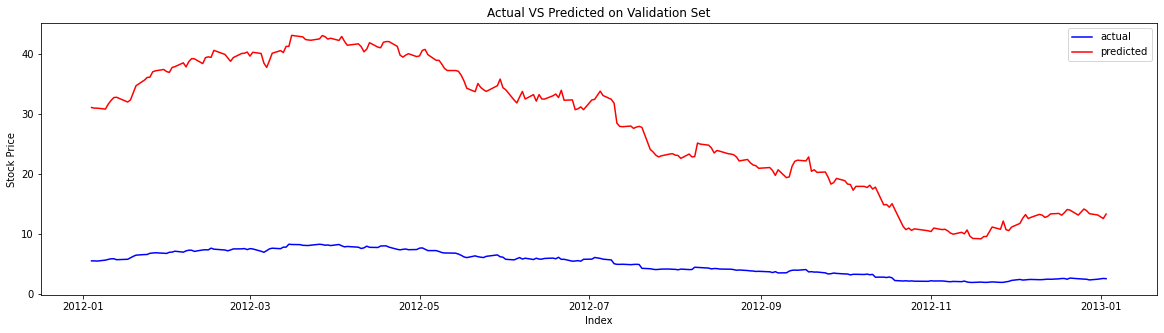

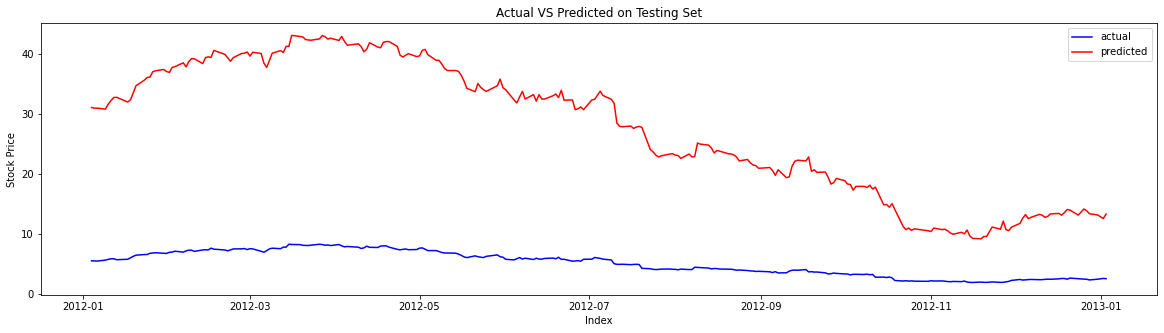

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 30
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa21d184e48> at a learning rate of 0.1
Dropout? Yes 1 layer
Epochs = 100
Epoch 1/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1098 - mae: 0.2913
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0055 - mae: 0.0793
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0030 - mae: 0.0594
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0024 - mae: 0.0528
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0021 - mae: 0.0482
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0018 - mae: 0.0447
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0016 - mae: 0.0422
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0014 - mae: 0.0400
Epoch 9/100
23/23 [

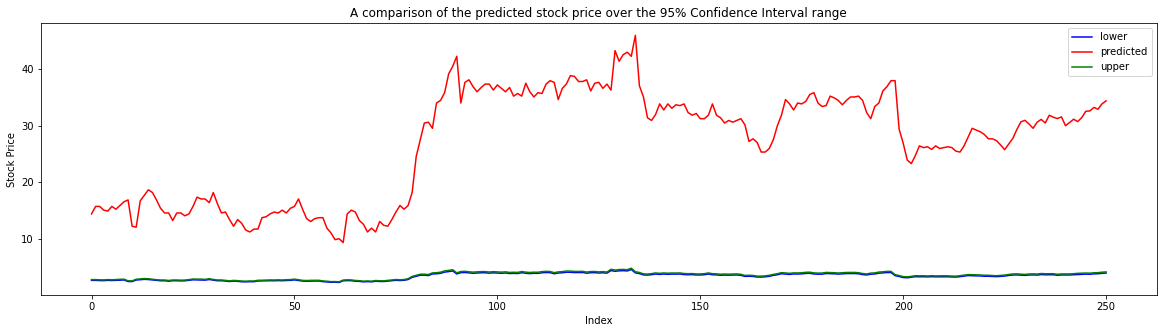

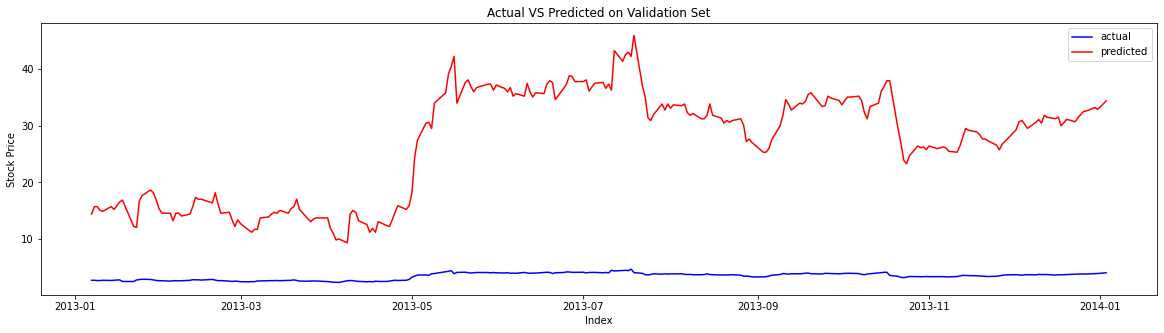

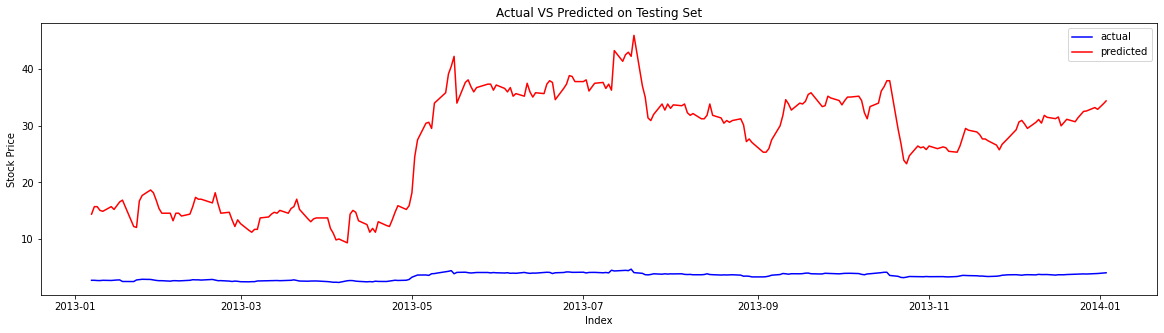

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 30
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa21ee899b0> at a learning rate of 0.1
Dropout? Yes 1 layer
Epochs = 100
Epoch 1/100
31/31 [==============================] - 0s 5ms/step - loss: 0.1465 - mae: 0.2768
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0037 - mae: 0.0608
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0024 - mae: 0.0489
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0435
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0016 - mae: 0.0398
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0013 - mae: 0.0374
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0011 - mae: 0.0351
Epoch 8/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0010 - mae: 0.0334
Epoch 9/100
31/31 [

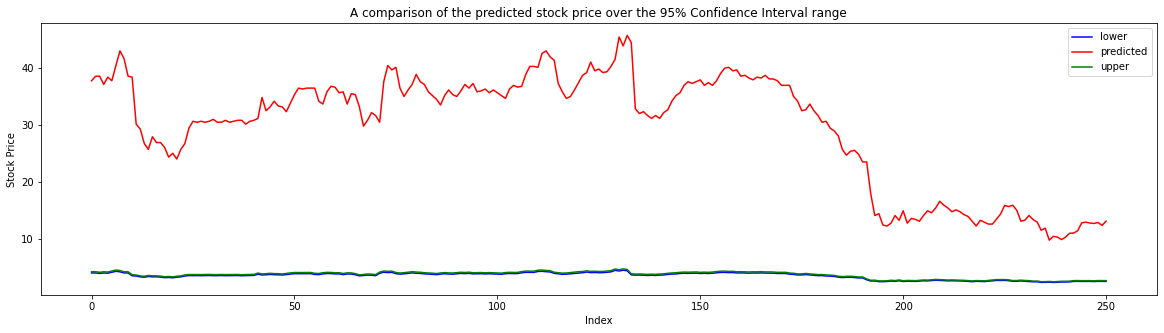

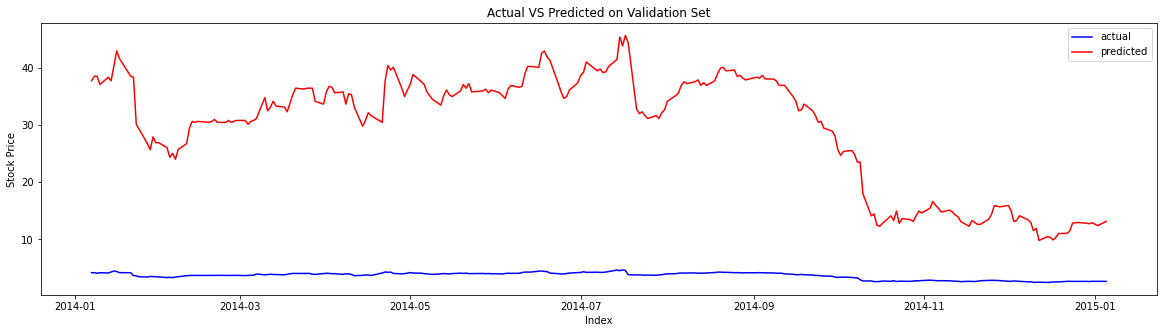

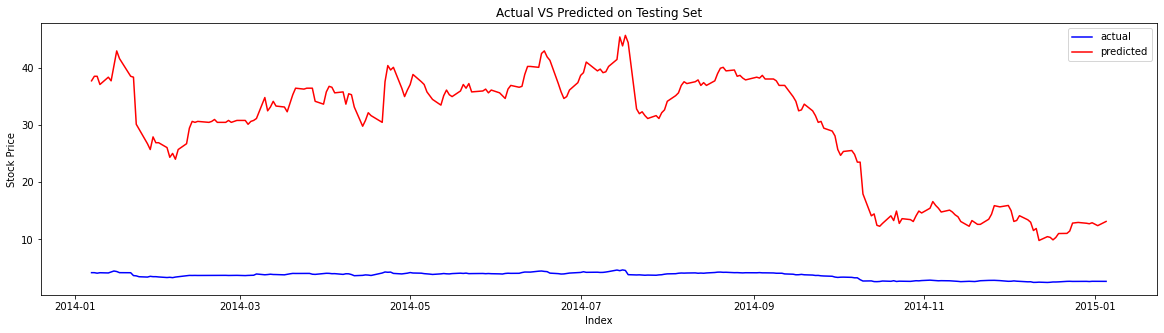

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 30
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa218d2df98> at a learning rate of 0.1
Dropout? Yes 1 layer
Epochs = 100
Epoch 1/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0606 - mae: 0.2091
Epoch 2/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0041 - mae: 0.0662
Epoch 3/100
39/39 [==============================] - 0s 5ms/step - loss: 0.0024 - mae: 0.0497
Epoch 4/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0446
Epoch 5/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0016 - mae: 0.0412
Epoch 6/100
39/39 [==============================] - 0s 5ms/step - loss: 0.0015 - mae: 0.0390
Epoch 7/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0013 - mae: 0.0373
Epoch 8/100
39/39 [==============================] - 0s 5ms/step - loss: 0.0013 - mae: 0.0362
Epoch 9/100
39/39 [

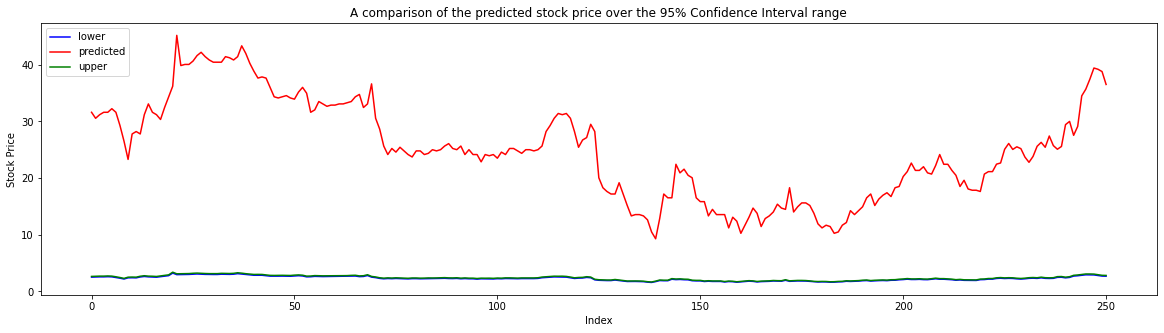

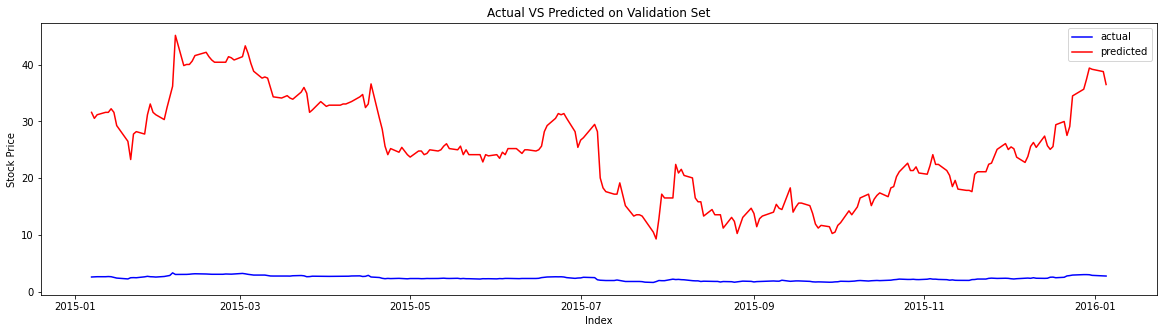

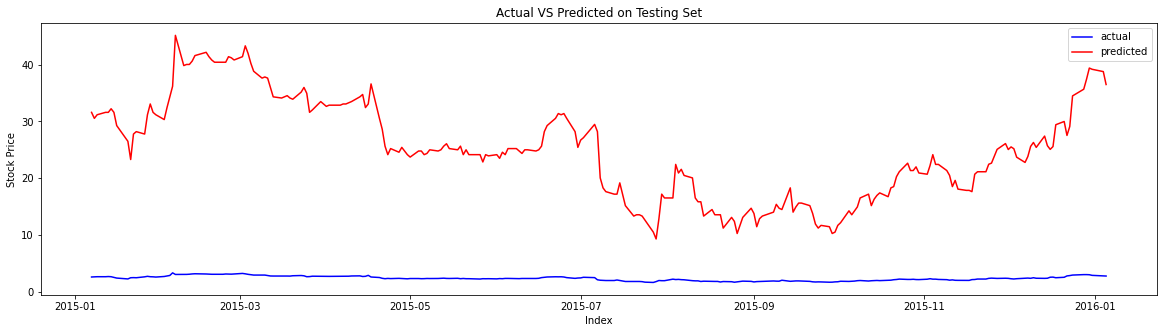

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 30
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa2195d2eb8> at a learning rate of 0.1
Dropout? Yes 1 layer
Epochs = 100
Epoch 1/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0731 - mae: 0.1955
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0025 - mae: 0.0508
Epoch 3/100
47/47 [==============================] - 0s 5ms/step - loss: 0.0018 - mae: 0.0427
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0380
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0012 - mae: 0.0350
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0011 - mae: 0.0334
Epoch 7/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0010 - mae: 0.0319
Epoch 8/100
47/47 [==============================] - 0s 5ms/step - loss: 9.8104e-04 - mae: 0.0316
Epoch 9/100
47/

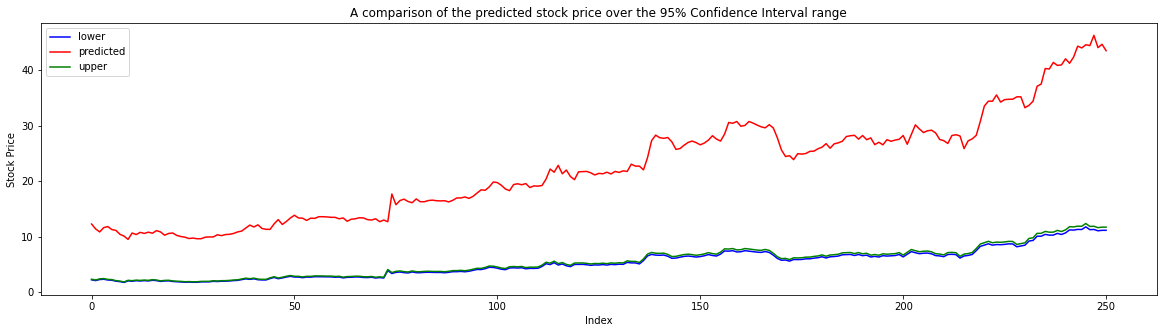

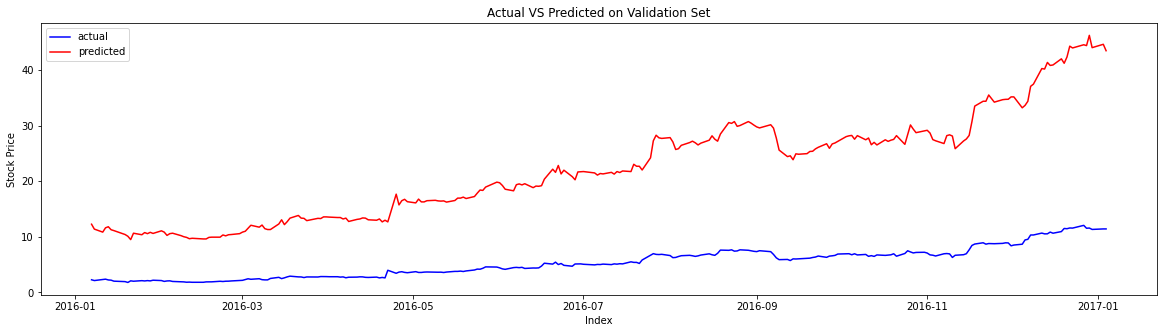

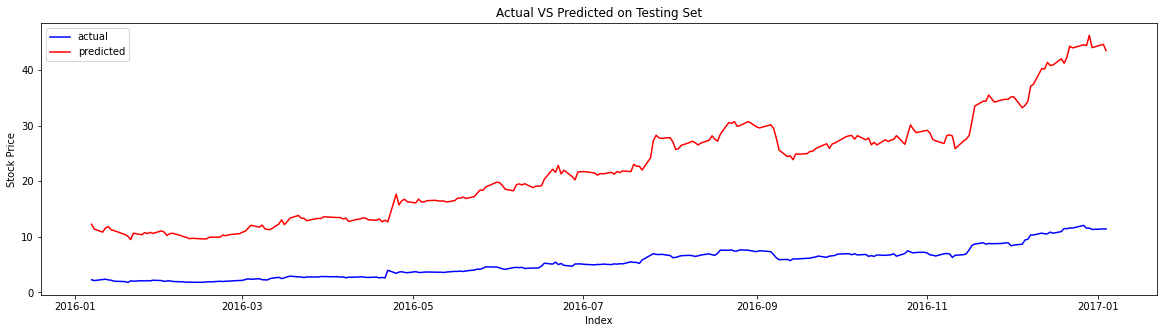

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 30
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa220e299b0> at a learning rate of 0.1
Dropout? Yes 1 layer
Epochs = 100
Epoch 1/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0425 - mae: 0.1633
Epoch 2/100
55/55 [==============================] - 1s 17ms/step - loss: 0.0027 - mae: 0.0515
Epoch 3/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0016 - mae: 0.0396
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0012 - mae: 0.0346
Epoch 5/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0010 - mae: 0.0311
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: 9.2377e-04 - mae: 0.0294
Epoch 7/100
55/55 [==============================] - 0s 4ms/step - loss: 8.6388e-04 - mae: 0.0286
Epoch 8/100
55/55 [==============================] - 0s 4ms/step - loss: 8.1811e-04 - mae: 0.0280
Epoch 

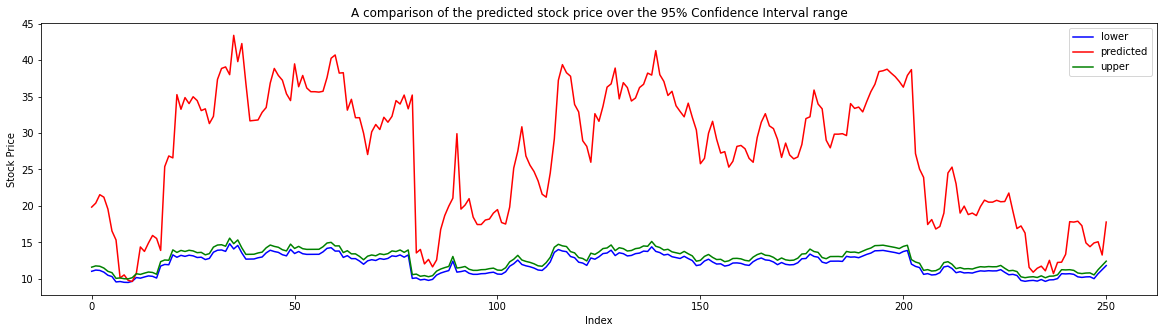

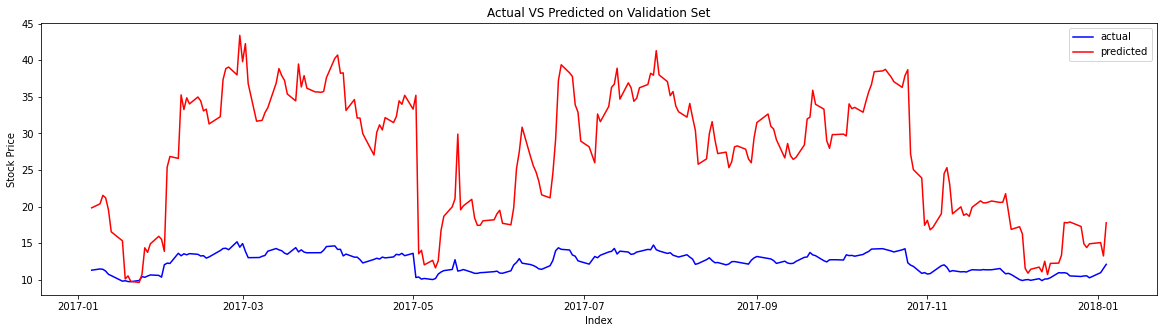

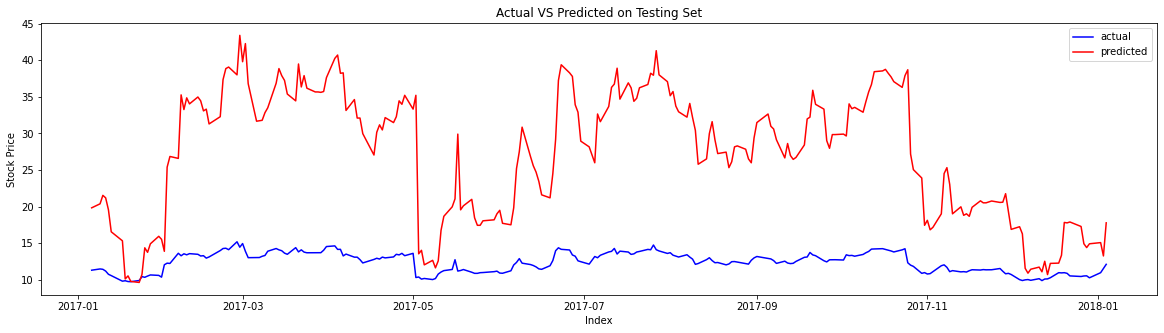

=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 30
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa21d29bd30> at a learning rate of 0.1
Dropout? Yes 1 layer
Epochs = 100
Epoch 1/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0582 - mae: 0.2541
Epoch 2/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0353 - mae: 0.2156
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0164 - mae: 0.1318
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0136 - mae: 0.1176
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0114 - mae: 0.1025
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0092 - mae: 0.1006
Epoch 7/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0103 - mae: 0.1090
Epoch 8/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0112 - mae: 0.1094
Epoch 9/100
63/63 [

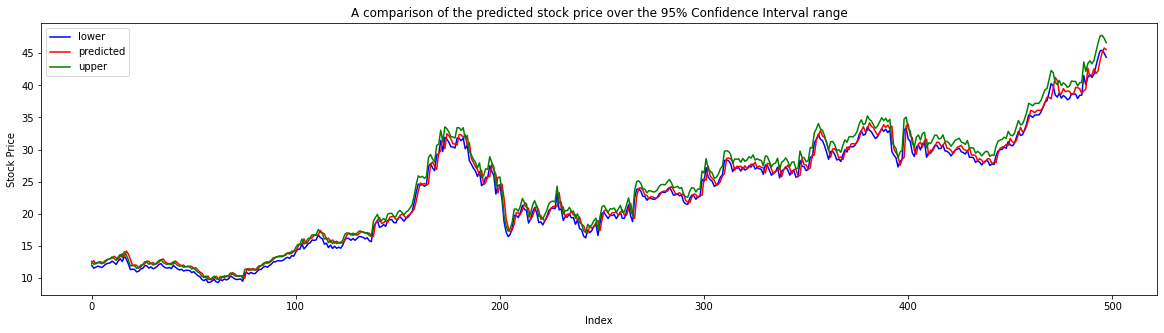

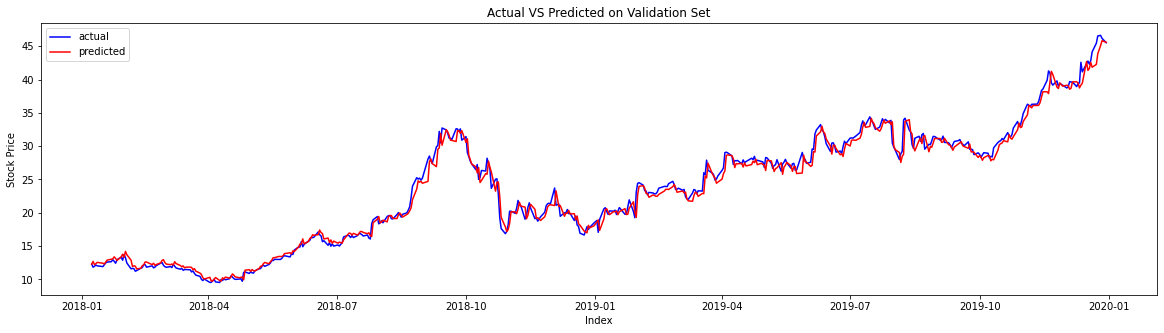

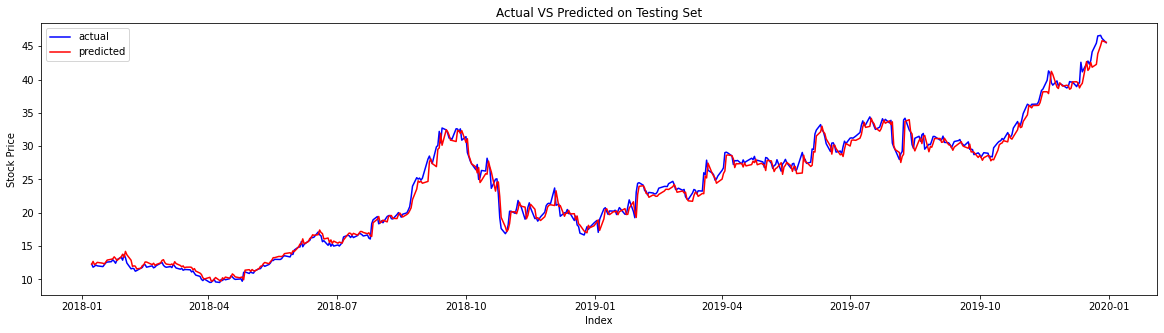

In [ ]:
# To run cross validation

metrics_result = pd.DataFrame(columns = ['MAE','MSE','RMSE','MAPE','R2','CI','Trend'])

fitted_model, train_predict, test_predict, result = build_model(X_train_k1, y_train_k1, X_val_k1, X_val_k1, kk1, kk1_val, kk1_val, 
                                                                hidden_node=30, 
                                                                sliding_window=30, 
                                                                timesteps=1, 
                                                                epochs=100, 
                                                                optimizer='ADAM', # change
                                                                learning_rate=1e-1, 
                                                                dropout=0.2,
                                                                layer1_dropout = '1dp',
                                                                layer2 = 0,
                                                                layer2_dropout = '0', 
                                                                layer3 = 0,
                                                                layer3_dropout = '0')

# NO VAL SPLIT


metrics_result = metrics_result.append(result)


fitted_model, train_predict, test_predict, result = build_model(X_train_k2, y_train_k2, X_val_k2, X_val_k2, kk2, kk2_val, kk2_val, 
                                                                hidden_node=30, 
                                                                sliding_window=30, 
                                                                timesteps=1, 
                                                                epochs=100, 
                                                                optimizer='ADAM', # change
                                                                learning_rate=1e-1, 
                                                                dropout=0.2,
                                                                layer1_dropout = '1dp',
                                                                layer2 = 0,
                                                                layer2_dropout = '0', 
                                                                layer3 = 0,
                                                                layer3_dropout = '0')
metrics_result = metrics_result.append(result)

fitted_model, train_predict, test_predict, result = build_model(X_train_k3, y_train_k3, X_val_k3, X_val_k3, kk3, kk3_val, kk3_val, 
                                                                hidden_node=30, 
                                                                sliding_window=30, 
                                                                timesteps=1, 
                                                                epochs=100, 
                                                                optimizer='ADAM', # change
                                                                learning_rate=1e-1, 
                                                                dropout=0.2,
                                                                layer1_dropout = '1dp',
                                                                layer2 = 0,
                                                                layer2_dropout = '0', 
                                                                layer3 = 0,
                                                                layer3_dropout = '0')
metrics_result = metrics_result.append(result)

fitted_model, train_predict, test_predict, result = build_model(X_train_k4, y_train_k4, X_val_k4, X_val_k4, kk4, kk4_val, kk4_val, 
                                                                hidden_node=30, 
                                                                sliding_window=30, 
                                                                timesteps=1, 
                                                                epochs=100, 
                                                                optimizer='ADAM', # change
                                                                learning_rate=1e-1, 
                                                                dropout=0.2,
                                                                layer1_dropout = '1dp',
                                                                layer2 = 0,
                                                                layer2_dropout = '0', 
                                                                layer3 = 0,
                                                                layer3_dropout = '0')
metrics_result = metrics_result.append(result)

fitted_model, train_predict, test_predict, result = build_model(X_train_k5, y_train_k5, X_val_k5, X_val_k5, kk5, kk5_val, kk5_val, 
                                                                hidden_node=30, 
                                                                sliding_window=30, 
                                                                timesteps=1, 
                                                                epochs=100, 
                                                                optimizer='ADAM', # change
                                                                learning_rate=1e-1, 
                                                                dropout=0.2,
                                                                layer1_dropout = '1dp',
                                                                layer2 = 0,
                                                                layer2_dropout = '0', 
                                                                layer3 = 0,
                                                                layer3_dropout = '0')
metrics_result = metrics_result.append(result)

fitted_model, train_predict, test_predict, result = build_model(X_train_k6, y_train_k6, X_val_k6, X_val_k6, kk6, kk6_val, kk6_val, 
                                                                hidden_node=30, 
                                                                sliding_window=30, 
                                                                timesteps=1, 
                                                                epochs=100, 
                                                                optimizer='ADAM', # change
                                                                learning_rate=1e-1, 
                                                                dropout=0.2,
                                                                layer1_dropout = '1dp',
                                                                layer2 = 0,
                                                                layer2_dropout = '0', 
                                                                layer3 = 0,
                                                                layer3_dropout = '0')
metrics_result = metrics_result.append(result)


fitted_model, train_predict, test_predict, result = build_model(X_train_k7, y_train_k7, X_val_k7, X_val_k7, kk7, kk7_val, kk7_val, 
                                                                hidden_node=30, 
                                                                sliding_window=30, 
                                                                timesteps=1, 
                                                                epochs=100, 
                                                                optimizer='ADAM', # change
                                                                learning_rate=1e-1, 
                                                                dropout=0.2,
                                                                layer1_dropout = '1dp',
                                                                layer2 = 0,
                                                                layer2_dropout = '0', 
                                                                layer3 = 0,
                                                                layer3_dropout = '0')
metrics_result = metrics_result.append(result)

fitted_model, train_predict, test_predict, result = build_model(X_train_k8, y_train_k8, X_val_k8, X_val_k8, kk8, kk8_val, kk8_val, 
                                                                hidden_node=30, 
                                                                sliding_window=30, 
                                                                timesteps=1, 
                                                                epochs=100, 
                                                                optimizer='ADAM', # change
                                                                learning_rate=1e-1, 
                                                                dropout=0.2,
                                                                layer1_dropout = '1dp',
                                                                layer2 = 0,
                                                                layer2_dropout = '0', 
                                                                layer3 = 0,
                                                                layer3_dropout = '0')
metrics_result = metrics_result.append(result)

In [ ]:
print(metrics_result)
metrics_result.to_csv(r'../content/drive/My Drive/Dataset/2-AMD-CV.csv', index = True)

     MAE     MSE   RMSE    MAPE        R2     CI  Trend
0  21.81   521.9  22.85  298.27   -266.89   0.00  53.60
0  22.74  596.34  24.42  451.74   -141.32   0.00  48.00
0  23.53  632.03  25.14  666.85  -1761.56   0.00  49.20
0  26.12  769.97  27.75  689.18  -2167.69   0.00  48.00
0  22.68  582.98  24.14  941.38  -3533.96   0.00  53.60
0  16.88  328.29  18.12   336.4    -47.19   0.00  47.60
0  14.92  278.63  16.69  115.34   -151.23   0.40  49.60
0   0.69    0.95   0.98    3.03      0.99  53.82  48.49


=== ABOUT THE FOLLOWING MODEL ===
Number of layers = 1
Number of hidden nodes = 30
Optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fe31a0695f8> at a learning rate of 0.1
Dropout? Yes 1 layer
Epochs = 100
Epoch 1/100
78/78 [==============================] - 1s 8ms/step - loss: 0.0392 - mae: 0.1133
Epoch 2/100
78/78 [==============================] - 1s 8ms/step - loss: 0.0011 - mae: 0.0305
Epoch 3/100
78/78 [==============================] - 1s 8ms/step - loss: 6.2640e-04 - mae: 0.0228
Epoch 4/100
78/78 [==============================] - 1s 8ms/step - loss: 4.6374e-04 - mae: 0.0190
Epoch 5/100
78/78 [==============================] - 1s 8ms/step - loss: 3.8394e-04 - mae: 0.0168
Epoch 6/100
78/78 [==============================] - 1s 8ms/step - loss: 3.4983e-04 - mae: 0.0160
Epoch 7/100
78/78 [==============================] - 1s 8ms/step - loss: 3.2202e-04 - mae: 0.0154
Epoch 8/100
78/78 [==============================] - 1s 8ms/step - loss: 3.1523e-04 - mae: 0.

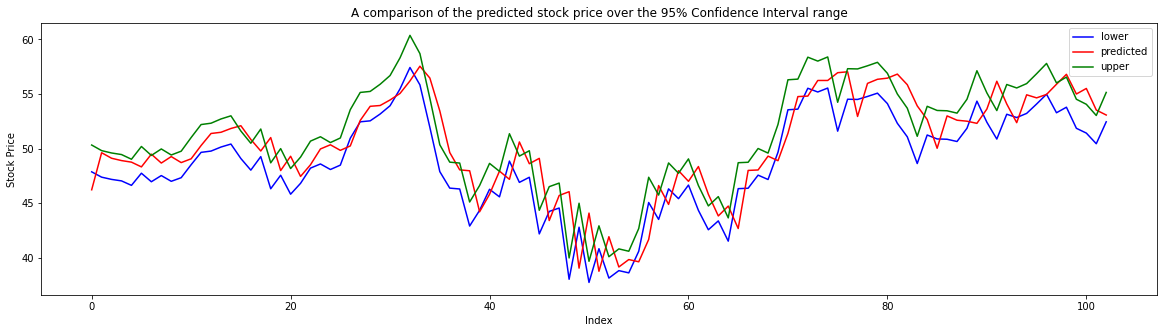

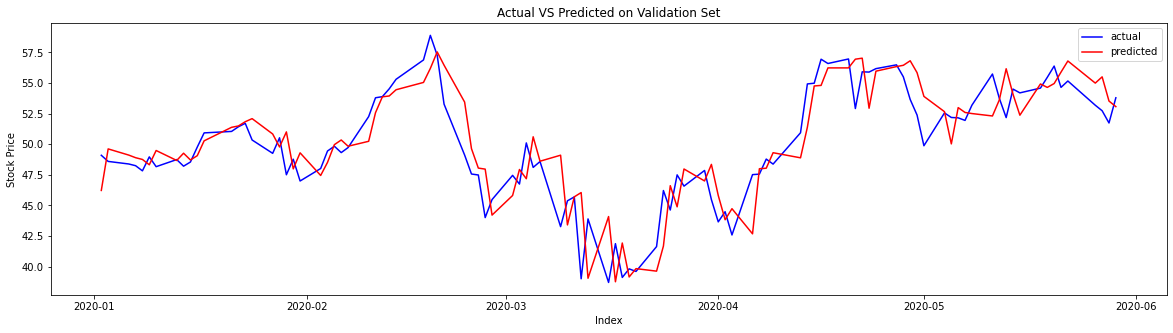

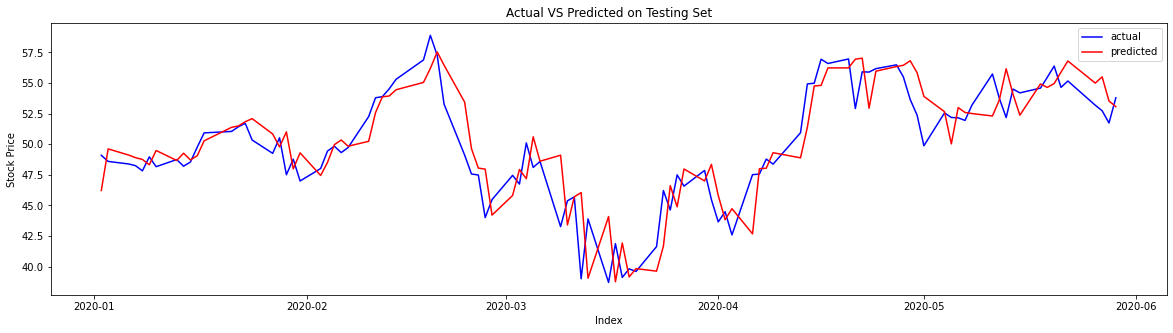

In [25]:
# To run the tests (normal test, 60 days, 103 days, and COVID-19)

metrics_result = pd.DataFrame(columns = ['MAE','MSE','RMSE','MAPE','R2','CI','Trend'])

fitted_model, train_predict, test_predict, result = build_model(X_train_validation_30, y_train_validation_30, X_test_30, X_test_30, train_validation, test, test, 
                                                                hidden_node=30, 
                                                                sliding_window=30, 
                                                                timesteps=1, 
                                                                epochs=100, 
                                                                optimizer='ADAM', # change
                                                                learning_rate=1e-1, 
                                                                dropout=0.2,
                                                                layer1_dropout = '1dp',
                                                                layer2 = 0,
                                                                layer2_dropout = '0', 
                                                                layer3 = 0,
                                                                layer3_dropout = '0')

# NO VAL SPLIT

metrics_result = metrics_result.append(result)

In [27]:
print(metrics_result)
metrics_result.to_csv(r'../content/drive/My Drive/Dataset/2-AMD-test-set.csv', index = True)

    MAE  MSE  RMSE MAPE    R2     CI  Trend
0  1.69  5.0  2.24  3.5  0.76  50.49  46.08
